# Communicate Data Findings Project: Ford GoBike System Data
## by Soyoung Cho

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Gathering Data</a></li>
        <li><a href="#wrangling">Assessing Data</a></li>
        <li><a href="#wrangling">Cleaning Data</a></li>   
<li><a href="#eda">Univariate Exploration</a></li>
        <li><a href="#wrangling">Bivariate Exploration</a></li>
    <li><a href="#wrangling">Multivariate Exploration</a></li>
    <li><a href="#wrangling">Conclusion</a></li>
</ul>

## Introduction

 The bike industry in United States has developed since 1880s. The bike was originally delveloped from Britain but brought to United States and have devleoped into various models. Since 1990s, the demand of bike has incrementally increased. And there is another popular phenomenon related to this topic; 'sharing'. These days, due to development of technologies, sharing or renting products has became convienent which lead the sharing/ renting industry grow in fast pace. 
 
 The purpose of this project is to explore and communicate the data findings using the data of 'Ford GoBike System Data'. 'Ford GoBike System' are bike rental company in San Fransico, United States. I am going to gather, assess and cleand data to pull out some insights. 
 

## Preliminary Wrangling

I am going to use the dataset in the page "https://www.fordgobike.com/system-data" from 2017 to April 2019. This data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob
import os
import sys
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import missingno as ms
import zipfile
import requests
from pathlib import Path

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Gathering Data

Calling the path of the folder where all the related datas are stored

In [2]:
path =r'C:\trip'

In [3]:
trip_datas = glob.glob(os.path.join(path, "*.csv"))

Merging all the datas into one file

In [4]:
df = pd.concat((pd.read_csv(f) for f in trip_datas), ignore_index = True)

Saving the file with new name and loading the new file

In [5]:
df.to_csv('merge_file.csv', index=False)

In [6]:
df = pd.read_csv('merge_file.csv')

### Assessing Data

In [7]:
len(df)

3254325

In [8]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(3254325, 16)
bike_id                      int64
bike_share_for_all_trip     object
duration_sec                 int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
member_birth_year          float64
member_gender               object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object
   bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0       96                     NaN         80110            43.0   
1       88                     NaN         78800            96.0   
2     1094                     NaN         45768           245.0   
3     2831                     NaN         62172             5.0   
4     3167                     NaN         43603           247.0   
5   

In [9]:
df.sample(50)

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
1882484     2999                      No           397            49.0   
2390026     5572                      No           201           321.0   
509115       337                     NaN           929            30.0   
448618      1598                     NaN           488            90.0   
2261585      674                      No           425           114.0   
1451355     4029                      No           479            98.0   
2695654      535                      No          1095           106.0   
856230       661                      No           446           284.0   
2758523     5468                      No           179            67.0   
1190079     4060                      No          1556            88.0   
2047031     1677                      No           549            66.0   
1346122     4269                      No           393             NaN   
2607818     5894                      No           249           315.0   
2643279     3429                      No           788           104.0   
1823102     3398                     Yes           390             3.0   
2105829     2731                      No           305            27.0   
238616      2136                     NaN          1962            21.0   
398969      2808                     NaN           997            58.0   
845711       613                      No          1805           197.0   
2729759     4797                      No           774            66.0   
946712      3288                      No           116            22.0   
1867150     1020                      No           688           178.0   
1377459     2375                      No           984            15.0   
2032380     2197                      No           321            58.0   
342247      2745                     NaN           850            77.0   
1737923     2420                      No           201           245.0   
822498      3126                      No           390           176.0   
10520       1865                     NaN           278           305.0   
2785327     5281                      No           484            30.0   
3098642     3516                      No           796            42.0   
3055402     1595                      No           741            34.0   
1710946      546                      No           983            97.0   
1162088     2938                      No          1099             9.0   
756290       210                      No           177             3.0   
1852386     3328                      No           564           363.0   
675318      3375                      No          9535            15.0   
2030827     4412                      No          2029           147.0   
2789956     6718                      No           552            81.0   
1426728     1621                      No           524            24.0   
457565      1033                     NaN           273            22.0   
1098287     4036                      No           310            31.0   
3021178     2013                      No           215           309.0   
220658      2852                     NaN          1201            15.0   
1519255     1589                      No          1428           230.0   
3078498     1360                      No          1361            54.0   
1811142     1533                     Yes           266           242.0   
633340       848                      No          1037            22.0   
577860      1578                      No          1158           133.0   
3161341     4810                      No          1567            63.0   
868854      3626                      No           260           245.0   

         end_station_latitude  end_station_longitude  \
1882484             37.780760            -122.394989   
2390026             37.780146            -122.403071   
509115              37.776598            -122.395282   
448618    

In [10]:
df.head()

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0       96                     NaN         80110            43.0   
1       88                     NaN         78800            96.0   
2     1094                     NaN         45768           245.0   
3     2831                     NaN         62172             5.0   
4     3167                     NaN         43603           247.0   

   end_station_latitude  end_station_longitude  \
0             37.778768            -122.415929   
1             37.766210            -122.426614   
2             37.870348            -122.267764   
3             37.783899            -122.408445   
4             37.867789            -122.265896   

                                    end_station_name  \
0  San Francisco Public Library (Grove St at Hyde...   
1                              Dolores St at 15th St   
2                             Downtown Berkeley BART   
3       Powell St BART Station (Market St at 5th St)   
4                          Fulton St at Bancroft Way   

                   end_time  member_birth_year member_gender  \
0  2018-01-01 15:12:50.2450             1987.0          Male   
1  2018-01-01 13:49:55.6170             1965.0        Female   
2  2018-01-01 11:28:36.8830                NaN           NaN   
3  2018-01-01 10:47:23.5310                NaN           NaN   
4  2018-01-01 02:29:57.5710             1997.0        Female   

   start_station_id  start_station_latitude  start_station_longitude  \
0              74.0               37.776435              -122.426244   
1             284.0               37.784872              -122.400876   
2             245.0               37.870348              -122.267764   
3              60.0               37.774520              -122.409449   
4             239.0               37.868813              -122.258764   

                                  start_station_name  \
0                              Laguna St at Hayes St   
1  Yerba Buena Center for the Arts (Howard St at ...   
2                             Downtown Berkeley BART   
3                               8th St at Ringold St   
4                      Bancroft Way at Telegraph Ave   

                 start_time   user_type  
0  2017-12-31 16:57:39.6540    Customer  
1  2017-12-31 15:56:34.8420    Customer  
2  2017-12-31 22:45:48.4110    Customer  
3  2017-12-31 17:31:10.6360    Customer  
4  2017-12-31 14:23:14.0010  Subscriber

In [11]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
bike_id                    3254325 non-null int64
bike_share_for_all_trip    2734625 non-null object
duration_sec               3254325 non-null int64
end_station_id             3241824 non-null float64
end_station_latitude       3254325 non-null float64
end_station_longitude      3254325 non-null float64
end_station_name           3241824 non-null object
end_time                   3254325 non-null object
member_birth_year          3036159 non-null float64
member_gender              3036592 non-null object
start_station_id           3241824 non-null float64
start_station_latitude     3254325 non-null float64
start_station_longitude    3254325 non-null float64
start_station_name         3241824 non-null object
start_time                 3254325 non-null object
user_type                  3254325 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 397.3+ MB


Missing datas in bike_share_for_all_trip, station_id, station_name_ member_birth_year, member_gender, end_station_id, end_station_name, start_station_id,start_station_name.

In [12]:
print(df.describe())

            bike_id  duration_sec  end_station_id  end_station_latitude  \
count  3.254325e+06  3.254325e+06    3.241824e+06          3.254325e+06   
mean   2.729018e+03  8.743223e+02    1.191966e+02          3.776874e+01   
std    1.724443e+03  2.468547e+03    1.029334e+02          1.342571e-01   
min    1.000000e+01  6.100000e+01    3.000000e+00          0.000000e+00   
25%    1.336000e+03  3.510000e+02    3.000000e+01          3.777143e+01   
50%    2.579000e+03  5.570000e+02    8.700000e+01          3.778127e+01   
75%    3.821000e+03  8.730000e+02    1.860000e+02          3.779625e+01   
max    7.108000e+03  8.636900e+04    4.200000e+02          4.551000e+01   

       end_station_longitude  member_birth_year  start_station_id  \
count           3.254325e+06       3.036159e+06      3.241824e+06   
mean           -1.223519e+02       1.983137e+03      1.209191e+02   
std             3.220803e-01       1.043760e+01      1.030184e+02   
min            -1.224737e+02       1.878000e+03 

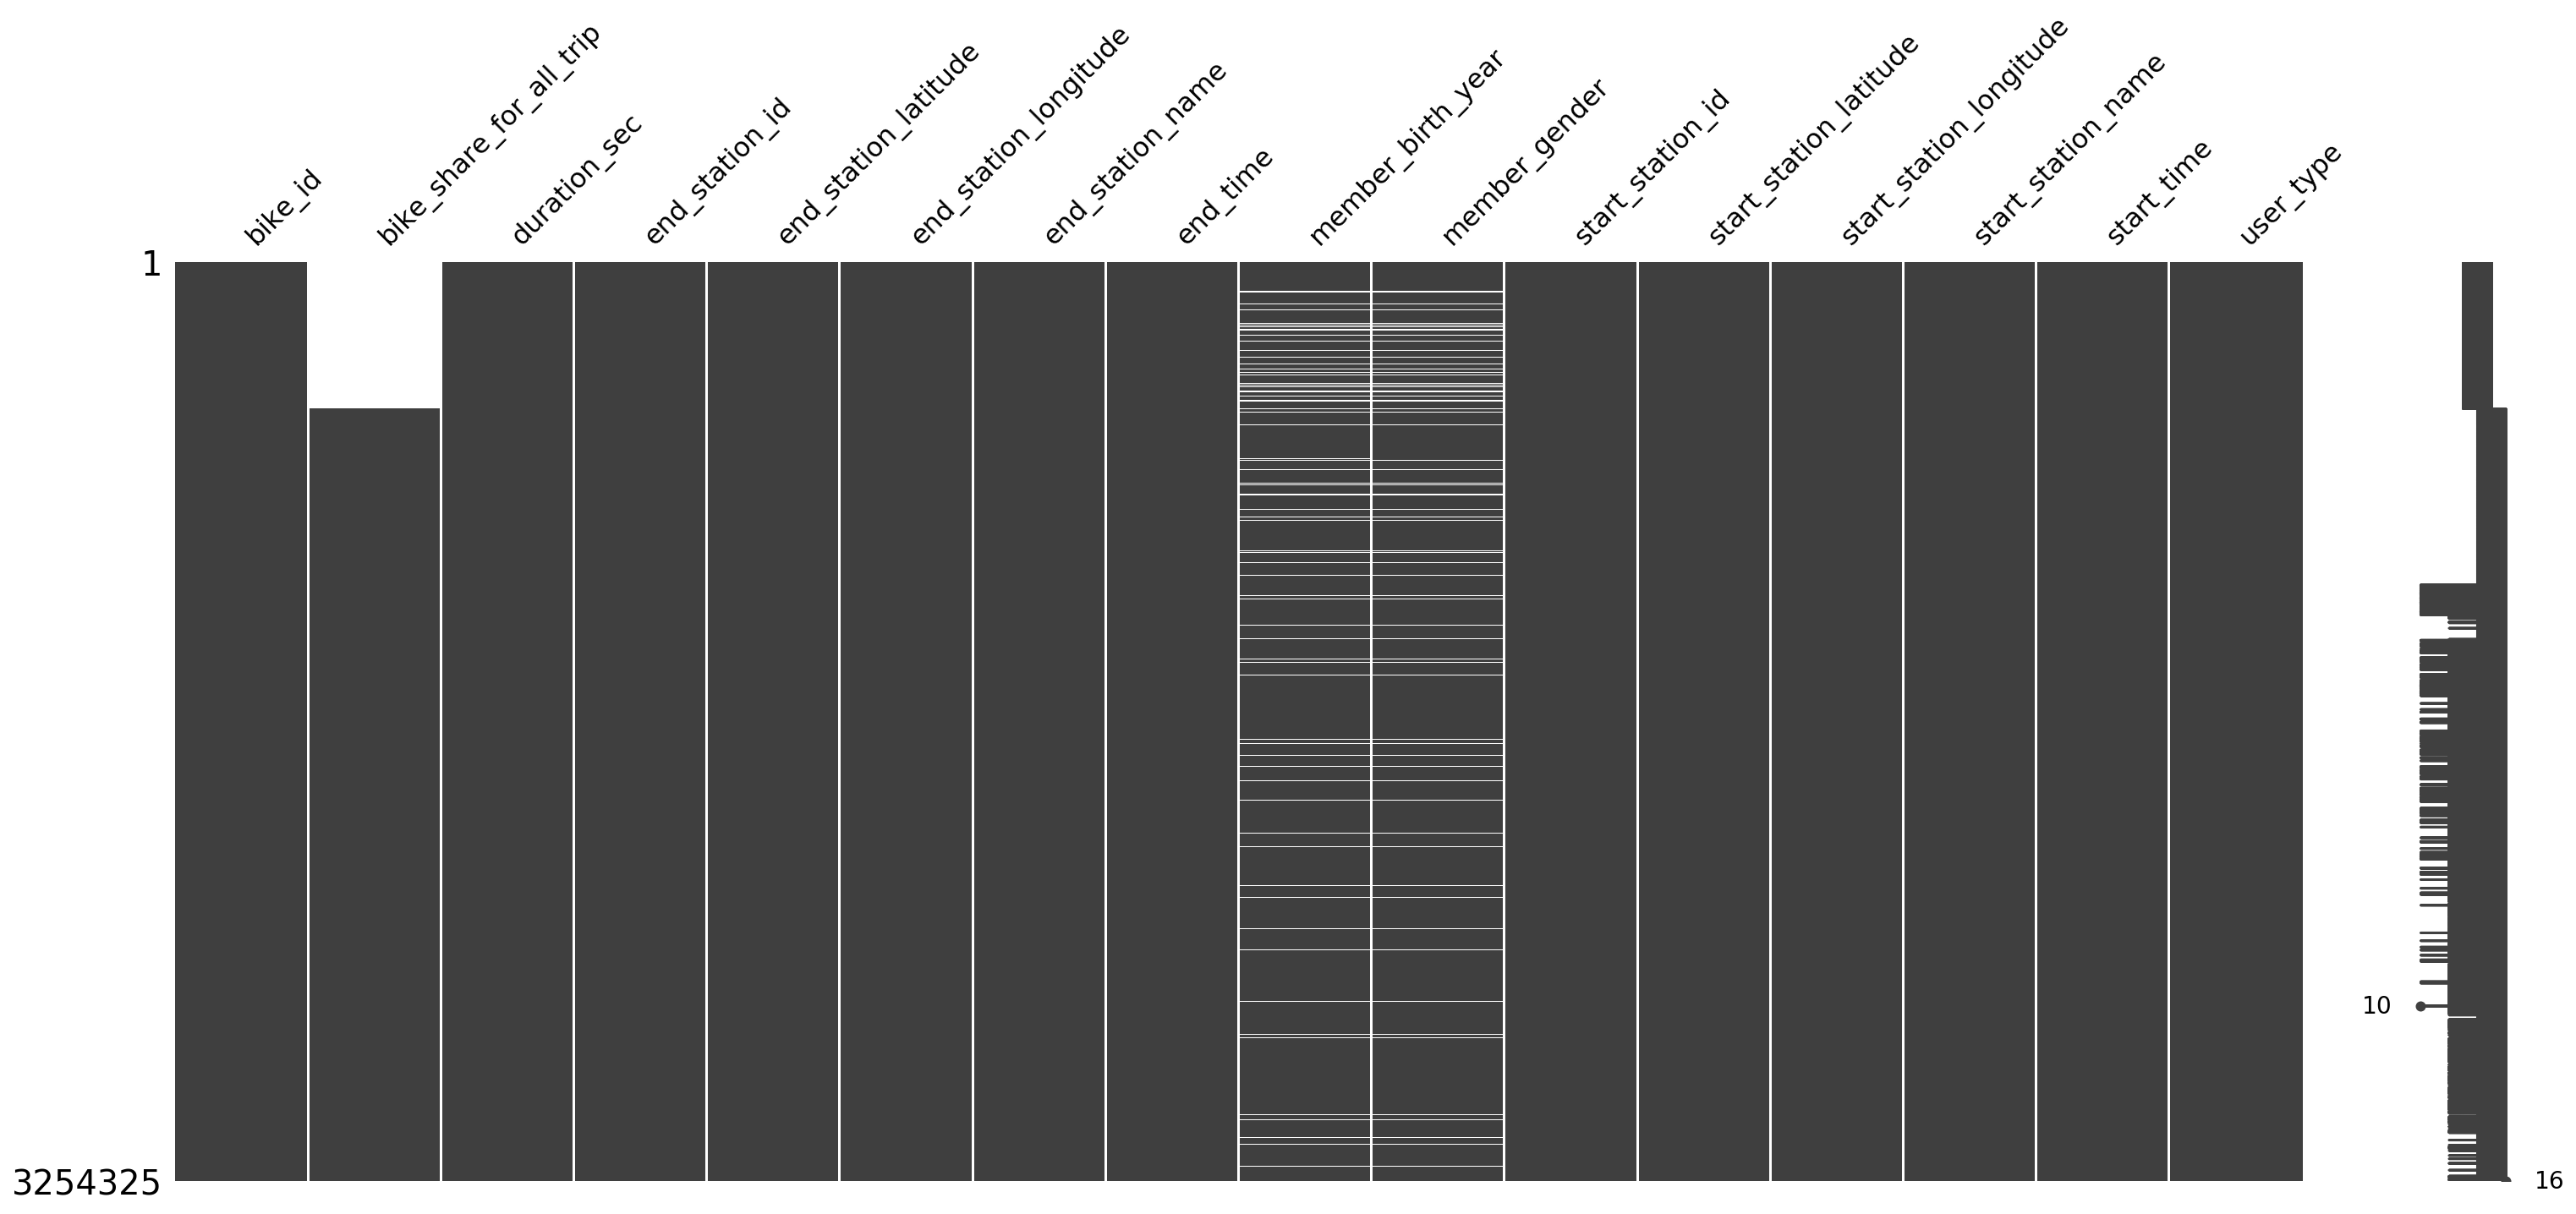

In [13]:
ms.matrix(df)

There seems to have some missing datas; especially in member birth year and member gender.

### Cleaning Data

In [14]:
df_clean = df.copy()

### Quality and Tidiness Issues regarding the Data


> Missing data>
- missing datas in bike_share_for_all_trip, station_id, station_name_ member_birth_year, member_gender, end_station_id, end_station_name, start_station_id,start_station_name

> Data types needs some modification>
- user_type, gender, bike_share_for_all_trip change into 'category data type'
- bike_id, start_station_id, end_station_id change into 'object data type'
- start_time, end_time change into 'datetime data type'

> New columns can be made for easier interpretation>
- calculation of 'age' with member_birth_year
- new columns for months and weekday for start_time and end_time


### Issue 1: Missing data

#### Define the Issue 

> missing datas in bike_share_for_all_trip, station_id, station_name_ member_birth_year, member_gender, end_station_id, end_station_name, start_station_id,start_station_name

#### Coding

end_station_id, end_station_name, start_station_id,start_station_name have the same amount of missing information therfore I am going to drop the row without any information.

In [15]:
df_clean.dropna(subset = ["end_station_id"], inplace = True)

Next, I am going to replace the missing values with signs which are easier to interpret.

In [16]:
#df_clean.member_birth_year.fillna("0", inplace = True)
df_clean.member_gender.fillna("unknown", inplace = True)

#### Test

In [17]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241824 entries, 0 to 3254324
Data columns (total 16 columns):
bike_id                    3241824 non-null int64
bike_share_for_all_trip    2722124 non-null object
duration_sec               3241824 non-null int64
end_station_id             3241824 non-null float64
end_station_latitude       3241824 non-null float64
end_station_longitude      3241824 non-null float64
end_station_name           3241824 non-null object
end_time                   3241824 non-null object
member_birth_year          3023992 non-null float64
member_gender              3241824 non-null object
start_station_id           3241824 non-null float64
start_station_latitude     3241824 non-null float64
start_station_longitude    3241824 non-null float64
start_station_name         3241824 non-null object
start_time                 3241824 non-null object
user_type                  3241824 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 420.5+ MB


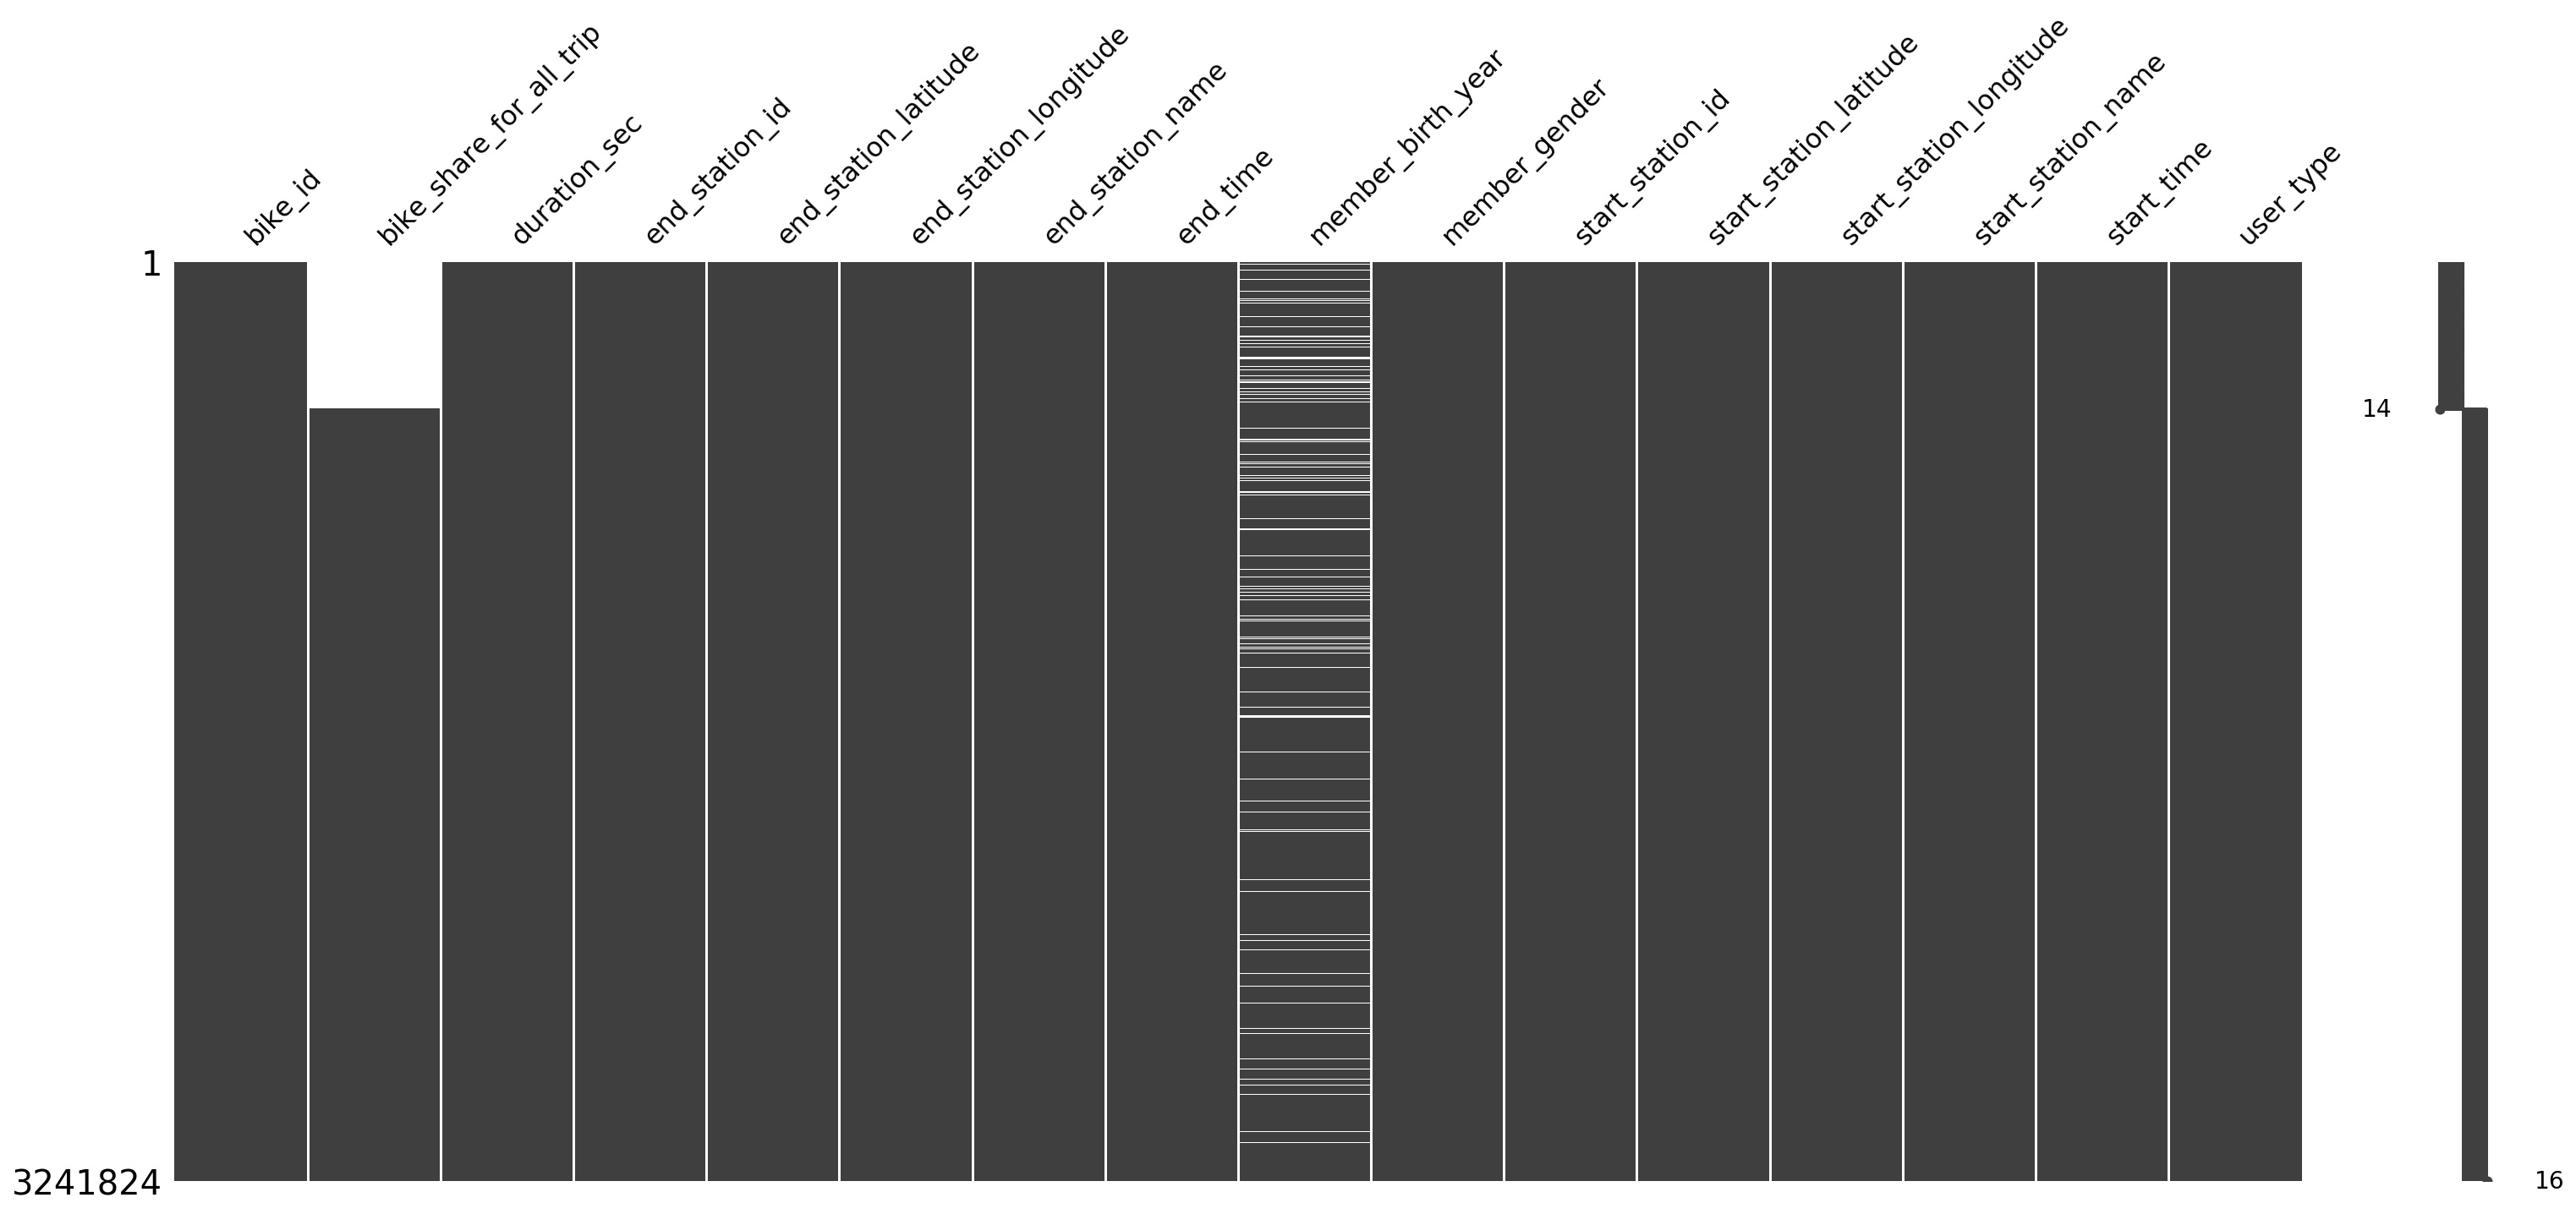

In [18]:
ms.matrix(df_clean);

### Issue 2: Data types Modification

#### Define Issue:
> 1. user_type, gender, bike_share_for_all_trip change into 'category data type'
2.bike_id, start_station_id, end_station_id change into 'object data type'
3.start_time, end_time change into 'datetime data type'

#### Coding

In [19]:
# bike_share_for_all_trip, user_type, gender change into 'category data type' 

df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')

In [20]:
# bike_id, start_station_id, end_station_id change into 'object data type' 

df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

In [21]:
# start_time, end_time change into 'datetime data type'

df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

### Test

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3241824 entries, 0 to 3254324
Data columns (total 16 columns):
bike_id                    object
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 355.5+ MB


### Issue 3: New column

#### Define Issue:
calculation of 'age' with member_birth_year & remove age outliers

#### Coding

In [23]:
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

#### Test

In [24]:
df_clean.head()

bike_id bike_share_for_all_trip  duration_sec end_station_id  \
0      96                     NaN         80110             96   
1      88                     NaN         78800             88   
2    1094                     NaN         45768           1094   
3    2831                     NaN         62172           2831   
4    3167                     NaN         43603           3167   

   end_station_latitude  end_station_longitude  \
0             37.778768            -122.415929   
1             37.766210            -122.426614   
2             37.870348            -122.267764   
3             37.783899            -122.408445   
4             37.867789            -122.265896   

                                    end_station_name                end_time  \
0  San Francisco Public Library (Grove St at Hyde... 2018-01-01 15:12:50.245   
1                              Dolores St at 15th St 2018-01-01 13:49:55.617   
2                             Downtown Berkeley BART 2018-01-01 11:28:36.883   
3       Powell St BART Station (Market St at 5th St) 2018-01-01 10:47:23.531   
4                          Fulton St at Bancroft Way 2018-01-01 02:29:57.571   

   member_birth_year member_gender start_station_id  start_station_latitude  \
0             1987.0          Male               96               37.776435   
1             1965.0        Female               88               37.784872   
2                NaN       unknown             1094               37.870348   
3                NaN       unknown             2831               37.774520   
4             1997.0        Female             3167               37.868813   

   start_station_longitude                                 start_station_name  \
0              -122.426244                              Laguna St at Hayes St   
1              -122.400876  Yerba Buena Center for the Arts (Howard St at ...   
2              -122.267764                             Downtown Berkeley BART   
3              -122.409449                               8th St at Ringold St   
4              -122.258764                      Bancroft Way at Telegraph Ave   

               start_time   user_type  member_age  
0 2017-12-31 16:57:39.654    Customer        32.0  
1 2017-12-31 15:56:34.842    Customer        54.0  
2 2017-12-31 22:45:48.411    Customer         NaN  
3 2017-12-31 17:31:10.636    Customer         NaN  
4 2017-12-31 14:23:14.001  Subscriber        22.0

There seems to have some outliers for age. Some of the age are too high (impossible; such as 2020). I need to get rid of some of the age outliers.

In [25]:
df_clean.member_age.mean()

35.8797695231998

This high mean is due to users' age with "0". According to the Wikipedia ("https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy"), the World life expectancy is 71.5 years old. Therefore, I will cut the age from 72 and this will automatically delete the null and "0" age issue.

In [26]:
df_clean = df_clean.query('member_age <=72')

In [27]:
df_clean.member_age.mean()

35.72872484735116

In [28]:
df_clean.head()

bike_id bike_share_for_all_trip  duration_sec end_station_id  \
0       96                     NaN         80110             96   
1       88                     NaN         78800             88   
4     3167                     NaN         43603           3167   
6     3539                     NaN          4507           3539   
12    2311                     NaN          2183           2311   

    end_station_latitude  end_station_longitude  \
0              37.778768            -122.415929   
1              37.766210            -122.426614   
4              37.867789            -122.265896   
6              37.866249            -122.299371   
12             37.789677            -122.390428   

                                     end_station_name                end_time  \
0   San Francisco Public Library (Grove St at Hyde... 2018-01-01 15:12:50.245   
1                               Dolores St at 15th St 2018-01-01 13:49:55.617   
4                           Fulton St at Bancroft Way 2018-01-01 02:29:57.571   
6                             Addison St at Fourth St 2018-01-01 01:04:35.619   
12                              Spear St at Folsom St 2018-01-01 00:29:18.743   

    member_birth_year member_gender start_station_id  start_station_latitude  \
0              1987.0          Male               96               37.776435   
1              1965.0        Female               88               37.784872   
4              1997.0        Female             3167               37.868813   
6              1991.0        Female             3539               37.866249   
12             1990.0          Male             2311               37.776639   

    start_station_longitude  \
0               -122.426244   
1               -122.400876   
4               -122.258764   
6               -122.299371   
12              -122.395526   

                                   start_station_name              start_time  \
0                               Laguna St at Hayes St 2017-12-31 16:57:39.654   
1   Yerba Buena Center for the Arts (Howard St at ... 2017-12-31 15:56:34.842   
4                       Bancroft Way at Telegraph Ave 2017-12-31 14:23:14.001   
6                             Addison St at Fourth St 2017-12-31 23:49:28.422   
12  San Francisco Caltrain Station 2  (Townsend St... 2017-12-31 23:52:55.581   

     user_type  member_age  
0     Customer        32.0  
1     Customer        54.0  
4   Subscriber        22.0  
6     Customer        28.0  
12  Subscriber        29.0

### Issue 4: New column

#### Define Issue:
new columns for months and weekday for start_time and end_time

#### Coding

In [29]:
df_clean['start_time_month']=df_clean['start_time'].dt.strftime('%B')

In [30]:
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [31]:
df_clean['end_time_month']=df_clean['end_time'].dt.strftime('%B')

In [32]:
df_clean['end_time_weekday']=df_clean['end_time'].dt.strftime('%a')

#### Test

In [33]:
df_clean.head()

bike_id bike_share_for_all_trip  duration_sec end_station_id  \
0       96                     NaN         80110             96   
1       88                     NaN         78800             88   
4     3167                     NaN         43603           3167   
6     3539                     NaN          4507           3539   
12    2311                     NaN          2183           2311   

    end_station_latitude  end_station_longitude  \
0              37.778768            -122.415929   
1              37.766210            -122.426614   
4              37.867789            -122.265896   
6              37.866249            -122.299371   
12             37.789677            -122.390428   

                                     end_station_name                end_time  \
0   San Francisco Public Library (Grove St at Hyde... 2018-01-01 15:12:50.245   
1                               Dolores St at 15th St 2018-01-01 13:49:55.617   
4                           Fulton St at Bancroft Way 2018-01-01 02:29:57.571   
6                             Addison St at Fourth St 2018-01-01 01:04:35.619   
12                              Spear St at Folsom St 2018-01-01 00:29:18.743   

    member_birth_year member_gender  ... start_station_latitude  \
0              1987.0          Male  ...              37.776435   
1              1965.0        Female  ...              37.784872   
4              1997.0        Female  ...              37.868813   
6              1991.0        Female  ...              37.866249   
12             1990.0          Male  ...              37.776639   

    start_station_longitude  \
0               -122.426244   
1               -122.400876   
4               -122.258764   
6               -122.299371   
12              -122.395526   

                                   start_station_name              start_time  \
0                               Laguna St at Hayes St 2017-12-31 16:57:39.654   
1   Yerba Buena Center for the Arts (Howard St at ... 2017-12-31 15:56:34.842   
4                       Bancroft Way at Telegraph Ave 2017-12-31 14:23:14.001   
6                             Addison St at Fourth St 2017-12-31 23:49:28.422   
12  San Francisco Caltrain Station 2  (Townsend St... 2017-12-31 23:52:55.581   

     user_type member_age  start_time_month start_time_weekday end_time_month  \
0     Customer       32.0          December                Sun        January   
1     Customer       54.0          December                Sun        January   
4   Subscriber       22.0          December                Sun        January   
6     Customer       28.0          December                Sun        January   
12  Subscriber       29.0          December                Sun        January   

   end_time_weekday  
0               Mon  
1               Mon  
4               Mon  
6               Mon  
12              Mon  

[5 rows x 21 columns]

In [34]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3015090 entries, 0 to 3254324
Data columns (total 21 columns):
bike_id                    3015090 non-null object
bike_share_for_all_trip    2563618 non-null category
duration_sec               3015090 non-null int64
end_station_id             3015090 non-null object
end_station_latitude       3015090 non-null float64
end_station_longitude      3015090 non-null float64
end_station_name           3015090 non-null object
end_time                   3015090 non-null datetime64[ns]
member_birth_year          3015090 non-null float64
member_gender              3015090 non-null category
start_station_id           3015090 non-null object
start_station_latitude     3015090 non-null float64
start_station_longitude    3015090 non-null float64
start_station_name         3015090 non-null object
start_time                 3015090 non-null datetime64[ns]
user_type                  3015090 non-null category
member_age                 3015090 non-null f

Data cleaning is now finished.

### What is the structure of your dataset?

> The dataset is consisted of 3012662 number of usages of individuals with 21 columns which contains various information of users such as birth year, gender, bike id, duration time and so on. I have added some new columns such as age, start month/ weekday, end month/ weekday for easier and effective interpretation.

### What is/are the main feature(s) of interest in your dataset?

> I am intrested in the age range and gender which leads to different demand pattern. And when they are using the service the most such as which month of the year or which day suring the weekday.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 
> Every information in this dataset will be very useful for exploring my interest of research. Among those information, the gender, age, start/ end time will be very helpful to support my investigation into my features of interest.

## Univariate Exploration

In [35]:
df_ana = df_clean.copy()

In [36]:
df_ana.head()

bike_id bike_share_for_all_trip  duration_sec end_station_id  \
0       96                     NaN         80110             96   
1       88                     NaN         78800             88   
4     3167                     NaN         43603           3167   
6     3539                     NaN          4507           3539   
12    2311                     NaN          2183           2311   

    end_station_latitude  end_station_longitude  \
0              37.778768            -122.415929   
1              37.766210            -122.426614   
4              37.867789            -122.265896   
6              37.866249            -122.299371   
12             37.789677            -122.390428   

                                     end_station_name                end_time  \
0   San Francisco Public Library (Grove St at Hyde... 2018-01-01 15:12:50.245   
1                               Dolores St at 15th St 2018-01-01 13:49:55.617   
4                           Fulton St at Bancroft Way 2018-01-01 02:29:57.571   
6                             Addison St at Fourth St 2018-01-01 01:04:35.619   
12                              Spear St at Folsom St 2018-01-01 00:29:18.743   

    member_birth_year member_gender  ... start_station_latitude  \
0              1987.0          Male  ...              37.776435   
1              1965.0        Female  ...              37.784872   
4              1997.0        Female  ...              37.868813   
6              1991.0        Female  ...              37.866249   
12             1990.0          Male  ...              37.776639   

    start_station_longitude  \
0               -122.426244   
1               -122.400876   
4               -122.258764   
6               -122.299371   
12              -122.395526   

                                   start_station_name              start_time  \
0                               Laguna St at Hayes St 2017-12-31 16:57:39.654   
1   Yerba Buena Center for the Arts (Howard St at ... 2017-12-31 15:56:34.842   
4                       Bancroft Way at Telegraph Ave 2017-12-31 14:23:14.001   
6                             Addison St at Fourth St 2017-12-31 23:49:28.422   
12  San Francisco Caltrain Station 2  (Townsend St... 2017-12-31 23:52:55.581   

     user_type member_age  start_time_month start_time_weekday end_time_month  \
0     Customer       32.0          December                Sun        January   
1     Customer       54.0          December                Sun        January   
4   Subscriber       22.0          December                Sun        January   
6     Customer       28.0          December                Sun        January   
12  Subscriber       29.0          December                Sun        January   

   end_time_weekday  
0               Mon  
1               Mon  
4               Mon  
6               Mon  
12              Mon  

[5 rows x 21 columns]

#### 1. Figure out the annual usage rate of Ford GoBike sharing system

In [37]:
df_ana['start_time_year']=df_ana['start_time'].dt.year.astype(int)

In [38]:
df_ana.head()

bike_id bike_share_for_all_trip  duration_sec end_station_id  \
0       96                     NaN         80110             96   
1       88                     NaN         78800             88   
4     3167                     NaN         43603           3167   
6     3539                     NaN          4507           3539   
12    2311                     NaN          2183           2311   

    end_station_latitude  end_station_longitude  \
0              37.778768            -122.415929   
1              37.766210            -122.426614   
4              37.867789            -122.265896   
6              37.866249            -122.299371   
12             37.789677            -122.390428   

                                     end_station_name                end_time  \
0   San Francisco Public Library (Grove St at Hyde... 2018-01-01 15:12:50.245   
1                               Dolores St at 15th St 2018-01-01 13:49:55.617   
4                           Fulton St at Bancroft Way 2018-01-01 02:29:57.571   
6                             Addison St at Fourth St 2018-01-01 01:04:35.619   
12                              Spear St at Folsom St 2018-01-01 00:29:18.743   

    member_birth_year member_gender  ... start_station_longitude  \
0              1987.0          Male  ...             -122.426244   
1              1965.0        Female  ...             -122.400876   
4              1997.0        Female  ...             -122.258764   
6              1991.0        Female  ...             -122.299371   
12             1990.0          Male  ...             -122.395526   

                                   start_station_name              start_time  \
0                               Laguna St at Hayes St 2017-12-31 16:57:39.654   
1   Yerba Buena Center for the Arts (Howard St at ... 2017-12-31 15:56:34.842   
4                       Bancroft Way at Telegraph Ave 2017-12-31 14:23:14.001   
6                             Addison St at Fourth St 2017-12-31 23:49:28.422   
12  San Francisco Caltrain Station 2  (Townsend St... 2017-12-31 23:52:55.581   

     user_type member_age start_time_month  start_time_weekday end_time_month  \
0     Customer       32.0         December                 Sun        January   
1     Customer       54.0         December                 Sun        January   
4   Subscriber       22.0         December                 Sun        January   
6     Customer       28.0         December                 Sun        January   
12  Subscriber       29.0         December                 Sun        January   

   end_time_weekday start_time_year  
0               Mon            2017  
1               Mon            2017  
4               Mon            2017  
6               Mon            2017  
12              Mon            2017  

[5 rows x 22 columns]

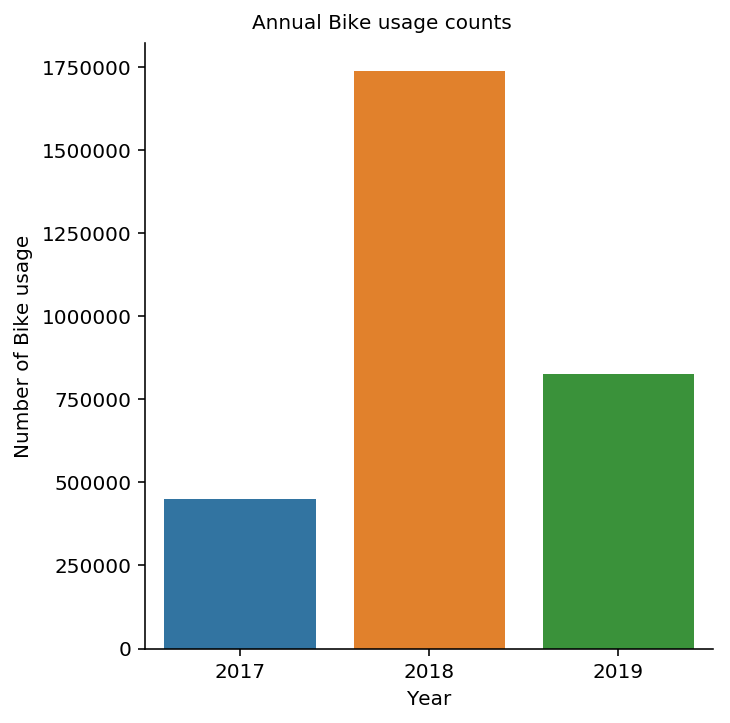

In [39]:
g = sns.catplot(data= df_ana, x='start_time_year', kind='count')
g.set_axis_labels("Year", "Number of Bike usage")
g.fig.suptitle('Annual Bike usage counts', y=1, fontsize=10);

This datasets were collected from full year of 2017, 2018 and January to April of 2019 which is one third of one year. Comparing 2017 and 2018 where full year information is accounted, the usage rate has exploded. 2017 annual usage is near 500,000 while 2018 annaul usage is near 1,750,000. It has increased by 3.5 times. And for 2019, if this rate continues, we can predict that annual usage rate for 2019 will be approximately, 800,000*3= 2,400,000. It seems that bike sharing industry will gradually increase every year. 

#### Figure out the monthly usage rate of Ford GoBike sharing system

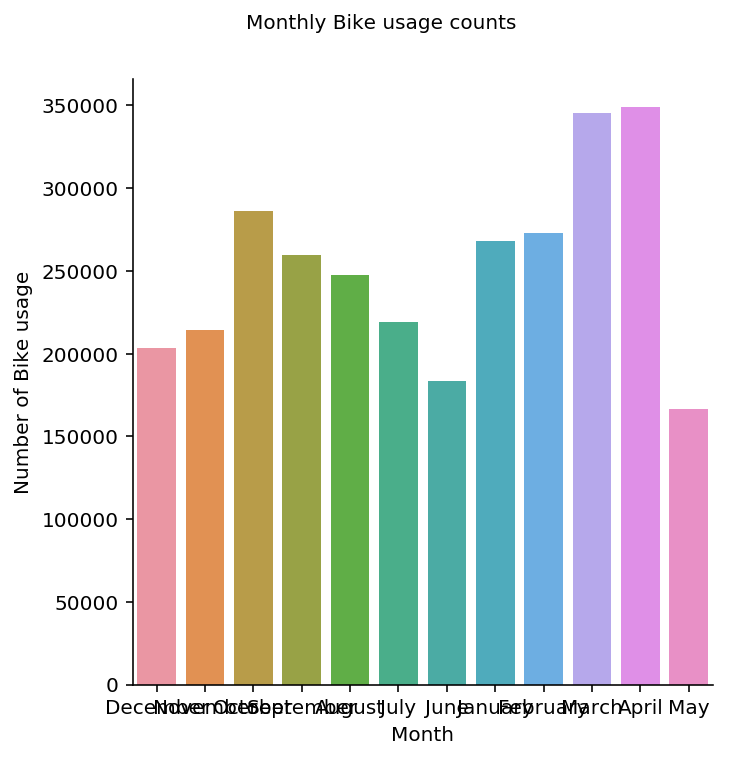

In [40]:
g = sns.catplot(data= df_ana, x='start_time_month', kind='count')
g.set_axis_labels("Month", "Number of Bike usage")
g.fig.suptitle('Monthly Bike usage counts', y=1.05, fontsize=10);

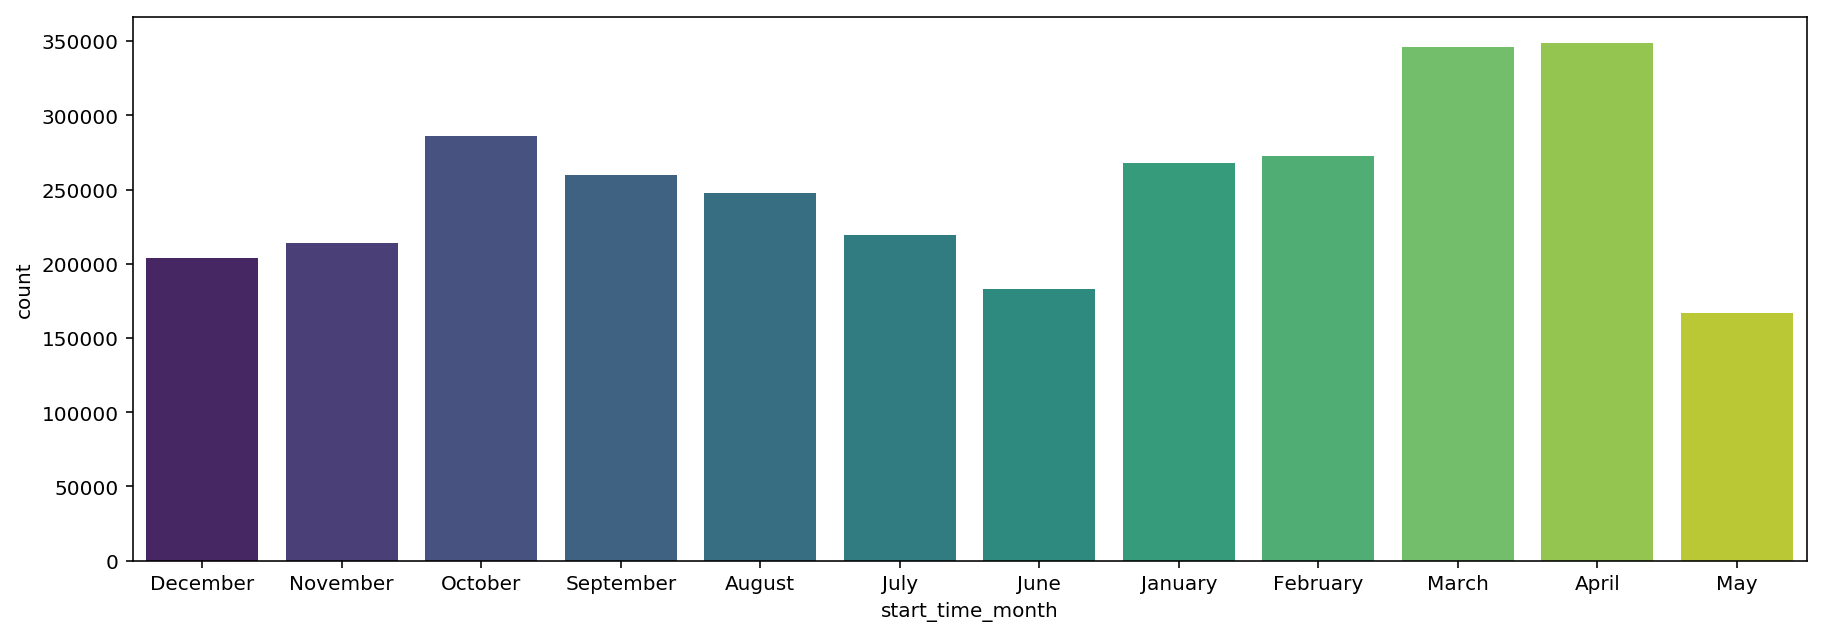

In [41]:
fig, ax = plt.subplots(figsize = (15,5))
sns.countplot(x = "start_time_month", data = df_ana, palette = "viridis");

This table shows that there are some differnces between months. From this table, we can see that March and April have highest usage rate, while May and June have lowest usage rate. This is because I have only added the part of 2019. Another coulmn will be needed to observe the monthly patter clearly.

In [42]:
df_ana['start_time_year_month'] = pd.to_datetime(df_ana["start_time"]).dt.to_period('M')

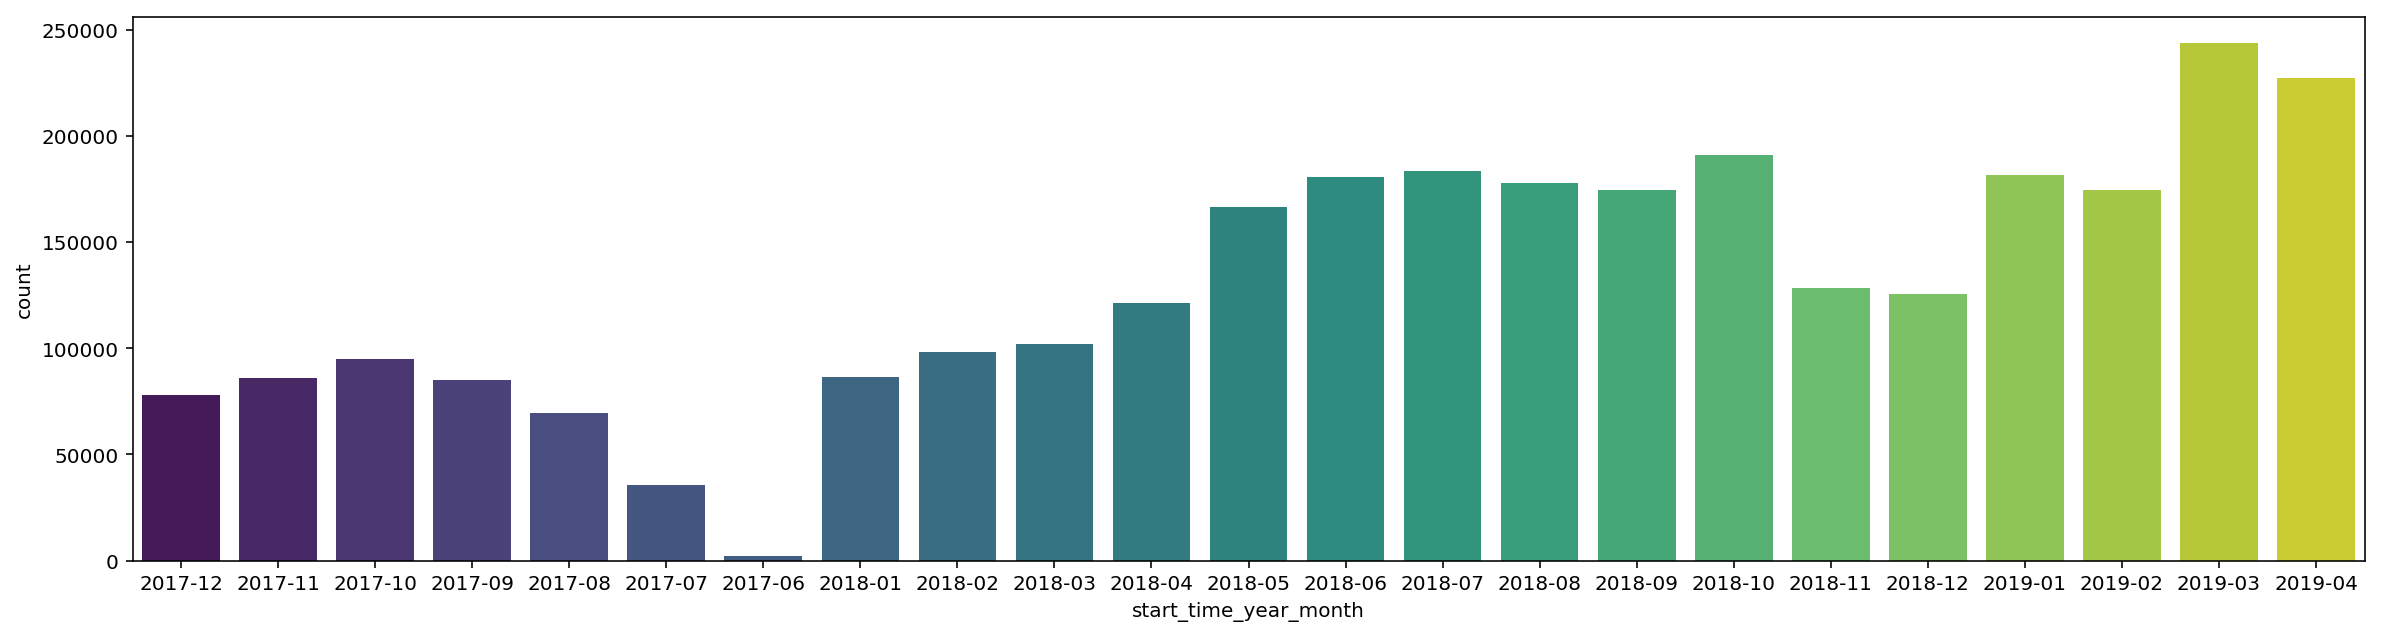

In [43]:
fig, ax = plt.subplots(figsize = (20,5))
sns.countplot(x = "start_time_year_month", data = df_ana, palette = "viridis");

If you see the table we can notice that this sharing system is affected by the weather. When the weather is warm like in May, June, July, August, the usage rates tend to increase. On the other hand, during cold season such as January, November, December have low usage rate.

#### Figure out the weekly usage rate of Ford GoBike sharing system

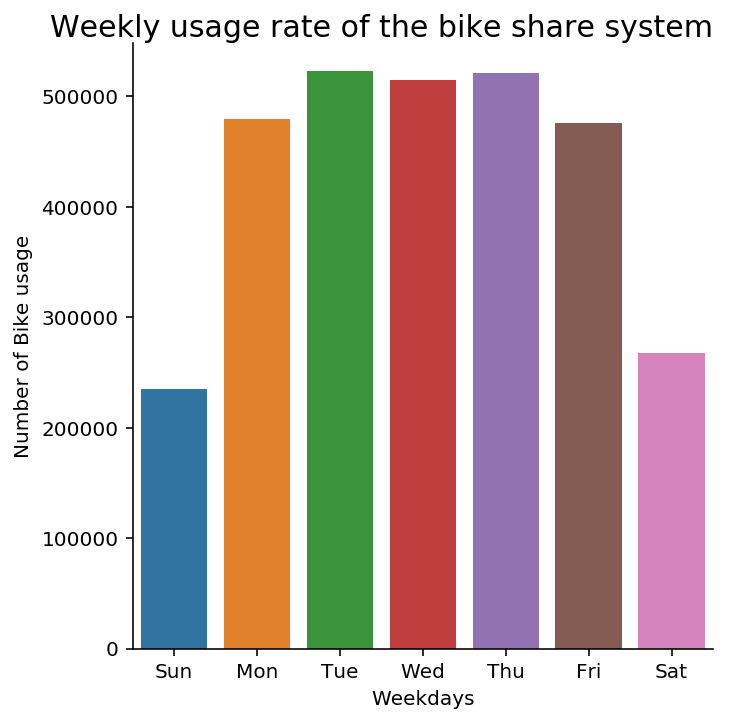

In [44]:
weekday = ['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
g = sns.catplot(data=df_ana, x='start_time_weekday', kind='count', order=weekday)
g.set_axis_labels("Weekdays", "Number of Bike usage")
g.fig.suptitle('Weekly usage rate of the bike share system', y=1, fontsize=15);

This shows that people tend to use the bike sharing system during weekdays rather then weekends.

#### Figure out the hourly usage rate of Ford GoBike sharing system

I have to create new column for start_time_hour.

In [45]:
df_ana['start_time_hr']=df_ana['start_time'].dt.hour

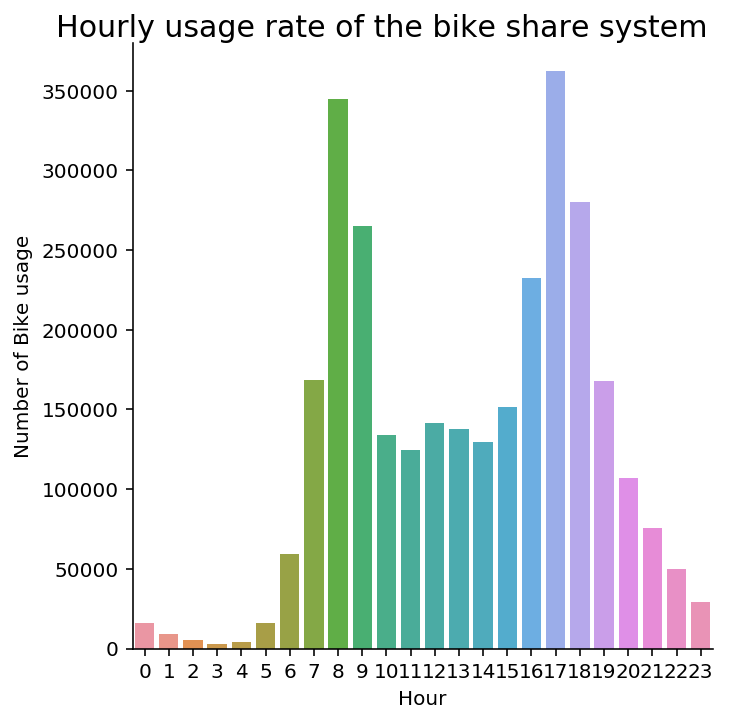

In [46]:
g = sns.catplot(data=df_ana, x='start_time_hr', kind='count')
g.set_axis_labels("Hour", "Number of Bike usage")
g.fig.suptitle('Hourly usage rate of the bike share system', y=1, fontsize=15);

This table shows that there are two peak time. One is at 8 am and another one is at 5 pm. And there are vey few usage during midnights.

#### Figure out Characteristics of Ford GoBike Users

There are serveral charactersitics which can be collected based on our gathered data. I am going to observe age, gender, user type and usage duration.

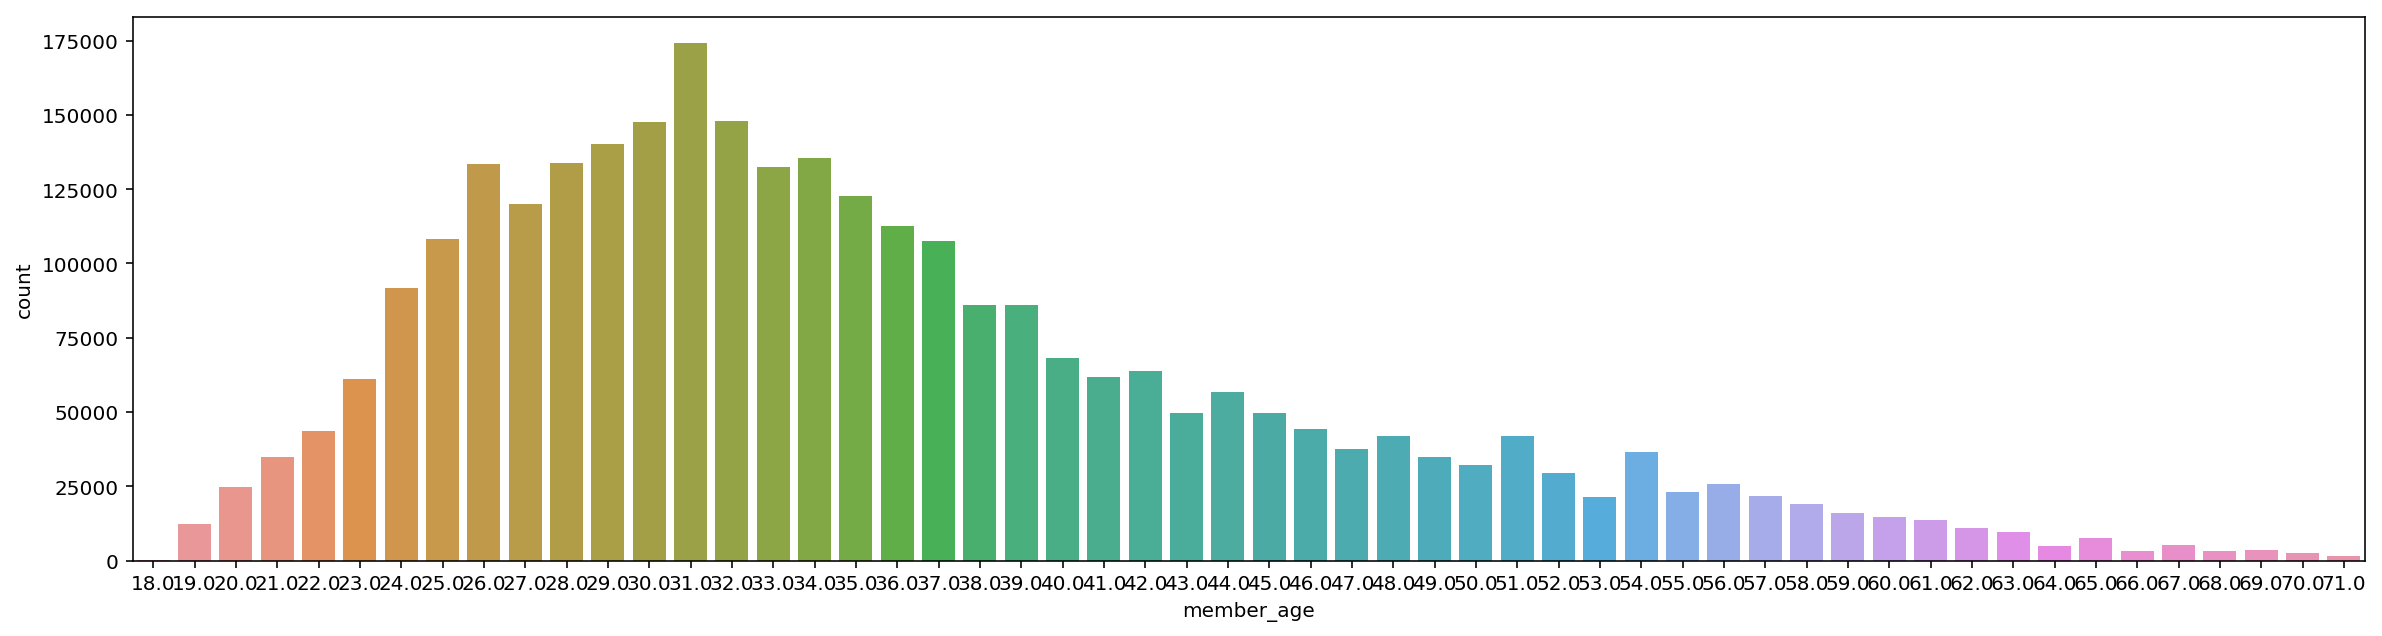

In [47]:
# Age
fig, ax = plt.subplots(figsize = (20,5))
color = sns.color_palette("viridis")[2]
sns.countplot(x = "member_age", data = df_ana.query("member_age != 0 < member_age < 72").sort_values("member_age"));

In [48]:
df_ana.member_age.mean()

35.72872484735116

As you can see above, most of users are aged betwwen 20s, 30s and early 40s. The member who aged 32 has highest rate(mode). And the mean of the age is 35.7. As you can see the graph starts with 20, which refers that sharing system users are older than 19 years old. 

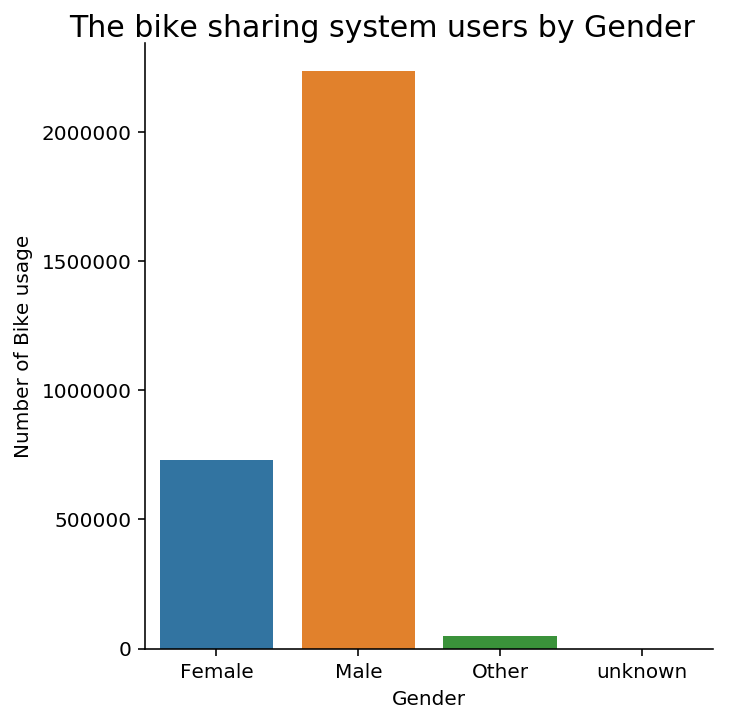

In [49]:
# Gender
g = sns.catplot(data=df_ana, x='member_gender', kind='count')
g.set_axis_labels("Gender", "Number of Bike usage")
g.fig.suptitle('The bike sharing system users by Gender', y=1, fontsize=15);

From the graph, we can see that male are the majority.

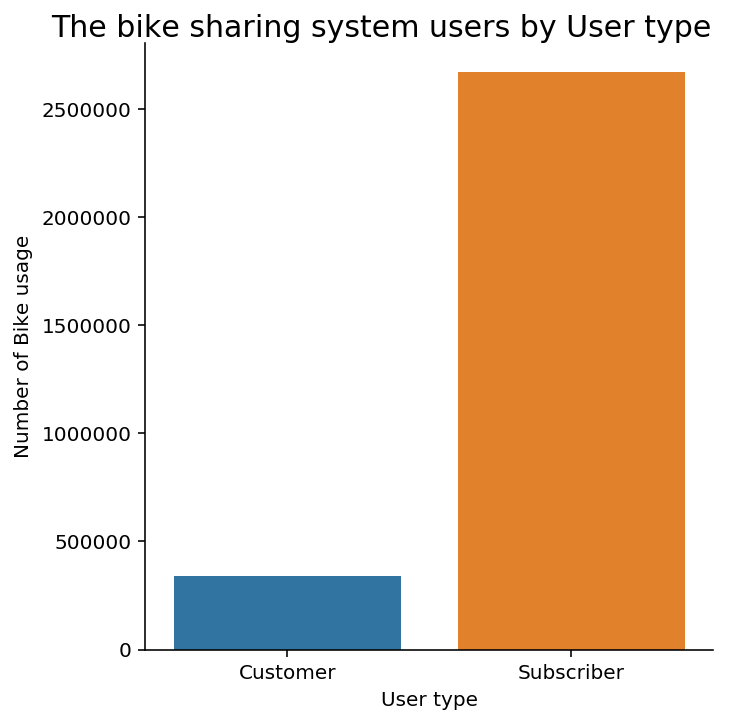

In [50]:
# User Type
g = sns.catplot(data=df_ana, x='user_type', kind='count')
g.set_axis_labels("User type", "Number of Bike usage")
g.fig.suptitle('The bike sharing system users by User type', y=1, fontsize=15);

Most of the users are subscribers rather than customers.

In [51]:
# For Usage duration, for easier interpretation, I will generate new column.
df_ana['duration_min'] = df_ana['duration_sec']/60

In [52]:
df_ana['duration_min'].mean()

12.913943878955767

In [53]:
df_ana['duration_min'].describe(percentiles = [.1, .25, .5, .75, .9, .95])

count    3.015090e+06
mean     1.291394e+01
std      3.318119e+01
min      1.016667e+00
10%      3.783333e+00
25%      5.750000e+00
50%      9.033333e+00
75%      1.393333e+01
90%      2.078333e+01
95%      2.738333e+01
max      1.438017e+03
Name: duration_min, dtype: float64

Text(0.5, 0, 'per Days')

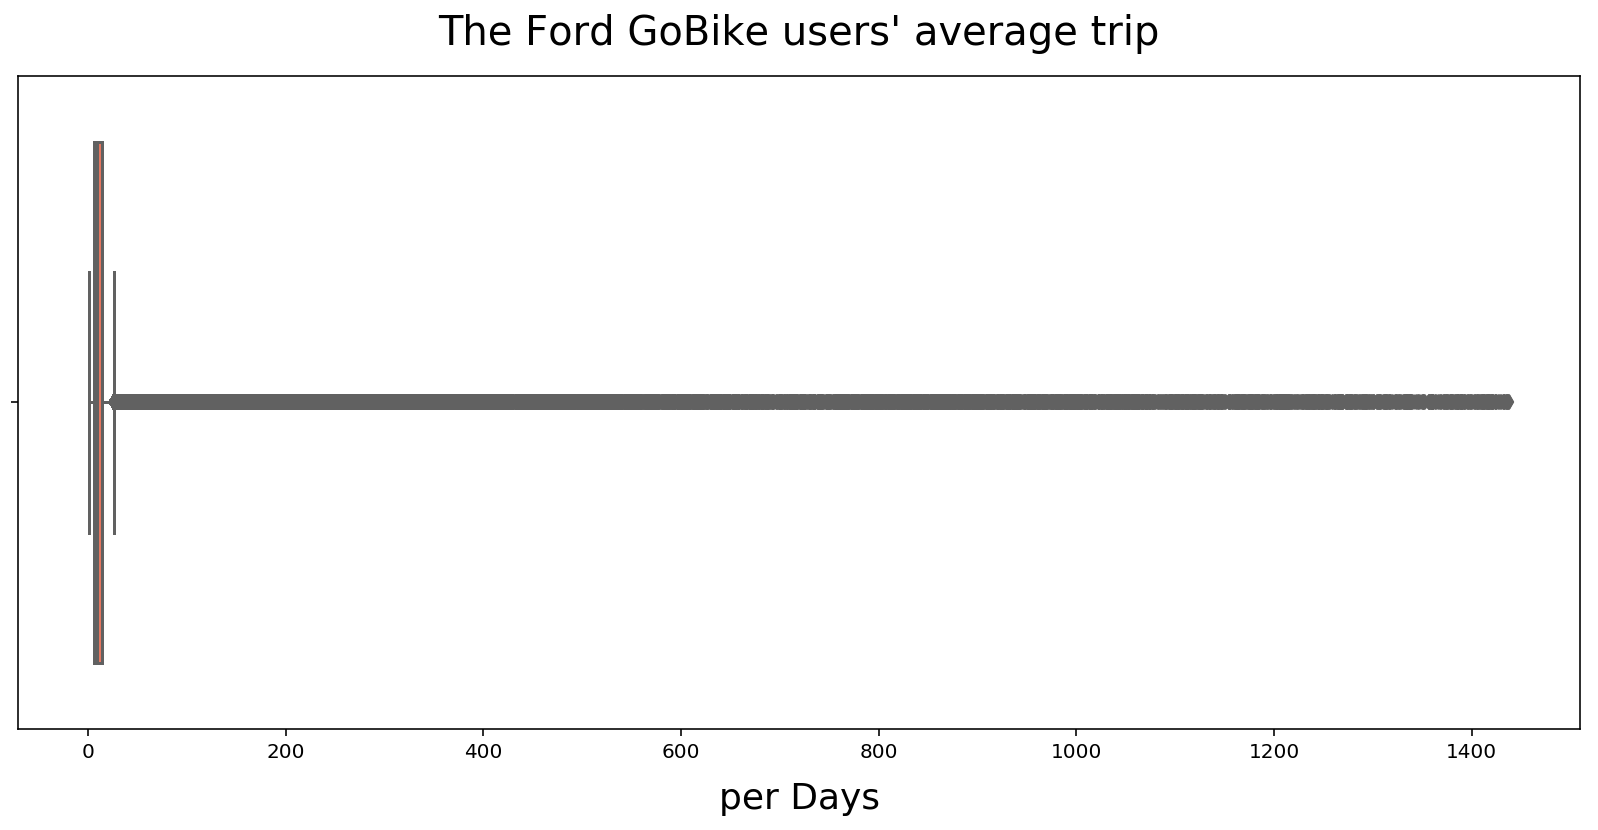

In [54]:
plt.figure(figsize=(14,6))
sns.boxplot(x='duration_min', data=df_ana, palette='Reds', orient='h')
plt.title("The Ford GoBike users' average trip", fontsize=20, y=1.03)
plt.xlabel("per Days", fontsize=18, labelpad=10)

The average trip duration is 12.9 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I have analyzed the start date (year, month, weekday, day of time), gender, users type, age, trip duration to futher explore the characterisitcs of users' pattern. I will highlight some of the key findings in this section. First, annul usage is gradually increasing. Second, the usage rate is affected by weather and the higher usage rate are during summer and lower usage rate are during winter. Third, users tend to use the system during weekdays rather than weekends. Fourth, there are two peaks in a day which are 8 am and 5pm. This refers that users use the system when they are going to work or school rather than leisure. Fifth, the majority users are male and subscribers. Lastly, the average trip usage is 12.9 minutes.

>During the univatiate variable section, I have created new column for easier interpretation; in year, hour and min.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were a few outliers in age column. So I have figured out the mean and distribution of age then I have cutted the range from 0 to 72 for the tidiness of the data. I have done this procedure in the Cleaning Data section. I have set the maximum age to 72 because 72 was found to be average age of life expectancy. 

## Bivariate Exploration

In [55]:
df_ana.head()

bike_id bike_share_for_all_trip  duration_sec end_station_id  \
0       96                     NaN         80110             96   
1       88                     NaN         78800             88   
4     3167                     NaN         43603           3167   
6     3539                     NaN          4507           3539   
12    2311                     NaN          2183           2311   

    end_station_latitude  end_station_longitude  \
0              37.778768            -122.415929   
1              37.766210            -122.426614   
4              37.867789            -122.265896   
6              37.866249            -122.299371   
12             37.789677            -122.390428   

                                     end_station_name                end_time  \
0   San Francisco Public Library (Grove St at Hyde... 2018-01-01 15:12:50.245   
1                               Dolores St at 15th St 2018-01-01 13:49:55.617   
4                           Fulton St at Bancroft Way 2018-01-01 02:29:57.571   
6                             Addison St at Fourth St 2018-01-01 01:04:35.619   
12                              Spear St at Folsom St 2018-01-01 00:29:18.743   

    member_birth_year member_gender  ...   user_type  member_age  \
0              1987.0          Male  ...    Customer        32.0   
1              1965.0        Female  ...    Customer        54.0   
4              1997.0        Female  ...  Subscriber        22.0   
6              1991.0        Female  ...    Customer        28.0   
12             1990.0          Male  ...  Subscriber        29.0   

    start_time_month start_time_weekday end_time_month end_time_weekday  \
0           December                Sun        January              Mon   
1           December                Sun        January              Mon   
4           December                Sun        January              Mon   
6           December                Sun        January              Mon   
12          December                Sun        January              Mon   

    start_time_year start_time_year_month start_time_hr duration_min  
0              2017               2017-12            16  1335.166667  
1              2017               2017-12            15  1313.333333  
4              2017               2017-12            14   726.716667  
6              2017               2017-12            23    75.116667  
12             2017               2017-12            23    36.383333  

[5 rows x 25 columns]

In [56]:
# Percentage of each components in User type (Customer, Subscriber)
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

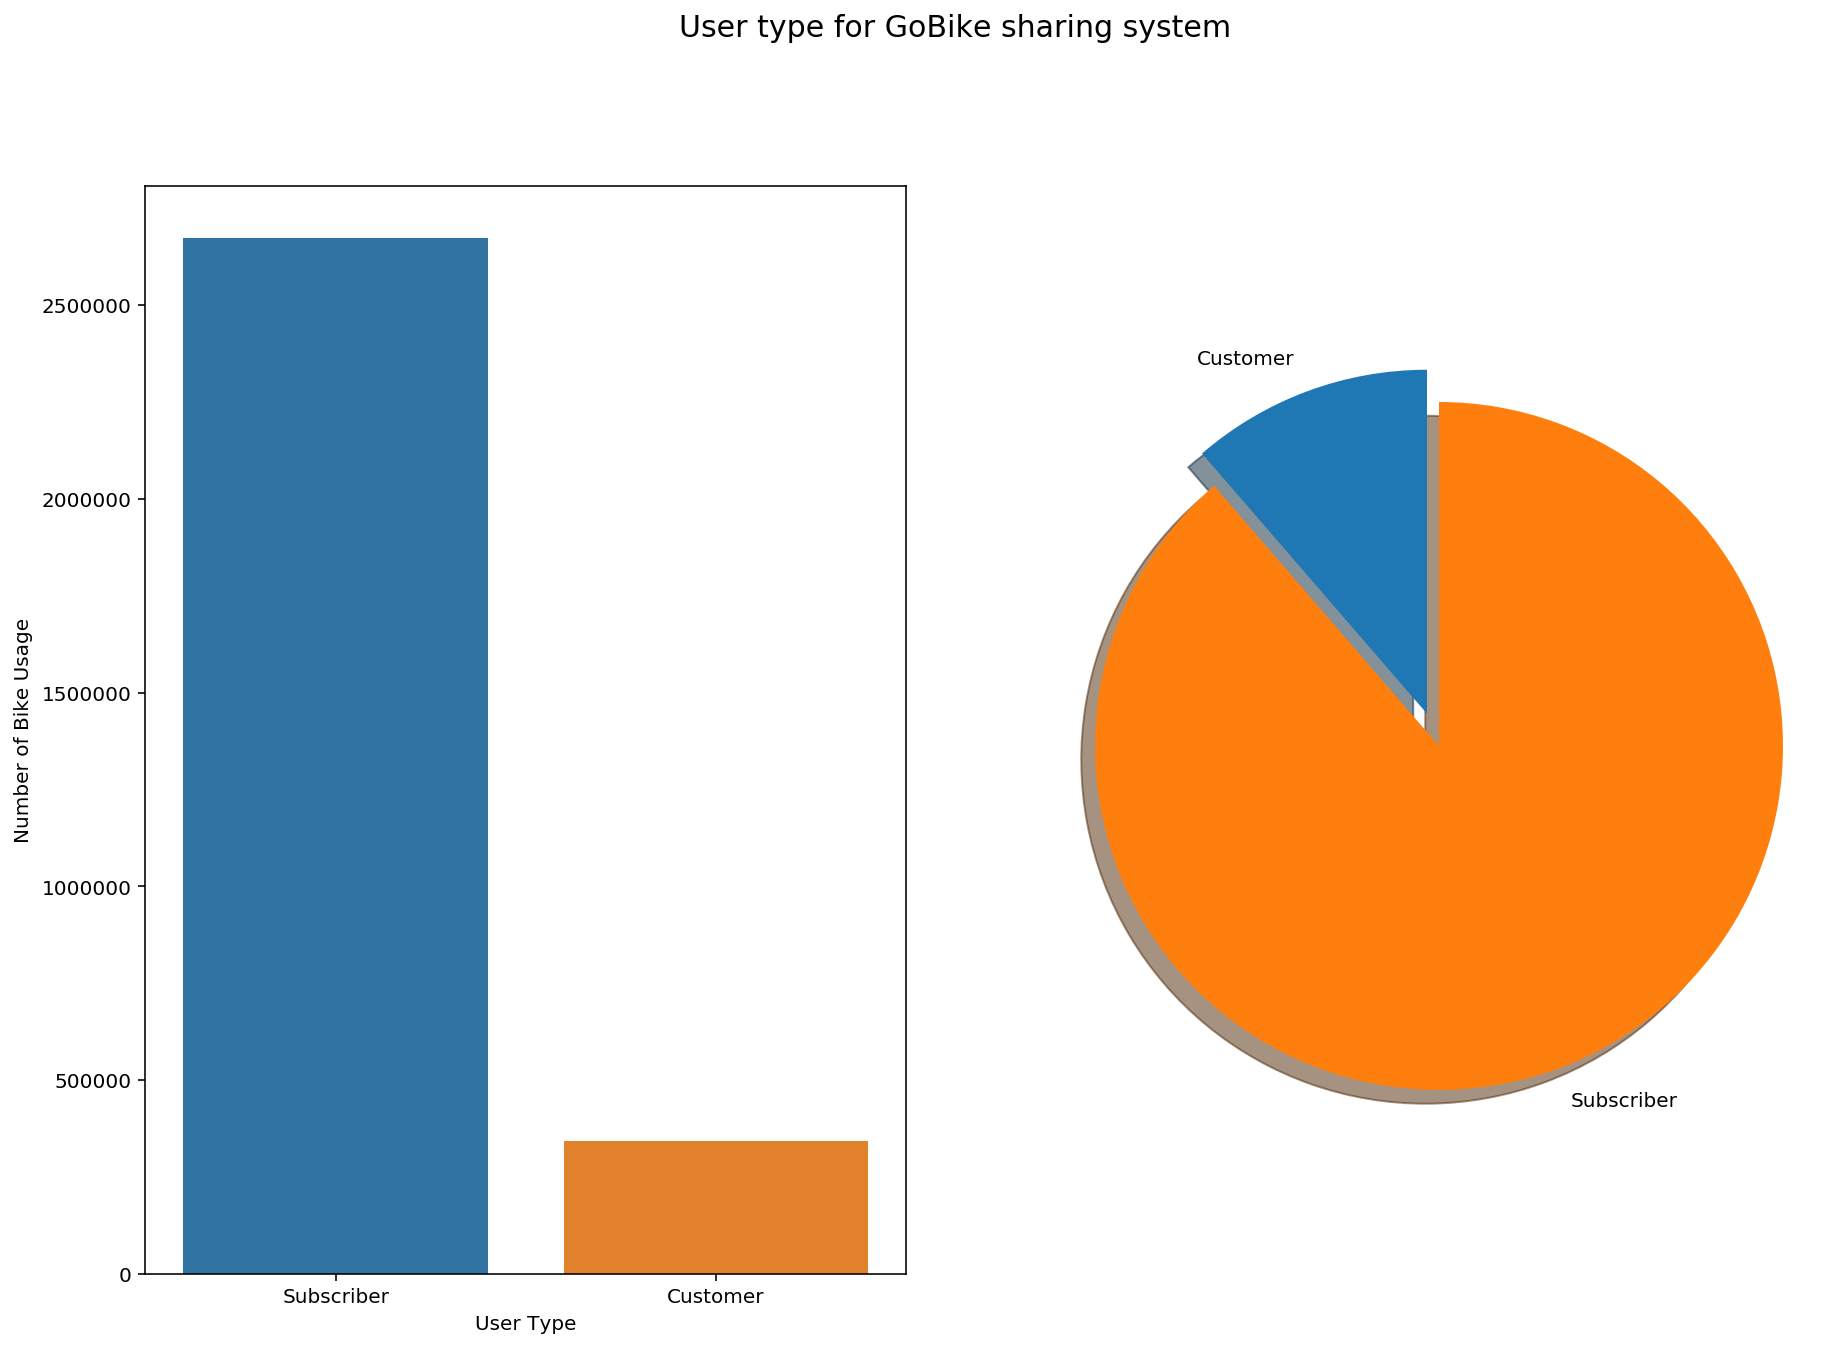

In [57]:
plt.figure(figsize = [15,10])

plt.subplot(1, 2, 1)

g = sns.countplot(data = df_clean, x = "user_type", order = df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Number of Bike Usage')

plt.subplot(1,2,2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
explode = (0, 0.1)

plt.pie(sizes, explode = explode, labels = labels, shadow = True, startangle = 90)
plt.axis('equal')
plt.suptitle('User type for GoBike sharing system', y = 1, fontsize = 15);

As you can see from above bar and pie graph, 88.7% of the population are subcribers and only 11.3% of the population are customers. 

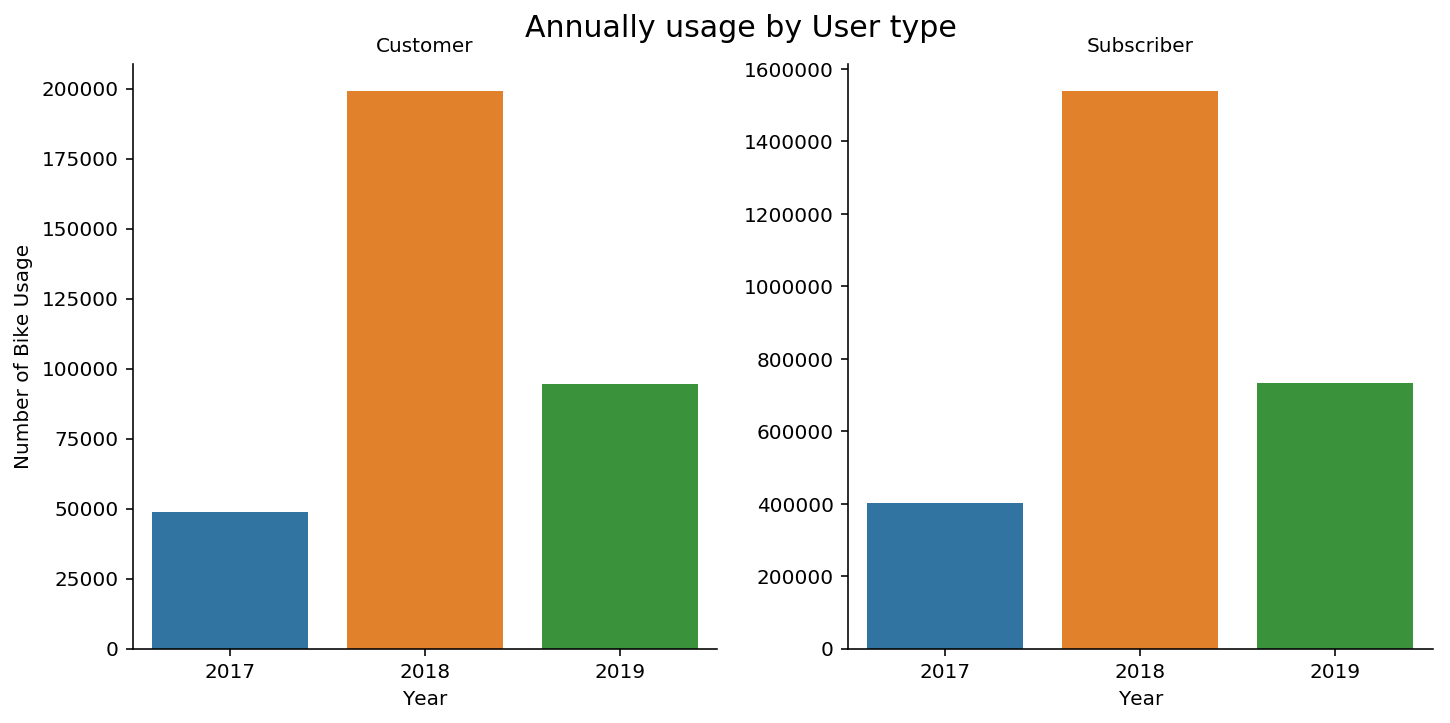

In [58]:
# Annually by User type
g = sns.catplot(data=df_ana, x='start_time_year', col = "user_type", kind = 'count', sharey = False)
g.set_axis_labels("Year", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Annually usage by User type', y = 1.00, fontsize = 15);

From here, I am going to observe the usage rate differences between user types based on the timing. First, I am going to observe the annual differences. The shape seems to be similar. Both graph shows that the usage rate has dramatically increased from 2017 to 2018. It has increased nearly 4 times compared to 2017. 

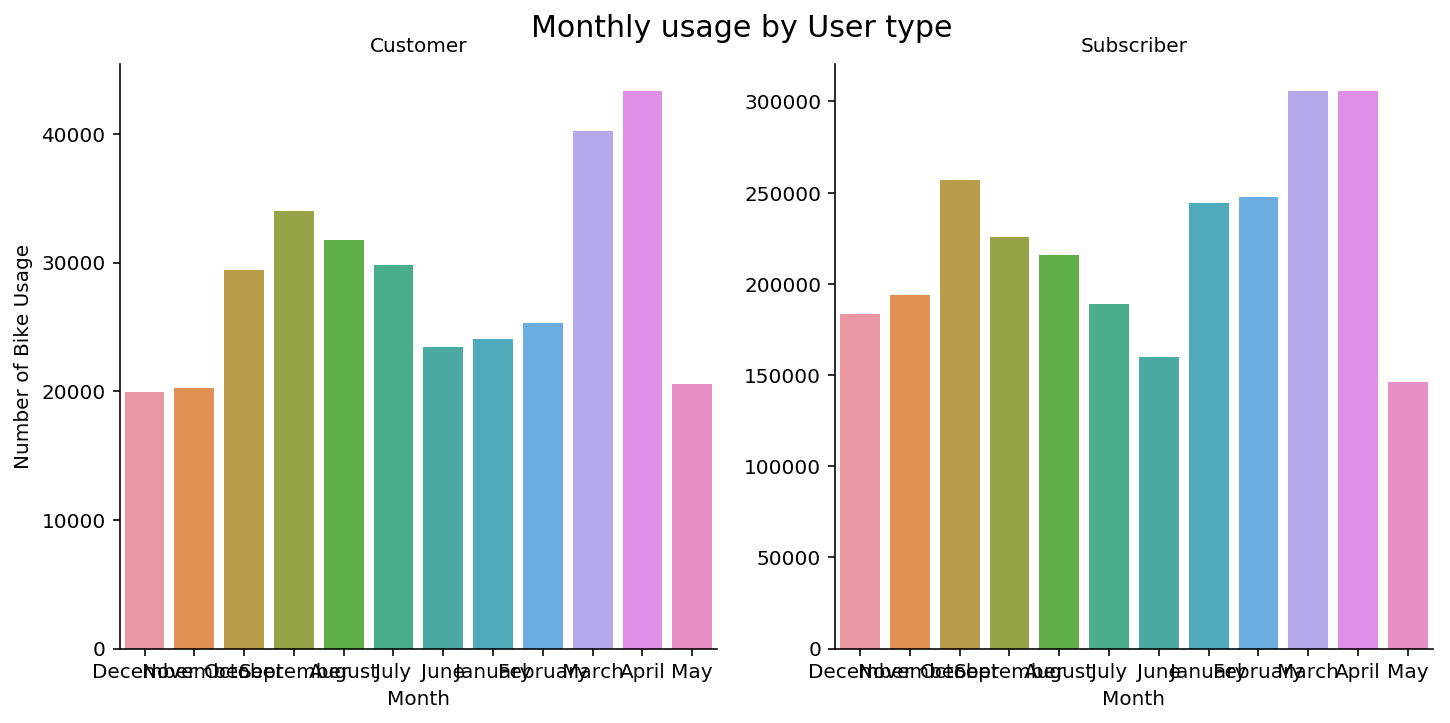

In [59]:
# Monthly by User type
g = sns.catplot(data=df_ana, x='start_time_month', col = "user_type", kind = 'count', sharey = False, )
g.set_axis_labels("Month", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage by User type', y = 1, fontsize = 15);

Now, I going to observe the monthly difference. The overall shapes follows similar patterns. There are two peaks on March, April and Septmber, October. The users usage patterns are affected by the weather. 

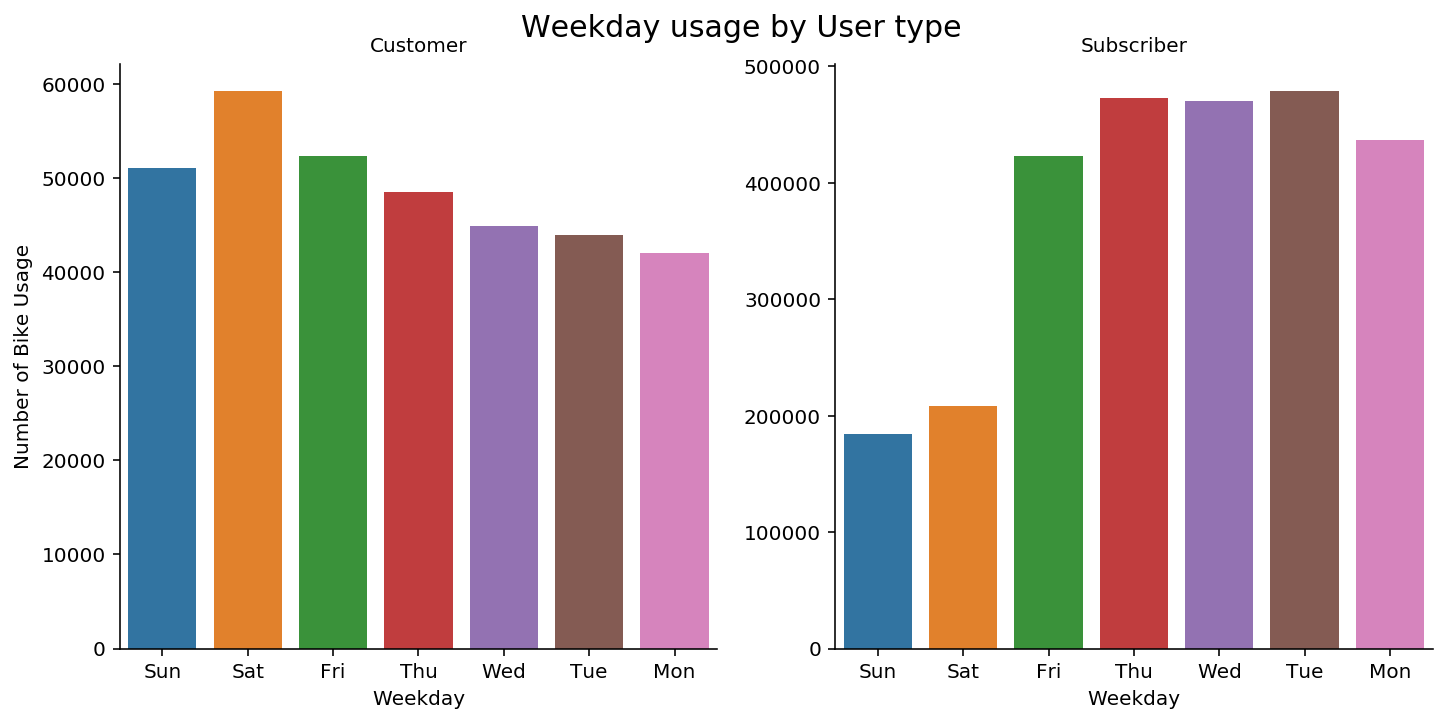

In [60]:
# Weekday by User type
weekday = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col = "user_type", kind = 'count', sharey = False)
g.set_axis_labels("Weekday", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday usage by User type', y = 1, fontsize = 15);

Compared to annaul and months comparison graph, the weekday usage patter between subscribers and customers shows some differences. First looking at customer graph, the usage patter are even through out the week. And customers tend to use the service during Friday to Sunday. From this we can predict customers are using this service for leisure. On the other hand, subscribers have low usage rate during the weekend and high during weekday. The usage rate for subsrcibers during the weekday is nearly 2 times higher than during weekends. This can refer subscribers are using this service for transportation to work or school rather than leisure.

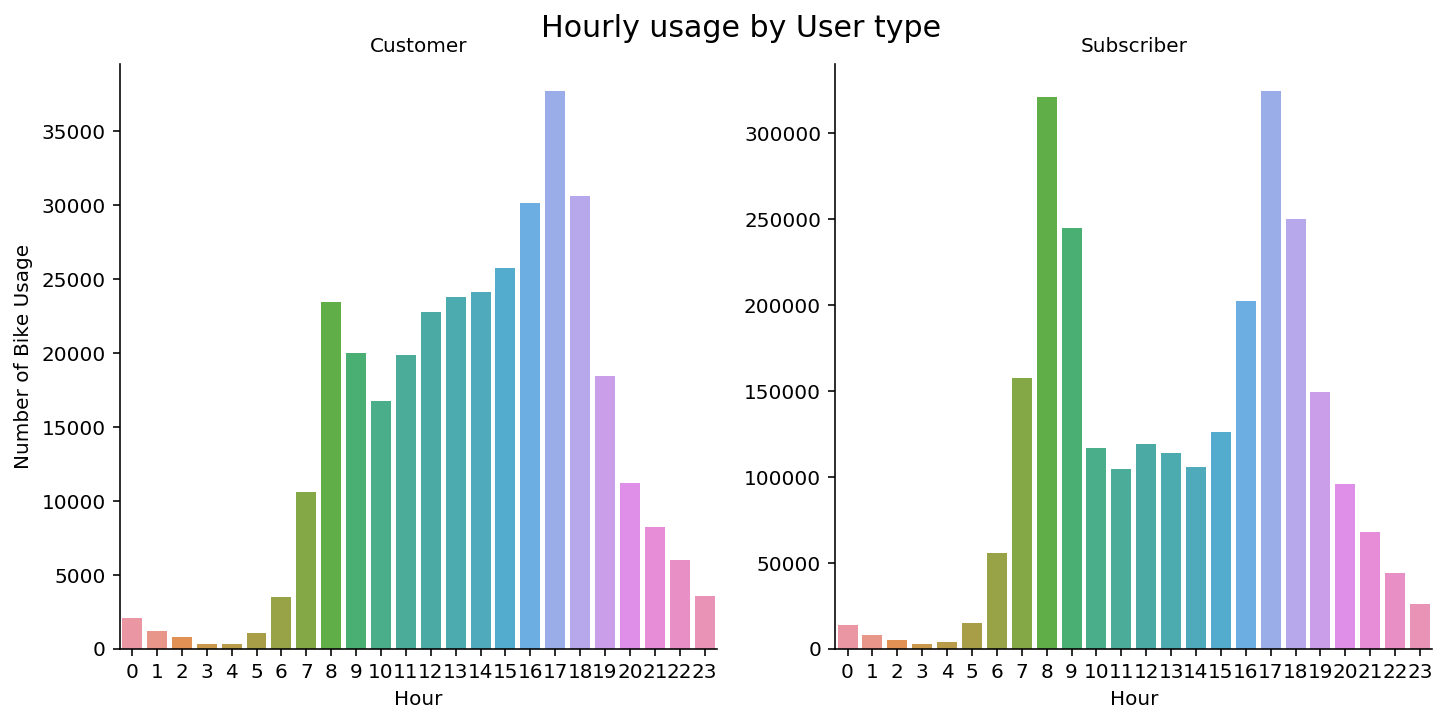

In [61]:
# Hour by User type
g = sns.catplot(data=df_ana, x='start_time_hr', col = "user_type", kind = 'count', sharey = False)
g.set_axis_labels("Hour", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage by User type', y = 1, fontsize = 15);

This part I have analyzed the hourly usage based on user types. There are two peak time range for both graphs; 8~9am and 16~18pm. This pattern can be refered as that both subscribers and customers are using this service for commute to school or workplace. First looking at customer graph, there are even usages throughout the day time. On the other hand, for subscribers, there are big differences between commute peak time and daytime. And there are interesting pattern bewteen 7am/16pm, 8am/17pm and 8am/18pm. Those three couplings have same heights which we can assume same workers or students spend approximately 9 hours at their place and then go back home. 

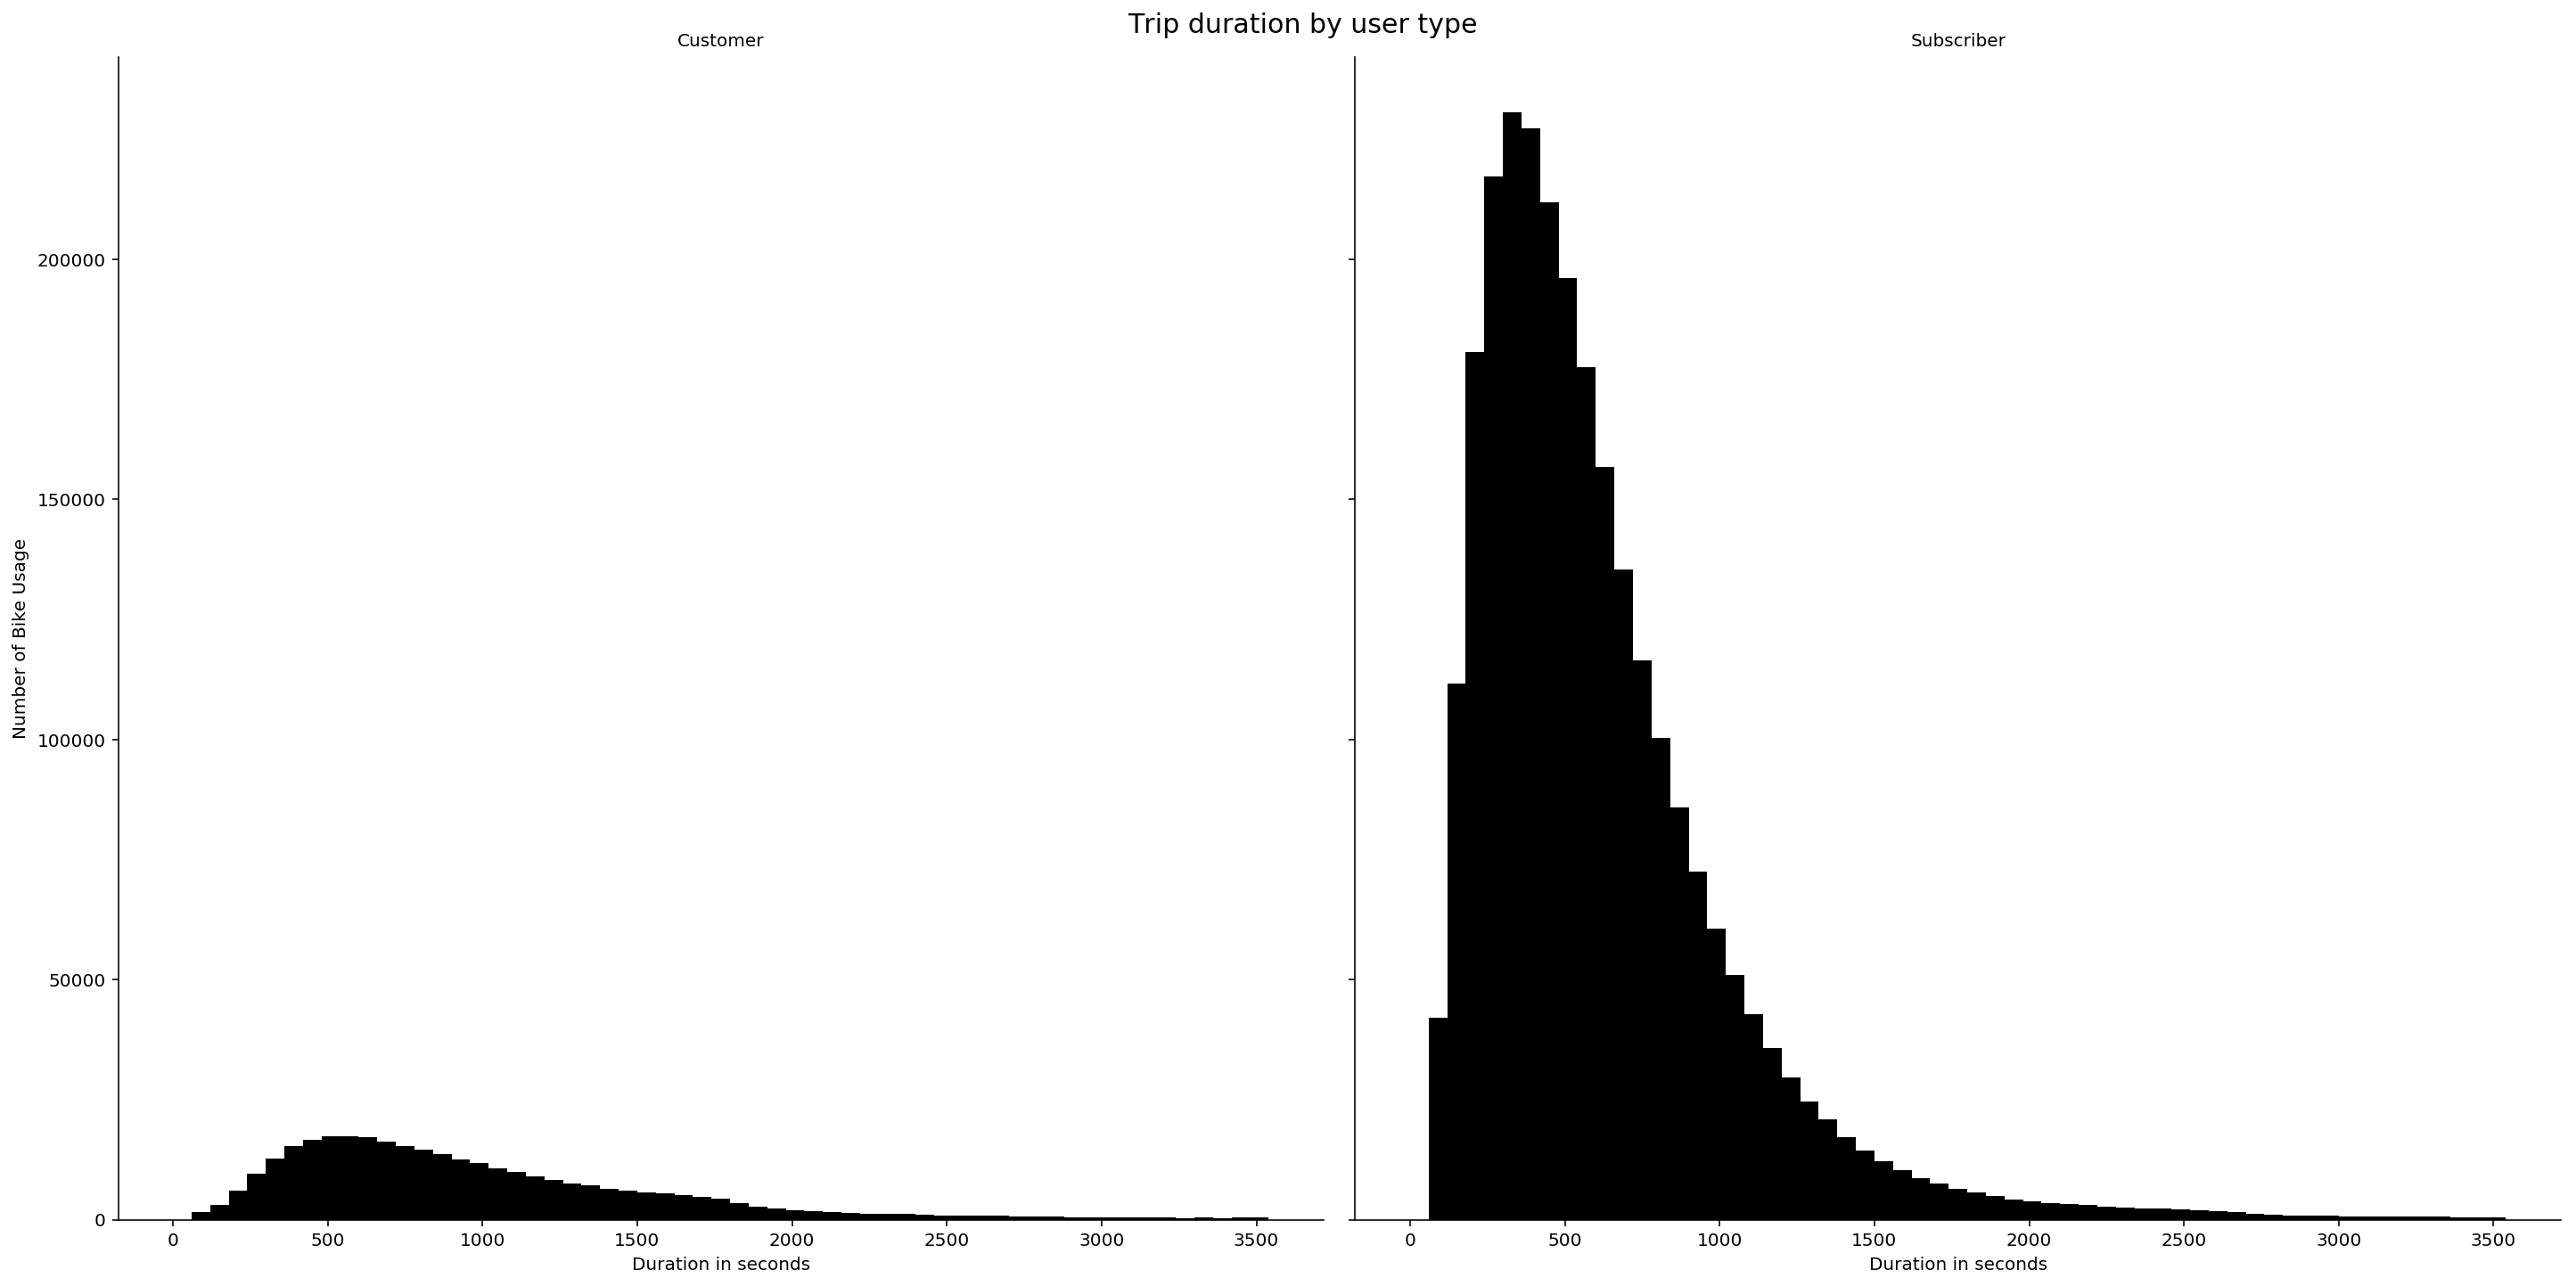

In [62]:
# Trip Duration by User type
g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=10)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color= 'black', bins=bin_edges)
g.set_axis_labels("Duration in seconds", "Number of Bike Usage")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration by user type', y=1, fontsize=15);

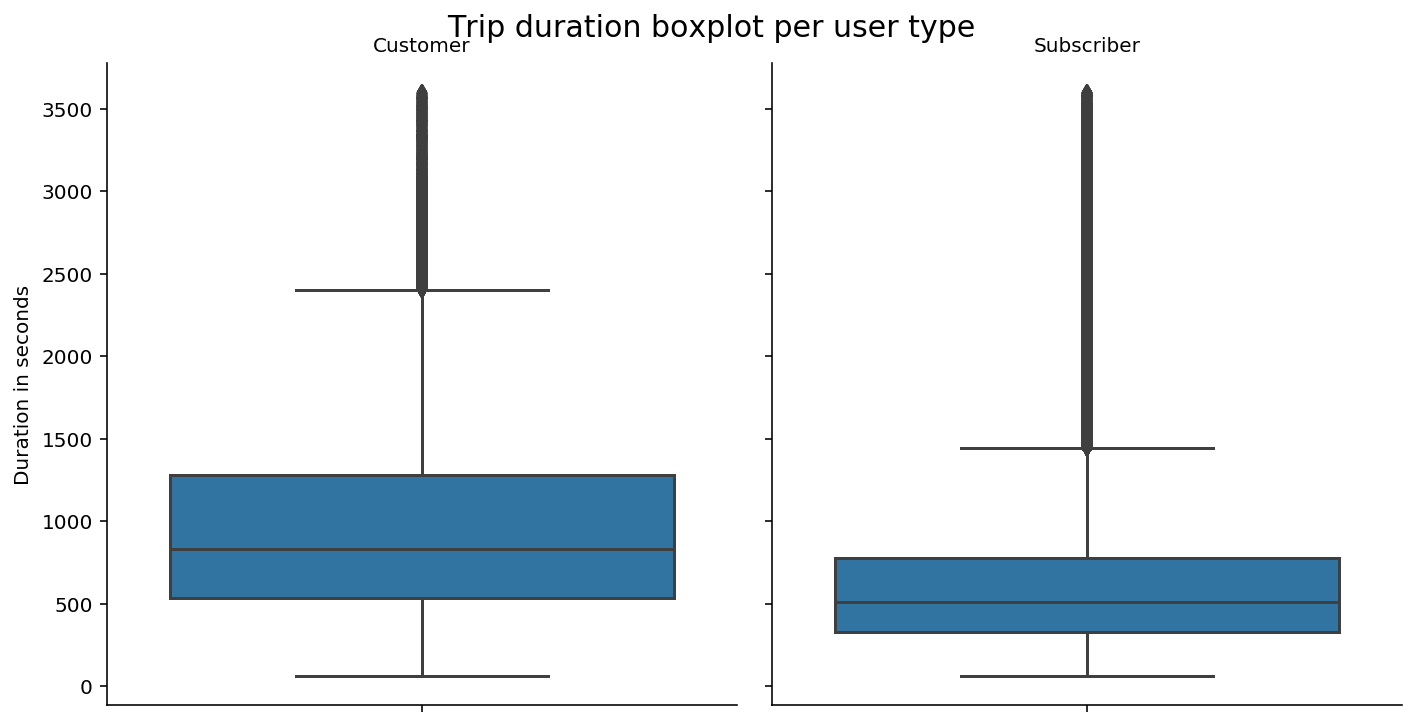

In [63]:
data = df_ana.query('duration_sec < 3600')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box')
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration in seconds")
g.fig.suptitle('Trip duration boxplot per user type', y=1, fontsize=15);

The trip duration for customer has longer range while the trop duration for subscribers has short range. The mean trip duration for customers are near 1000 seconds and the mean trip duration for subscribers are near 500 seconds. 

In [64]:
# Percentage of each components in Gender
male = df_ana.query('member_gender == "Male"')['bike_id'].count()
female = df_ana.query('member_gender == "Female"')['bike_id'].count()

male_proportion = male / df_ana['bike_id'].count()
female_proportion = female / df_ana['bike_id'].count()

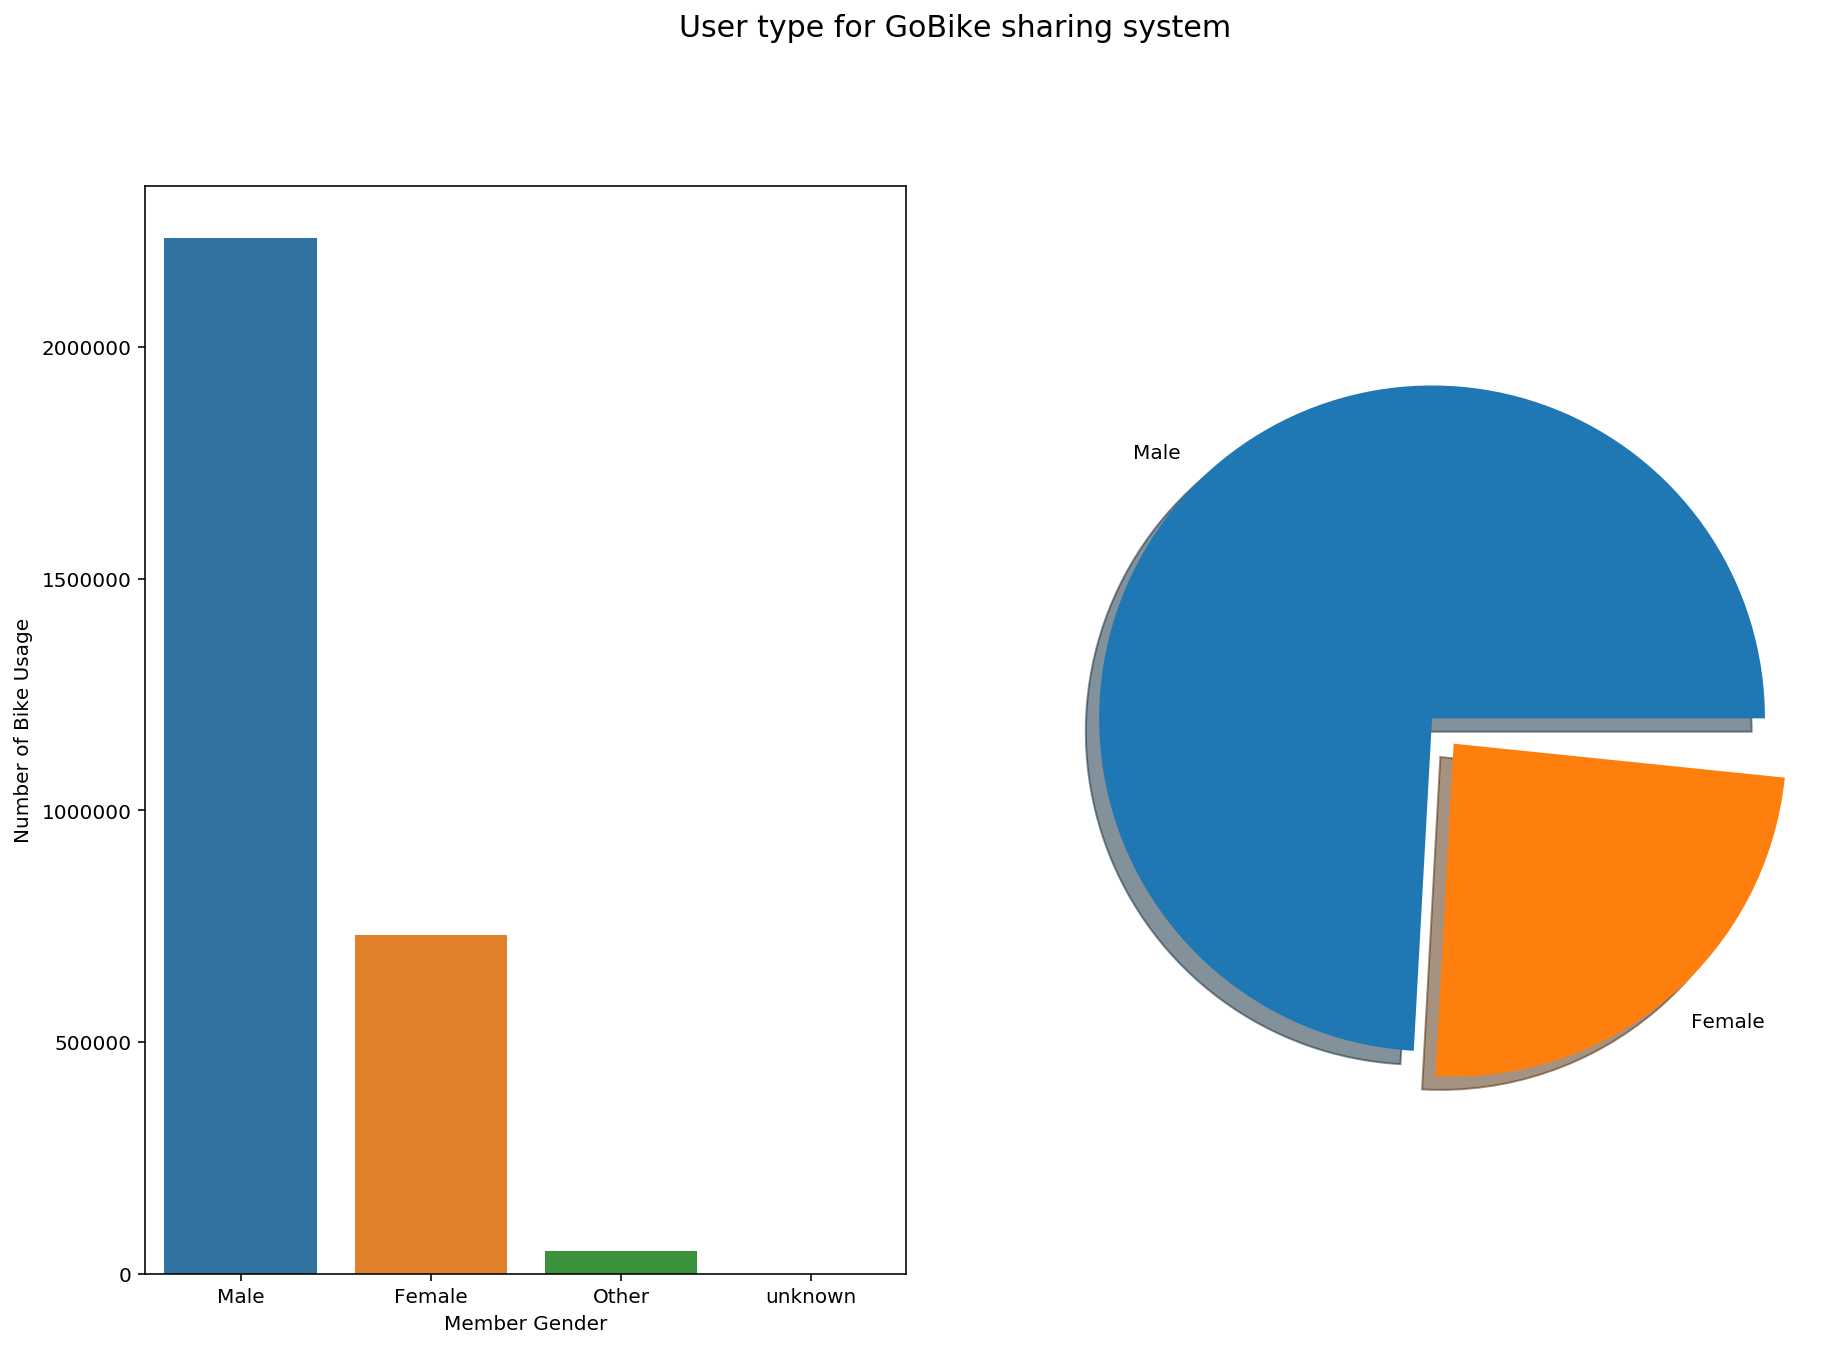

In [65]:
plt.figure(figsize = [15,10])

plt.subplot(1, 2, 1)

g = sns.countplot(data = df_clean, x = "member_gender", order = df_clean.member_gender.value_counts().index)
g.set_xlabel('Member Gender')
g.set_ylabel('Number of Bike Usage')

plt.subplot(1,2,2)

labels = ['Male', 'Female']
sizes = [male_proportion, female_proportion]
explode = (0, 0.1)

plt.pie(sizes, explode = explode, labels = labels, shadow = True)
plt.axis('equal')
plt.suptitle('User type for GoBike sharing system', y = 1, fontsize = 15);

This shows that 74.1% pf the population are male and other 24.2% are female. The other referes users whose gender are not included. 

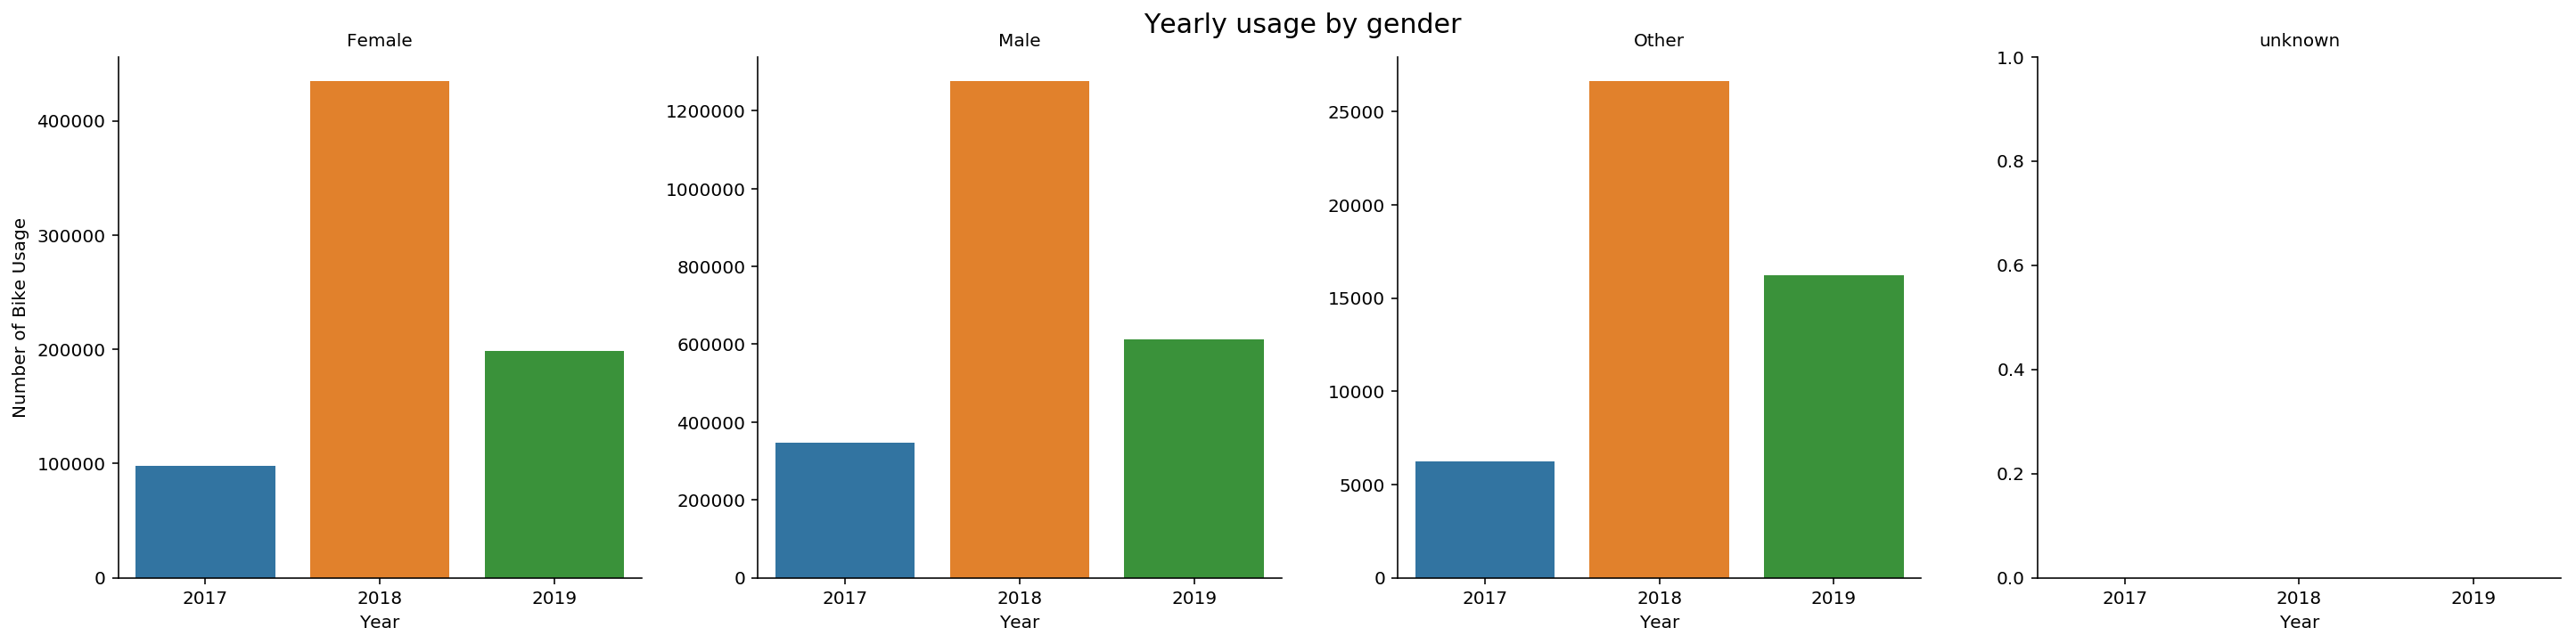

In [66]:
# Annually by Gender
g = sns.catplot(data=df_ana, x='start_time_year', col = "member_gender", kind = 'count', sharey = False)
g.set_axis_labels("Year", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Yearly usage by gender', y = 1, fontsize = 15);

There are no interesting findings here. These patterns are intuitive because of the difference between annual demand. 

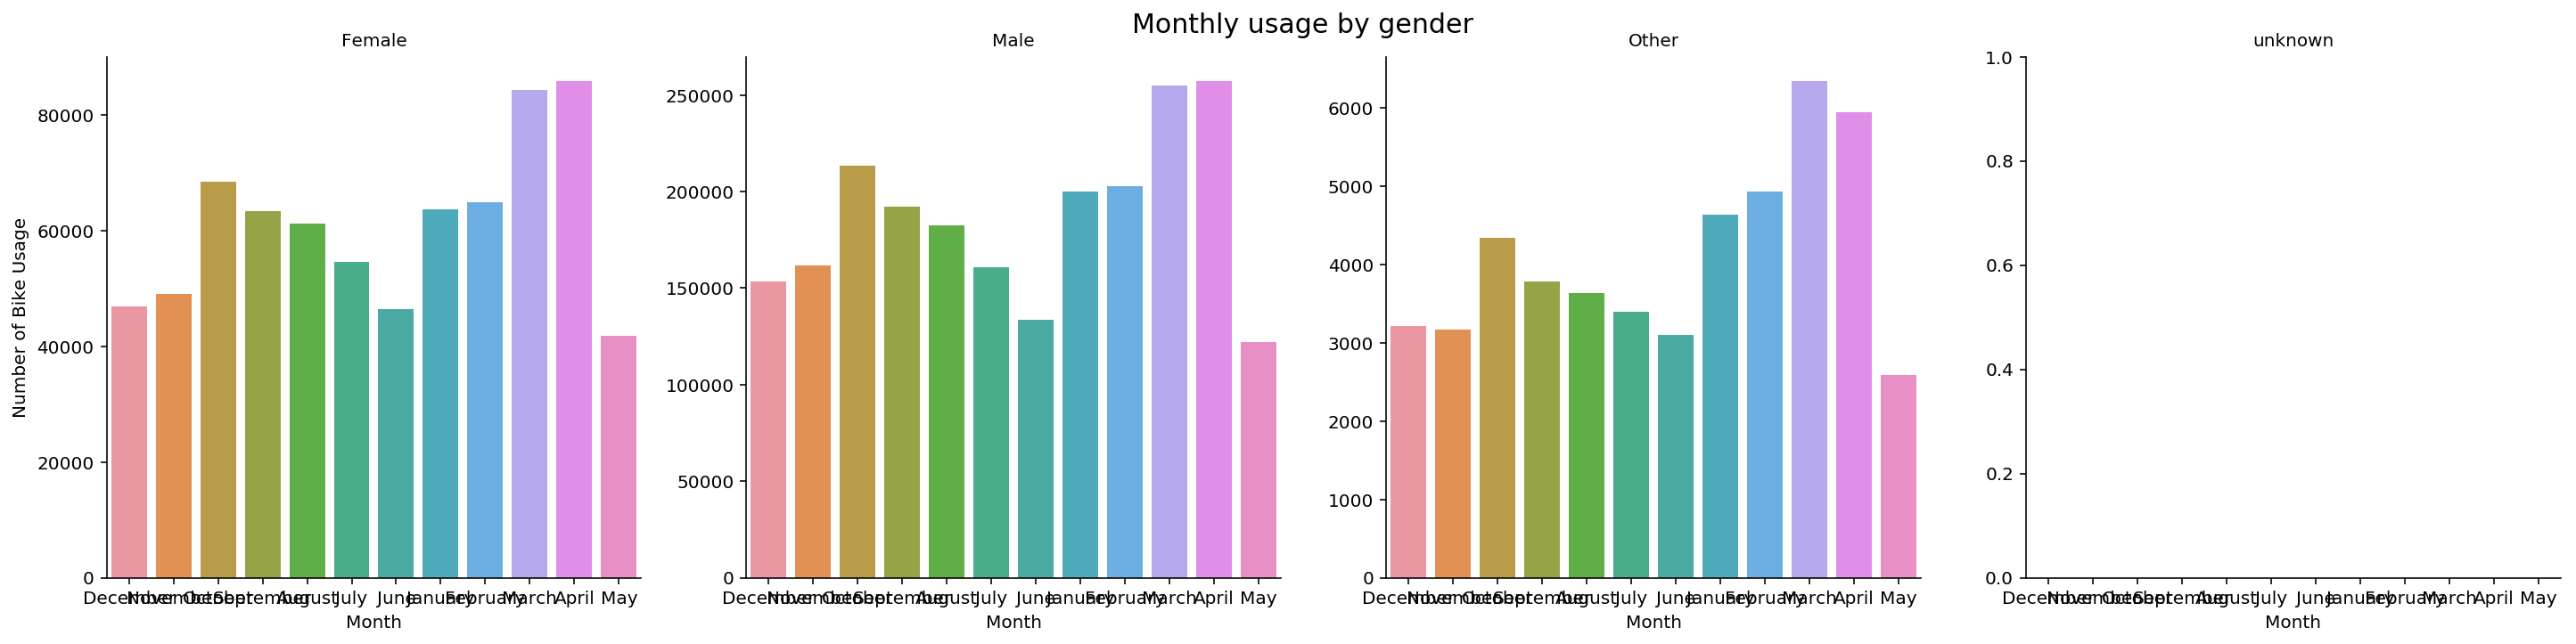

In [67]:
# Monthly by Gender
g = sns.catplot(data=df_ana, x='start_time_month', col = "member_gender", kind = 'count', sharey = False)
g.set_axis_labels("Month", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage by gender', y = 1, fontsize = 15);

The pattern betwen male and female shows same. The highest usage rate are observed on March and April. 

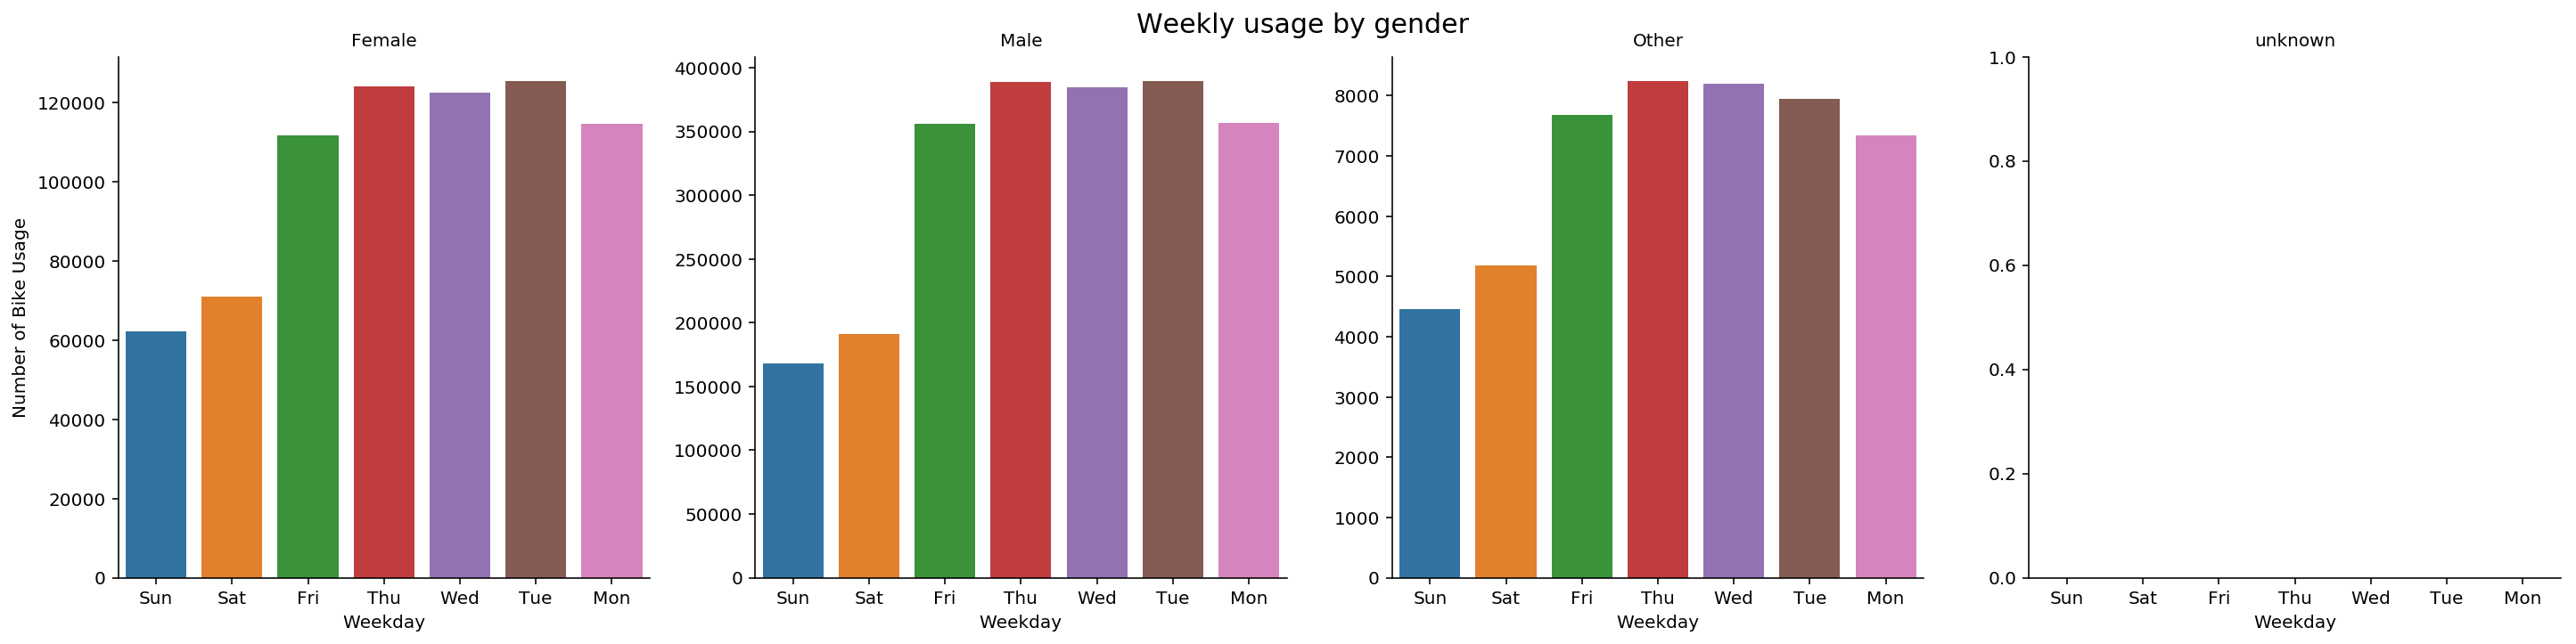

In [68]:
# Weekday by Gender
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col = "member_gender", kind = 'count', sharey = False)
g.set_axis_labels("Weekday", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage by gender', y = 1, fontsize = 15);

The pattern betwen male and female shows same. People tend to use the service during the weekday and lower during weekends. 

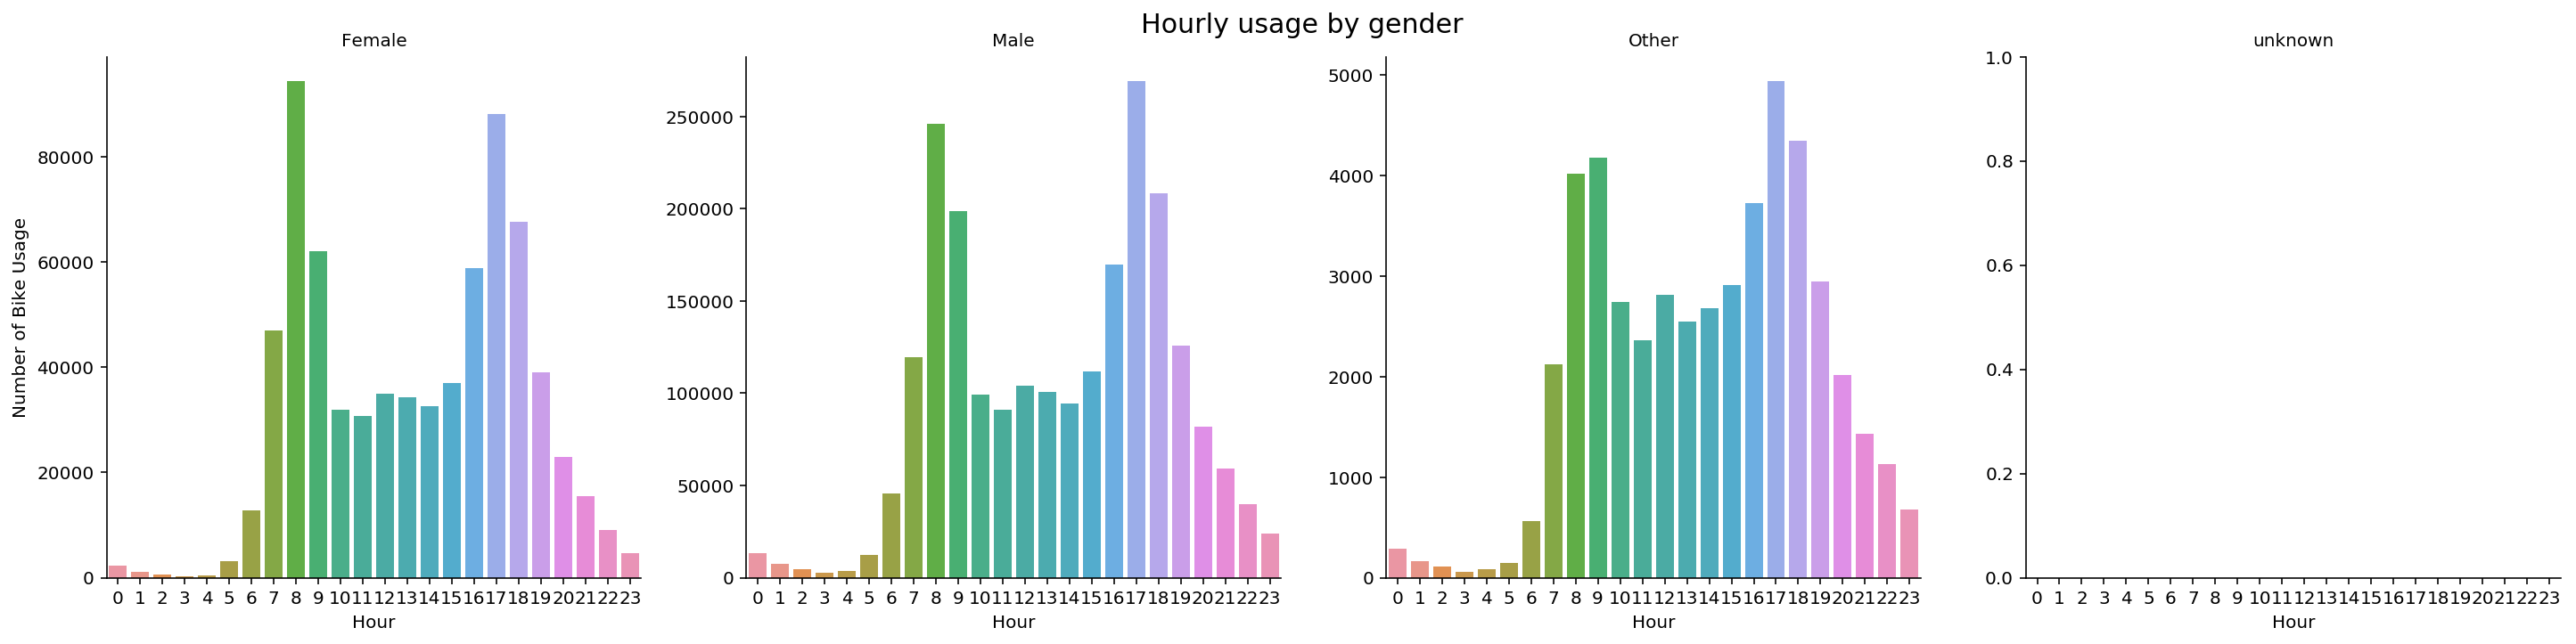

In [69]:
# Hour by Gender
g = sns.catplot(data=df_ana, x='start_time_hr', col = "member_gender", kind = 'count', sharey = False)
g.set_axis_labels("Hour", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage by gender', y = 1, fontsize = 15);

The pattern betwen male and female shows same. This pattern is similar to graph of hourly distribution above. 

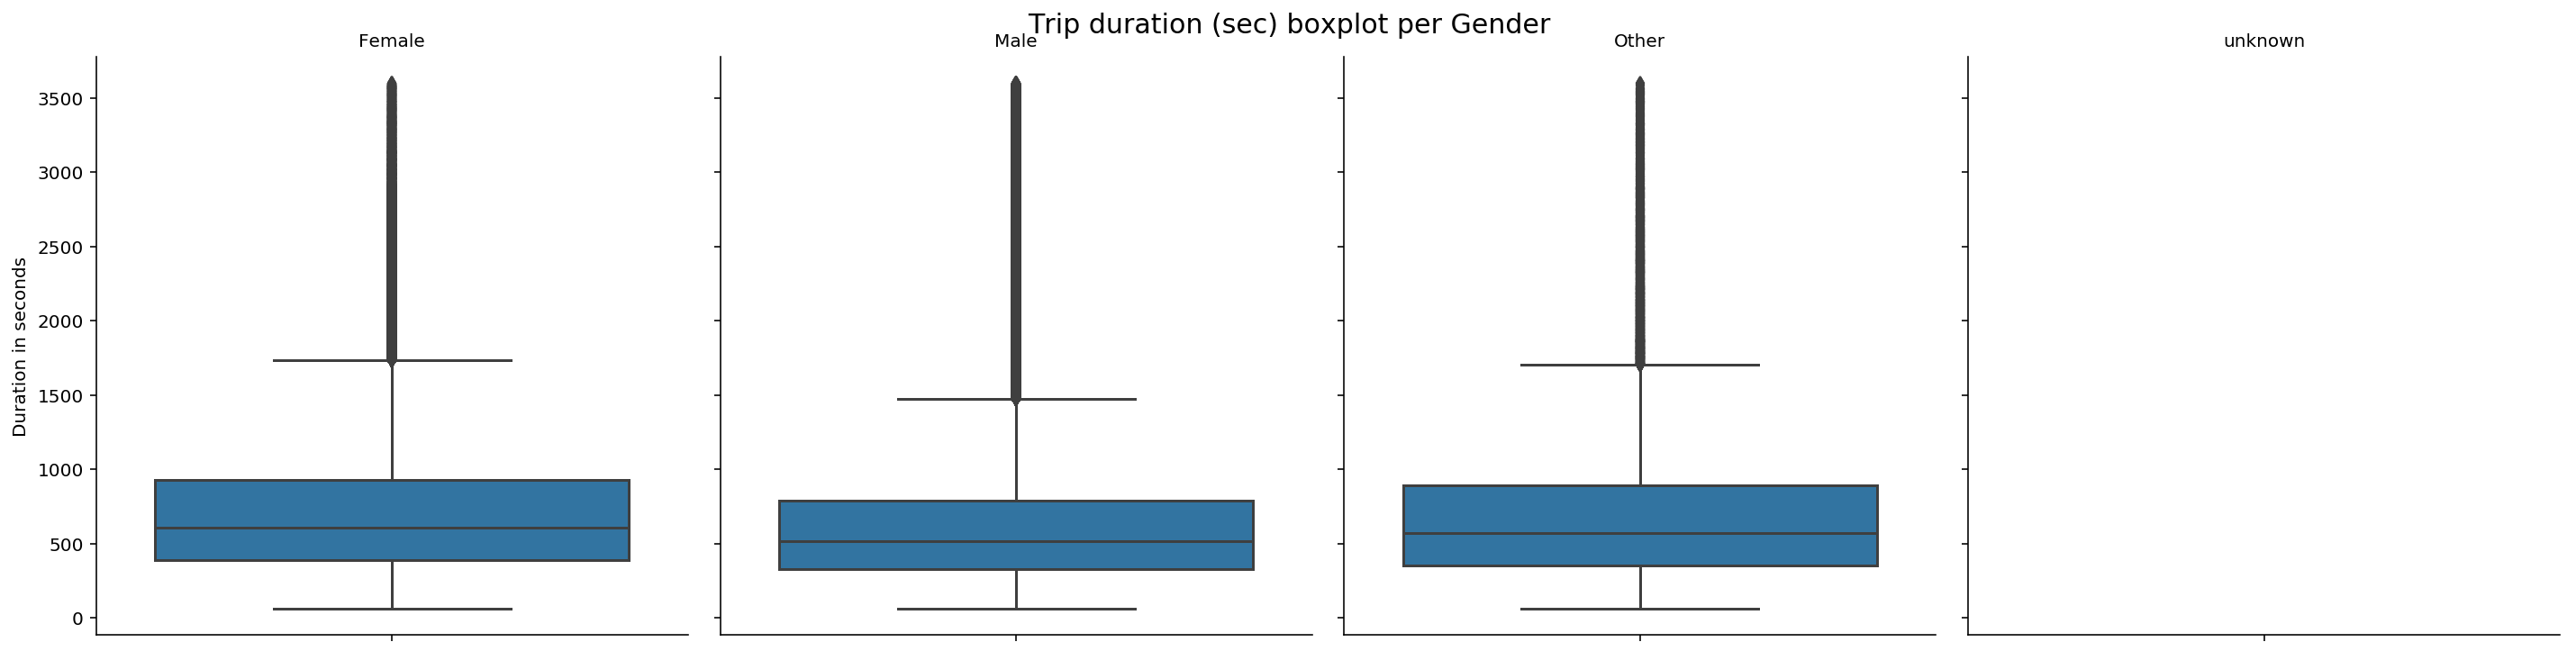

In [70]:
# Trip Duration by User Gender
g = sns.catplot(data=data, y='duration_sec', col="member_gender", kind='box')
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration in seconds")
g.fig.suptitle('Trip duration (sec) boxplot per Gender', y=1, fontsize=15);

The pattern between male and female are similar. The femal trip duration range is slightly longer than male. 

In [71]:
# Categorization of age: ~20, 21~30, 31~40, 41~50, 51~60, 61~70, 71~
young = df_ana.query('member_age <= 20')['bike_id'].count()
twenty  = df_ana.query('20<member_age and member_age <= 30')['bike_id'].count()
thirty  = df_ana.query('30<member_age and member_age <= 40')['bike_id'].count()
fourty  = df_ana.query('40<member_age and member_age <= 50')['bike_id'].count()
fifty  = df_ana.query('50<member_age and member_age <= 60')['bike_id'].count()
sixty  = df_ana.query('60<member_age and member_age <= 70')['bike_id'].count()
old  = df_ana.query('70 < member_age')['bike_id'].count()

young_proportion = young / df_ana['bike_id'].count()
twenty_proportion = twenty / df_ana['bike_id'].count()
thirty_proportion = thirty / df_ana['bike_id'].count()
fouty_proportion = fourty / df_ana['bike_id'].count()
fifty_proportion = fifty / df_ana['bike_id'].count()
sixty_proportion = sixty / df_ana['bike_id'].count()
old_proportion = old / df_ana['bike_id'].count()

In [72]:
df_ana['member_age_category'] = df_ana['member_age'].apply(lambda x: 'young' if 11<x<=20
                                                  else '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 - 60' if 50<x<=60
                                                else '61 - 70' if 60<x<=70
                                                  else 'Elder')

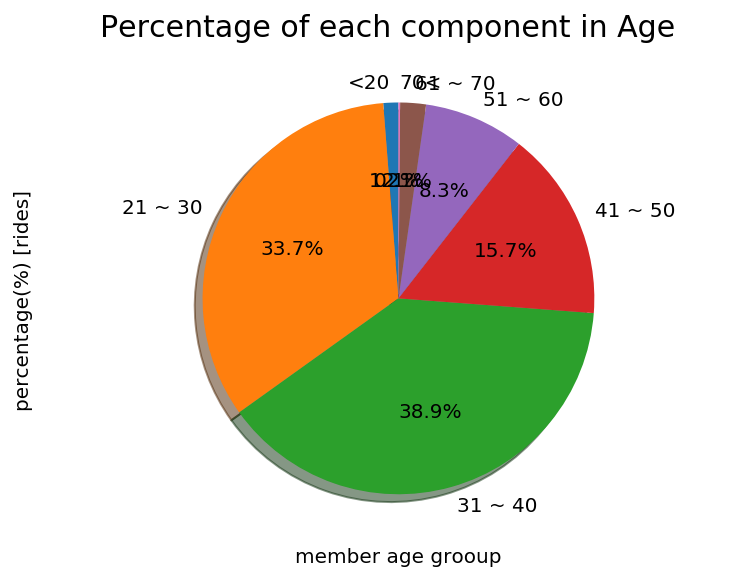

In [73]:
# Percentage of each components in Age
labels = ['<20', '21 ~ 30', '31 ~ 40', '41 ~ 50', '51 ~ 60', '61 ~ 70', '70<']
sizes = [young_proportion, twenty_proportion, thirty_proportion, fouty_proportion, fifty_proportion, sixty_proportion, old_proportion]
explode = (0, 0, 0, 0, 0, 0, 0)

plt.xlabel('member age grooup', labelpad = 15)
plt.ylabel('percentage(%) [rides]', labelpad = 15)
plt.xticks(rotation = 360)

plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.suptitle('Percentage of each component in Age', y = 1, fontsize = 15);

This pie chart shows the percentage for each age range. I have made age category from ~20, 21~30, 31~40, 41~50, 51~60, 61~70 and 71~.
There are similar amount of 21~30 and 31~40 where together takes up to over 70% in total. Then followed by 41~50 users. We can see 21~40 are Ford GoBike main customers. 

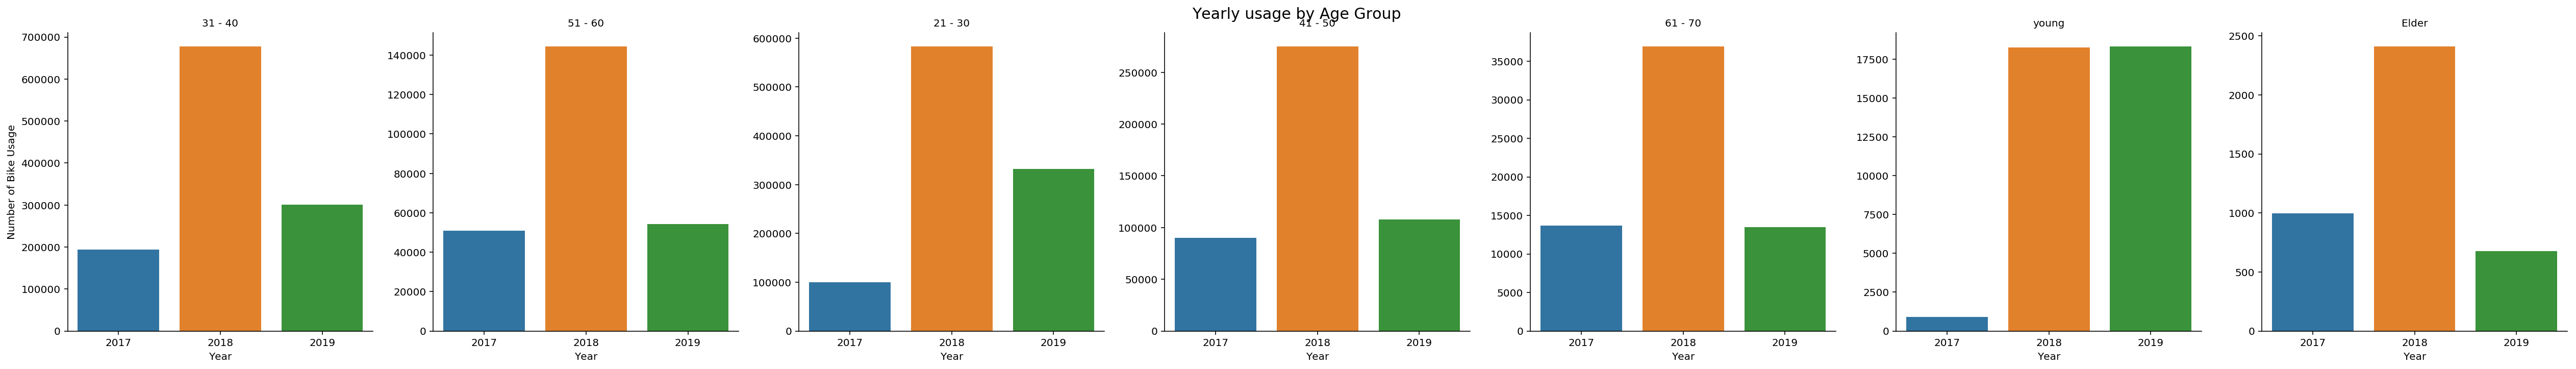

In [74]:
# Annually by Age
g = sns.catplot(data=df_ana, x='start_time_year', col = "member_age_category", kind = 'count', sharey = False)
g.set_axis_labels("Year", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Yearly usage by Age Group', y = 1, fontsize = 15);

The number of bike usage rate has increased from 2017 to 2018. With all the information I have at the moment, it is not reliable to compare 2018 and 2019. But it is interesting to notice that 2019 young age group has already acheived the same bike usage rate to 2018.

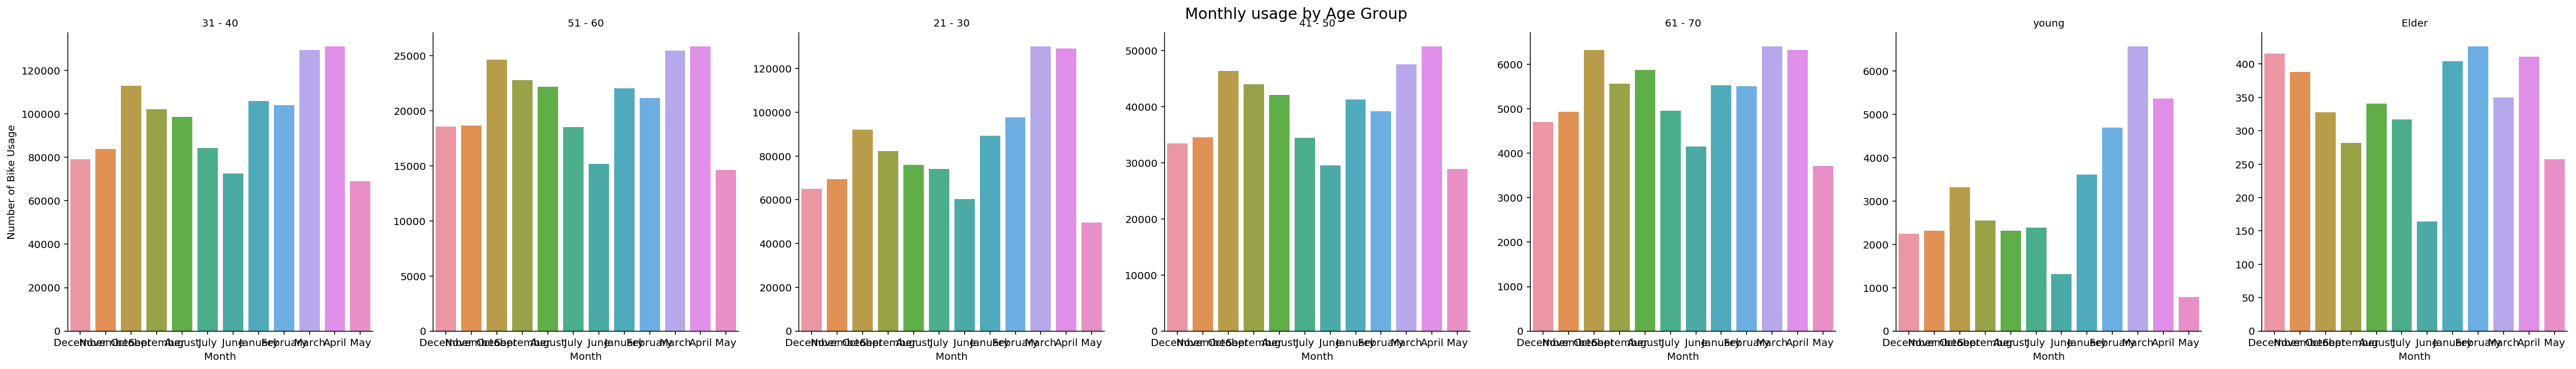

In [75]:
## Monthly by Age
g = sns.catplot(data=df_ana, x='start_time_month', col = "member_age_category", kind = 'count', sharey = False)
g.set_axis_labels("Month", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage by Age Group', y = 1, fontsize = 15);

There are common pattern shown among all the age groups. First, they have same period of two peak during March, April and September, October. Comparing thhose two peak, March, April period seems to have more usage rate. There is some interesting pattern form young and elder group. First, the young group has relatively high usage rate during March, April compared to September, October. Scond, the elder group has relatively even usage rate throughout the year except for June. It seems that the June has to hottest temperature. 

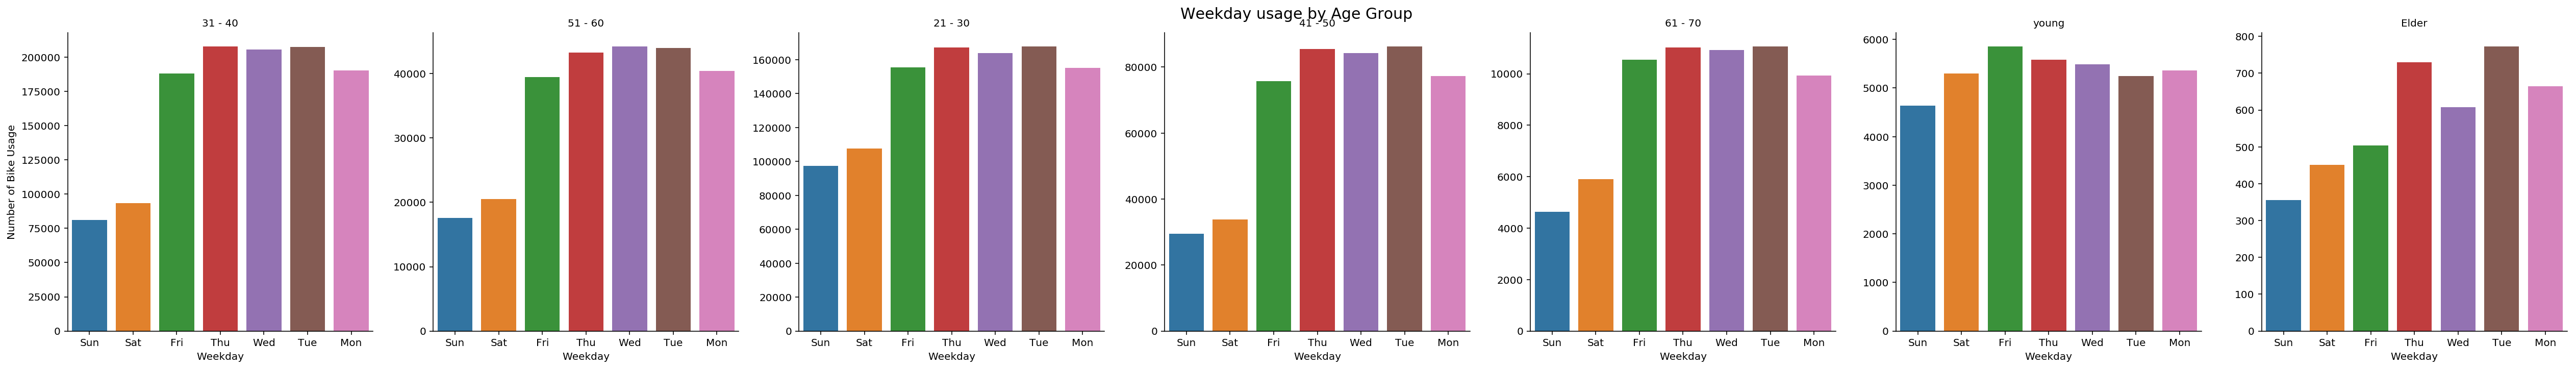

In [76]:
# Weekday by Age
g = sns.catplot(data=df_ana, x='start_time_weekday', col = "member_age_category", kind = 'count', sharey = False)
g.set_axis_labels("Weekday", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday usage by Age Group', y = 1, fontsize = 15);

During 21~70 age group have similar pattern. The pattern is that the usage rates are high during the weekday and lower the weekends. And if you closely during the weekday, usaully Tuesday and Thursday has the highest usage rates for all the age groups. For this analysis, young group have unique pattern. First, young age group has relatively even usage rate throughout the week.

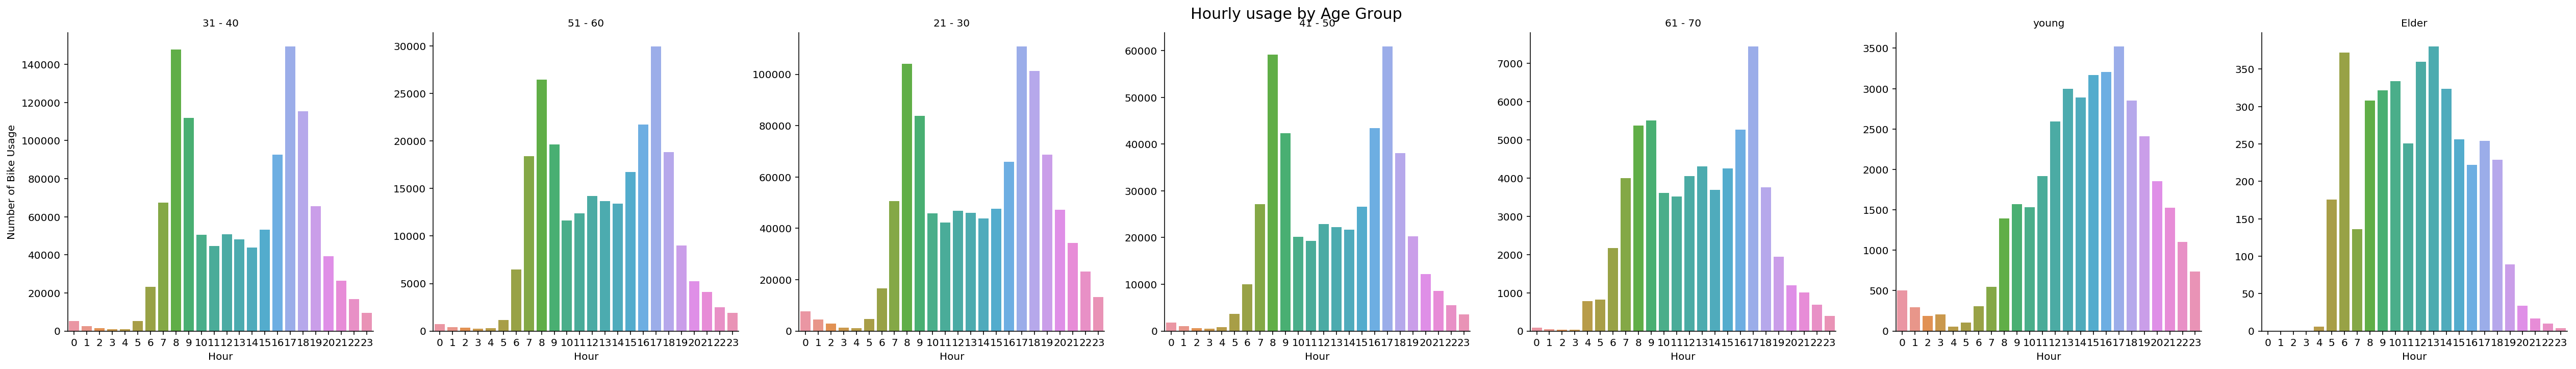

In [77]:
# Hour by Age
g = sns.catplot(data=df_ana, x='start_time_hr', col = "member_age_category", kind = 'count', sharey = False)
g.set_axis_labels("Hour", "Number of Bike Usage")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage by Age Group', y = 1, fontsize = 15);

During 21~70 age group have similar pattern. The pattern is that the usage rates are high during the commute time. For this analysis, young and elder age group have unique pattern. First, young age group's usage pattern is closed to normally distributed graph. They have one peak at 17pm. They tend to use the service thoutgh the day; evne during the night. And for the elder age group, theie peak time is at 6am and 13pm which is different to other age groups. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have tried to oberve the differences between the user type, gender and age analyzing with time; annaul, month, weekday, hour. The patterns were similar to the pattern oberved in the population graph. I will summarize some of the findings here. First, annual usage is gradually increasing; this leads for 2018 to have the most usage rate for everyime. Second, the usage rate is affected by weather and the higher usage rate are during summer and lower usage rate are during winter; this accounts for differences with user type, gender and age group. Third, users tend to use the system during weekdays rather than weekends. Fourth, there are two peaks in a day which are 8 am and 5pm. This refers that users use the system when they are going to work or school rather than leisure. Fifth, the majority users are male and subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I was able to find two interesting findings in this section. First, for gender and trip duration graph, female tend to have longer trip duration time compared to male. Second, the young and elder age groups have slightly different usage patter compared to other age groups.

## Multivariate Exploration

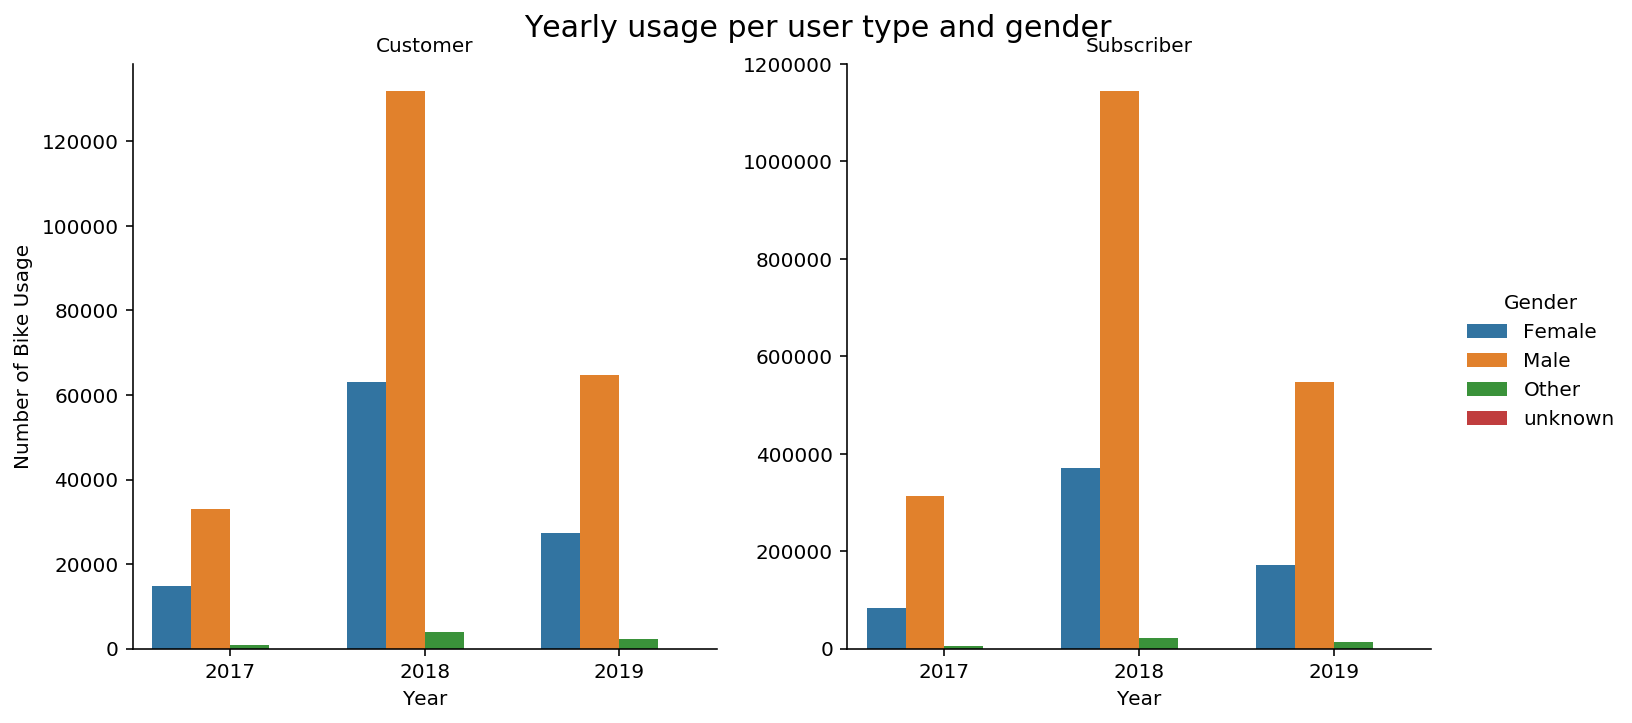

In [78]:
# annually usage of bike per user type and gender
g = sns.catplot(data=df_ana, x='start_time_year', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Year", "Number of Bike Usage")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Yearly usage per user type and gender', y=1, fontsize=15);

The pattern shown above bewteen two graphs are similar. The main difference is the scale of usage rate bewtten customer and subscriber; if you see the y-axis, it is 120000 for customer max and it is 1200000 for subscriber max. There is one more difference that the ratio of female is lower for subscriber compared to customer especailly in 2018.

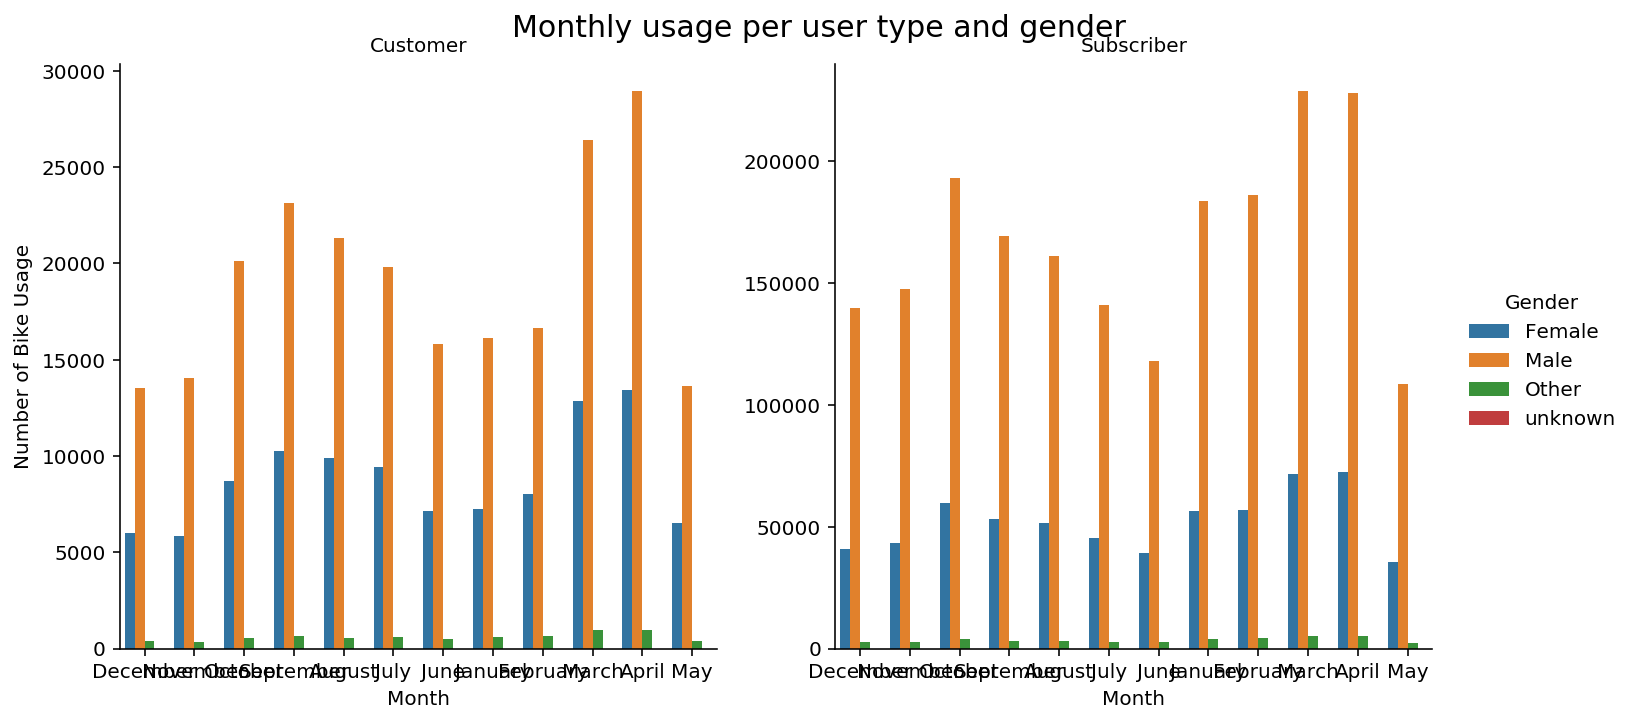

In [79]:
# monthly usage of bike per user type and gender
g = sns.catplot(data=df_ana, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "Number of Bike Usage")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage per user type and gender', y=1, fontsize=15);

The pattern shown above bewteen two graphs are similar. The ratio of female customer during March and April is higher than female subscriber.

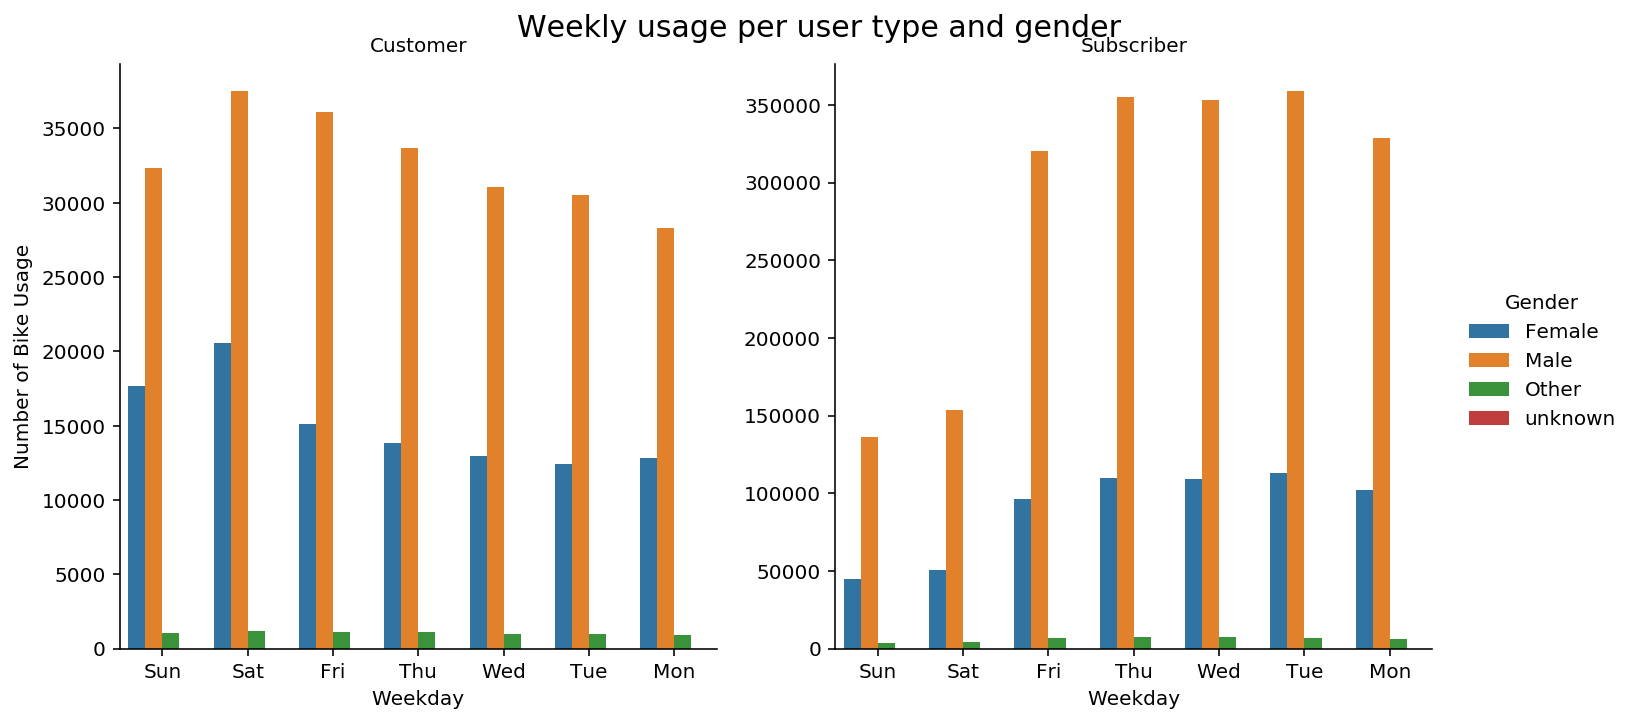

In [80]:
# weekday usage of bike per user type and gender
g = sns.catplot(data=df_ana, x='start_time_weekday', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Weekday", "Number of Bike Usage")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage per user type and gender', y=1, fontsize=15);

The pattern shown above bewteen two graphs are similar. Subscribers tend to use the service during weekday than weekends; and this phenomena applies to female and male.Customers have relatively even usage rate throughout the week. For male customers, they have high usage rate during Friday and Saturday, while, female customers, they have high usage rate during Saturday and Sunday. 

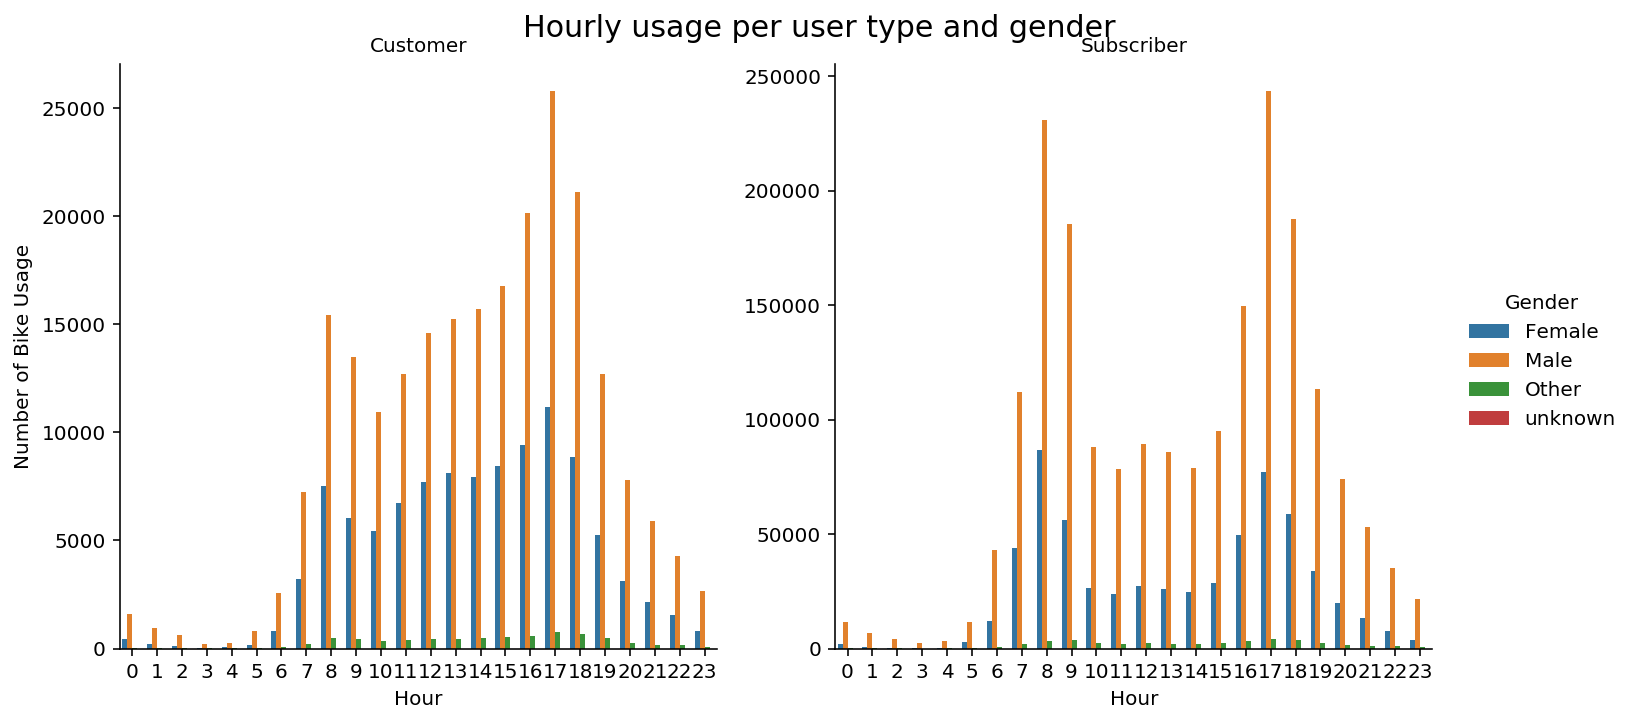

In [81]:
# hourly usage of bike per user type and gender
g = sns.catplot(data=df_ana, x='start_time_hr', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Hour", "Number of Bike Usage")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage per user type and gender', y=1, fontsize=15);

The pattern shown above bewteen two graphs are similar. This refers that gender does not affect much on the usage rate upon time of the day. 

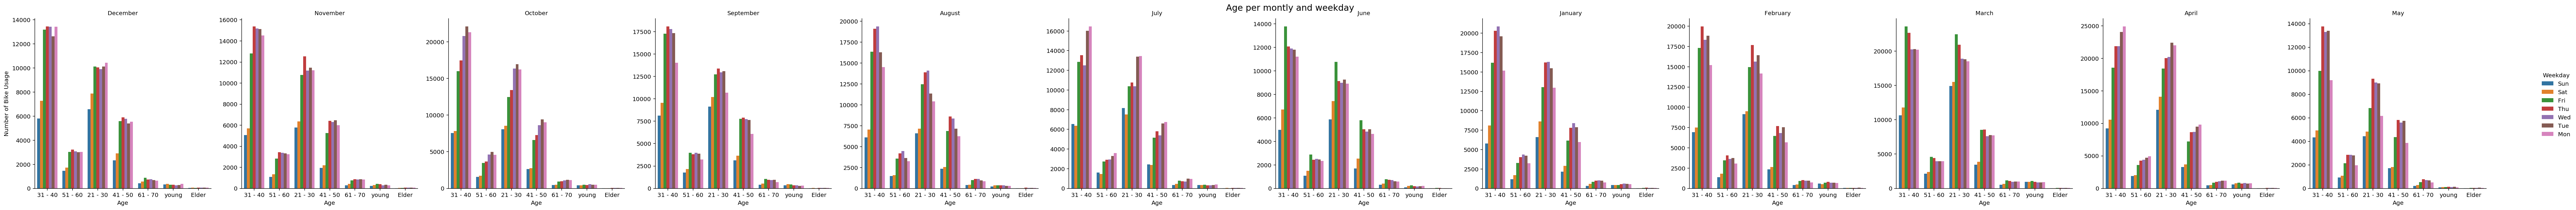

In [82]:
# Age, monthly, weekday
g = sns.catplot(data=df_ana, x='member_age_category', col="start_time_month", hue="start_time_weekday", kind='count', sharey = False)
g.set_axis_labels("Age", "Number of Bike Usage")
g._legend.set_title('Weekday')
g.set_titles("{col_name}")
g.fig.suptitle('Age per montly and weekday', y=1, fontsize=15);

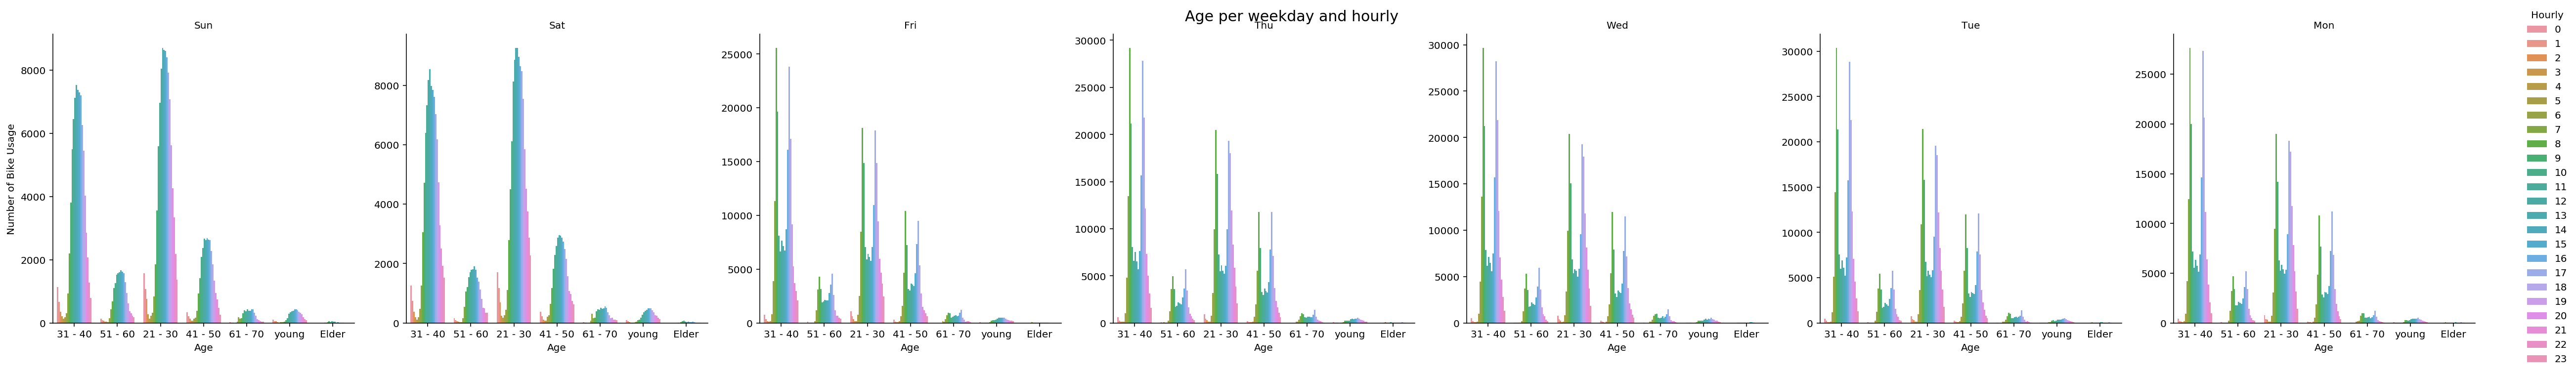

In [83]:
# Age, weekday, hourly
g = sns.catplot(data=df_ana, x='member_age_category', col="start_time_weekday", hue="start_time_hr", kind='count', sharey = False)
g.set_axis_labels("Age", "Number of Bike Usage")
g._legend.set_title('Hourly')
g.set_titles("{col_name}")
g.fig.suptitle('Age per weekday and hourly', y=1, fontsize=15);

The pattern are similar using weekdays among all the age group; they have two peaks. On the other hand, during the weekends, the usage rate during the day have bell-curved shape. 

### based on User type

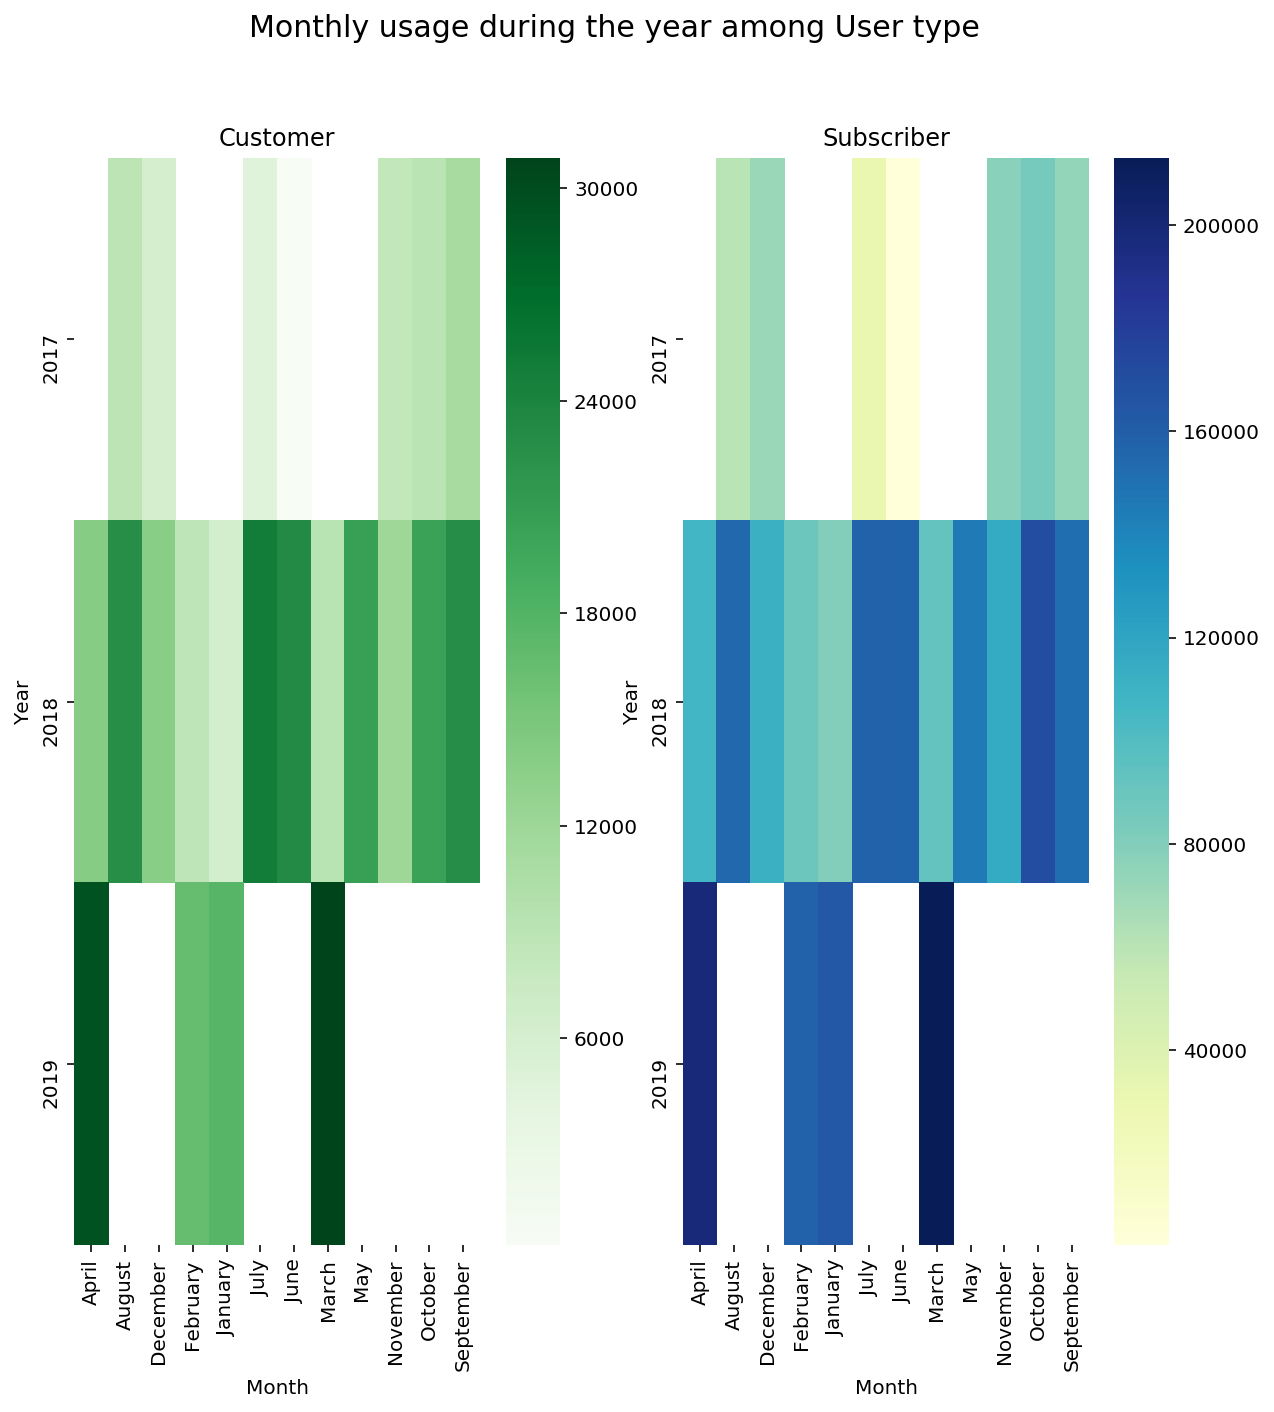

In [104]:
plt.figure(figsize=(10,10))
plt.suptitle('Monthly usage during the year among User type', fontsize=15)

# customers
plt.subplot(1, 2, 1)
df_customer = df_ana.query('user_type == "Customer"').groupby(["start_time_year", "start_time_month"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_year", "start_time_month", "bike_id")
sns.heatmap(df_customer, cmap="Greens")

plt.title("Customer", y=1)
plt.xlabel('Month')
plt.ylabel('Year')

# subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_ana.query('user_type == "Subscriber"').groupby(["start_time_year", "start_time_month"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_year", "start_time_month", "bike_id")
sns.heatmap(df_subscriber, cmap="YlGnBu")

plt.title("Subscriber", y=1)
plt.xlabel('Month')
plt.ylabel('Year');

This show similar pattern during 2017 and 2018. If you see closely into 2018, the maximum count month is different. For customer, it is July and for subscriber, it is October. 

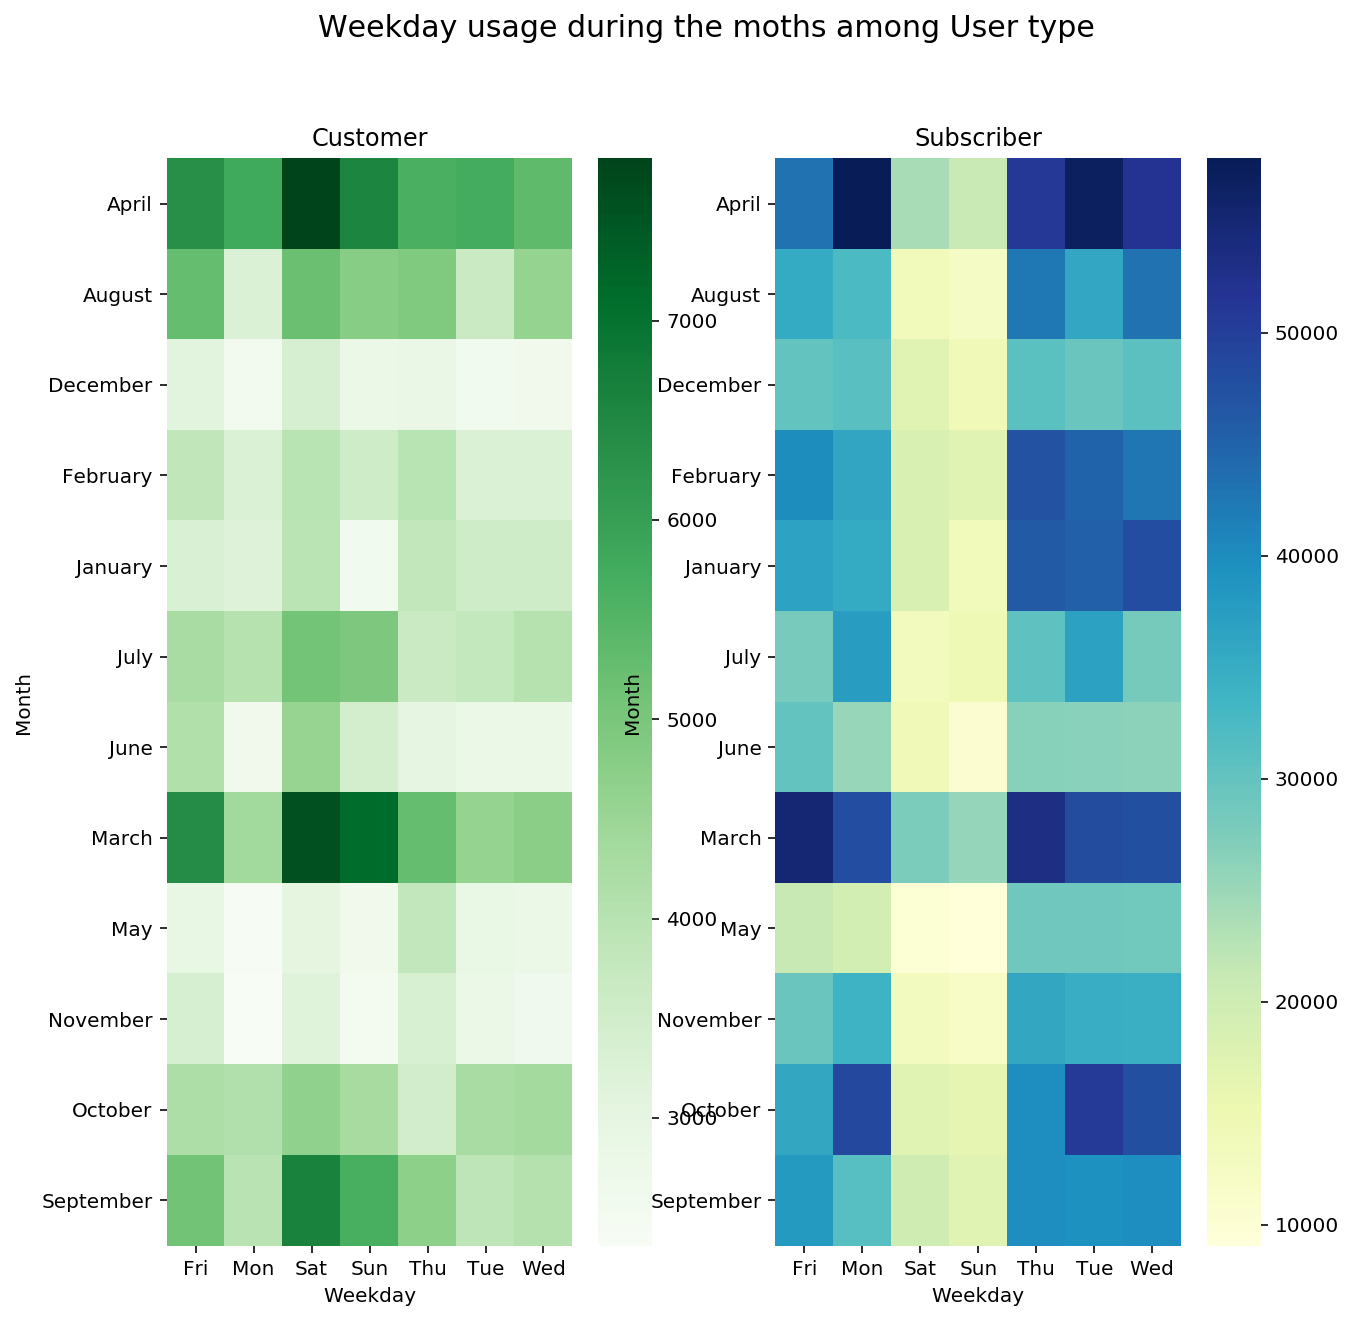

In [108]:
plt.figure(figsize=(10,10))
plt.suptitle('Weekday usage during the moths among User type', fontsize=15)

# customers
plt.subplot(1, 2, 1)
df_customer = df_ana.query('user_type == "Customer"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_month", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="Greens")

plt.title("Customer", y=1)
plt.xlabel('Weekday')
plt.ylabel('Month')

# subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_ana.query('user_type == "Subscriber"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_month", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="YlGnBu")

plt.title("Subscriber", y=1)
plt.xlabel('Weekday')
plt.ylabel('Month');

This time I was trying to figure out the day of the month where it has the highest rate among user type. For customer, there are two dark green , which refers high usage rate, are on Saturday on March and April; then , Sunday on March. This refers customers tend to use this service more for leisure. For subscribers. except for weekends, the color distribution is relatively even. The highest rates are on Friday, Thursday on March and Tuesday, Monday on April. 

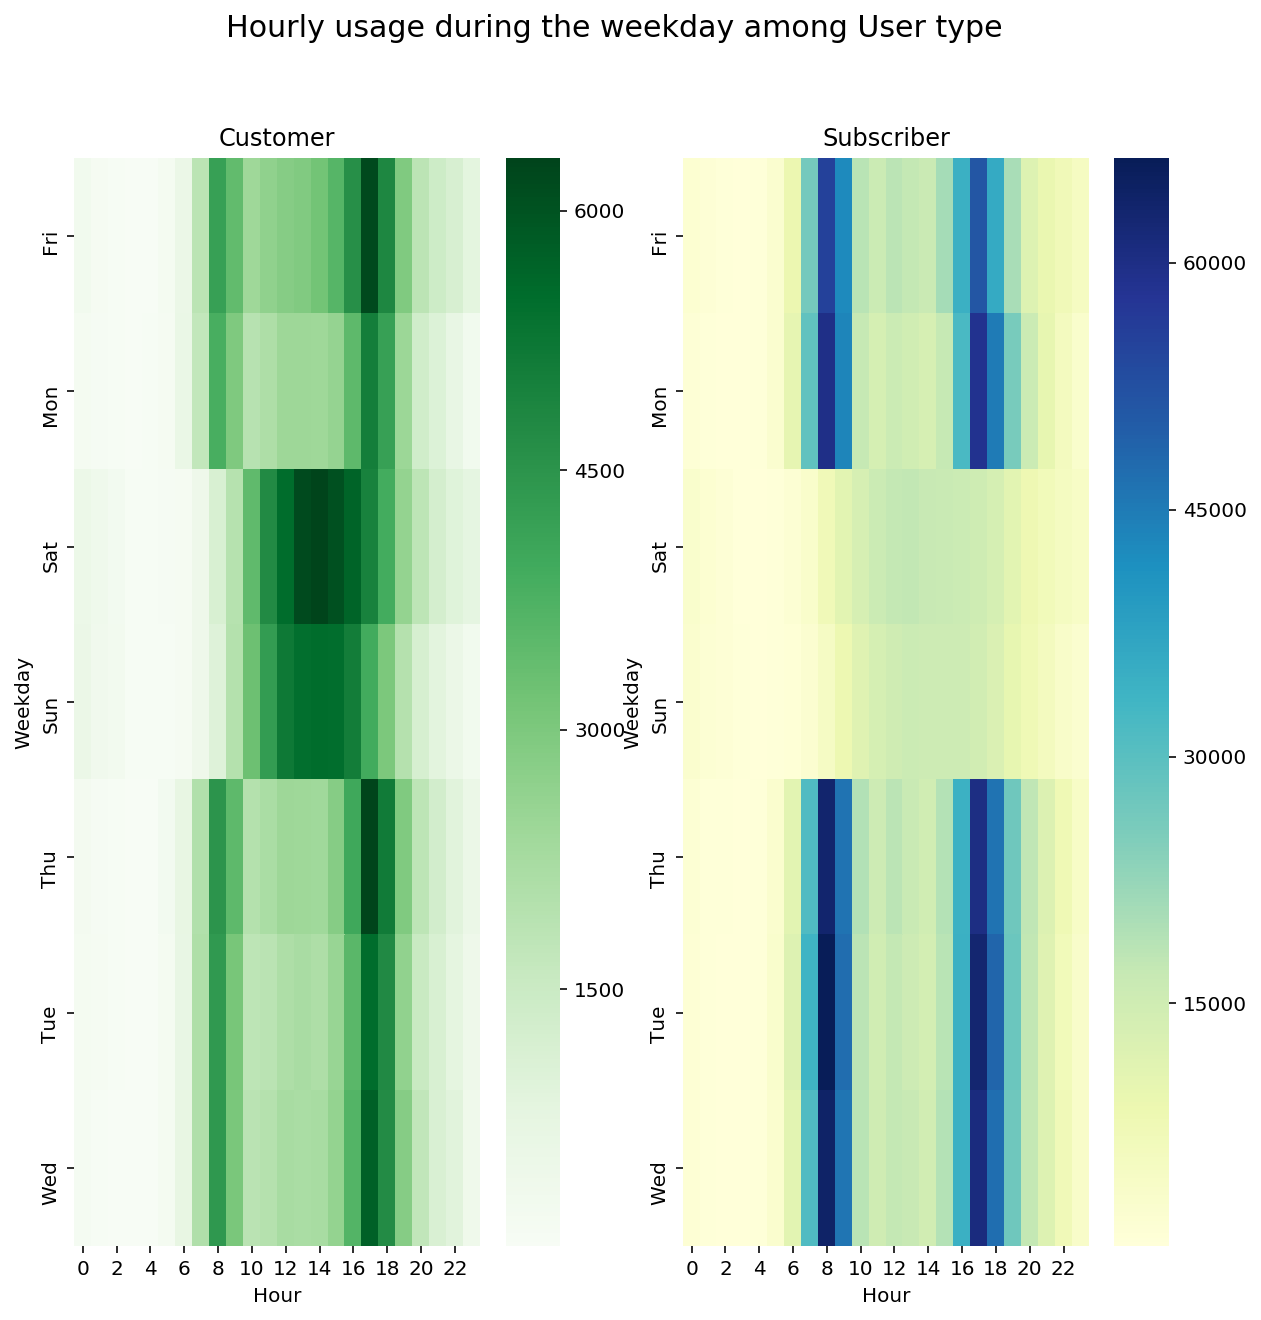

In [109]:
plt.figure(figsize=(10,10))
plt.suptitle('Hourly usage during the weekday among User type', fontsize=15)

# customers
plt.subplot(1, 2, 1)
df_customer = df_ana.query('user_type == "Customer"').groupby(["start_time_weekday", "start_time_hr"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_weekday", "start_time_hr", "bike_id")
sns.heatmap(df_customer, cmap="Greens")

plt.title("Customer", y=1)
plt.xlabel('Hour')
plt.ylabel('Weekday')

# subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_ana.query('user_type == "Subscriber"').groupby(["start_time_weekday", "start_time_hr"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_weekday", "start_time_hr", "bike_id")
sns.heatmap(df_subscriber, cmap="YlGnBu")

plt.title("Subscriber", y=1)
plt.xlabel('Hour')
plt.ylabel('Weekday');

This time I was trying to figure out the hour of the weekday where it has the highest rate among user type. For customer, they are gathered between 10am to16pm during weekend. And there seem to have high rates in Tursday and Friday at 17pm. For subscribers, they have intuitive patten. The heatgraph shows subscribers tend to use the service 7am~9am and 16pm~19pm durinf the weekday. THeir purpose of using this service seems to be commute to work or school. 

Text(373.36363636363626, 0.5, 'Hour')

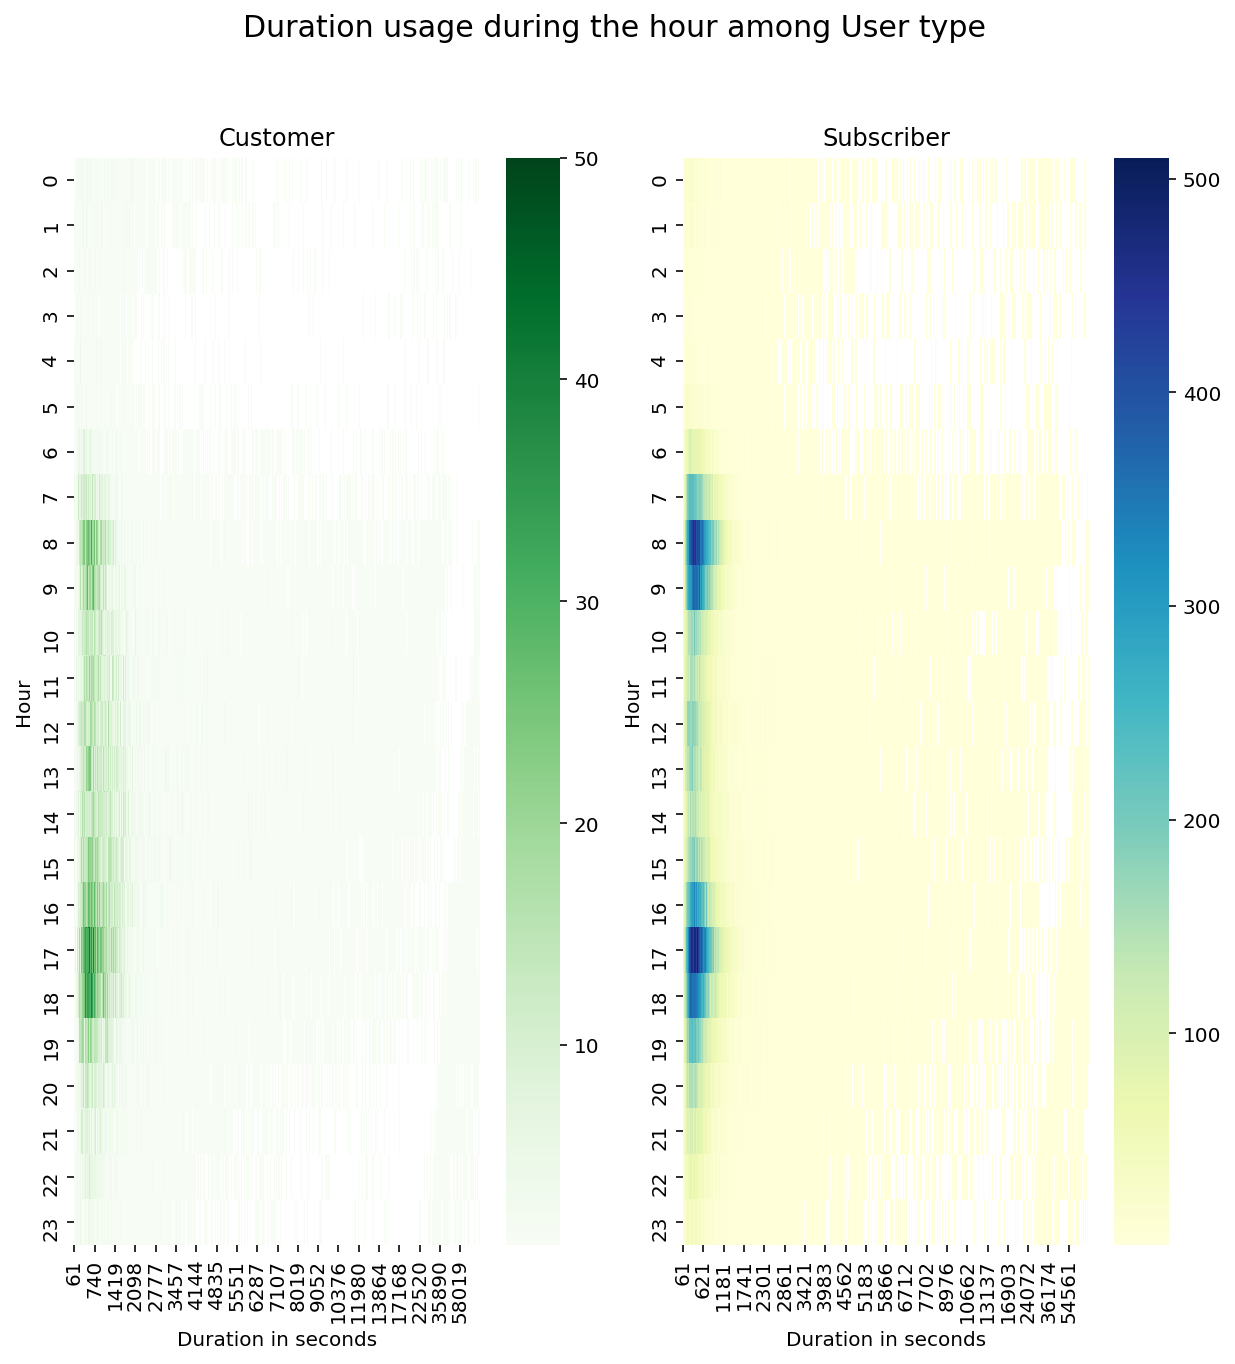

In [110]:
plt.figure(figsize=(10,10))
plt.suptitle('Duration usage during the hour among User type', fontsize=15)

# customers
plt.subplot(1, 2, 1)
df_customer = df_ana.query('user_type == "Customer"').groupby(["start_time_hr", "duration_sec"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hr", "duration_sec", "bike_id")
sns.heatmap(df_customer, cmap="Greens")

plt.title("Customer", y=1)
plt.xlabel('Duration in seconds')
plt.ylabel('Hour')

# subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_ana.query('user_type == "Subscriber"').groupby(["start_time_hr", "duration_sec"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hr", "duration_sec", "bike_id")
sns.heatmap(df_subscriber, cmap="YlGnBu")

plt.title("Subscriber", y=1)
plt.xlabel('Duration in seconds')
plt.ylabel('Hour')

### based on Gender

Text(373.36363636363626, 0.5, 'Year')

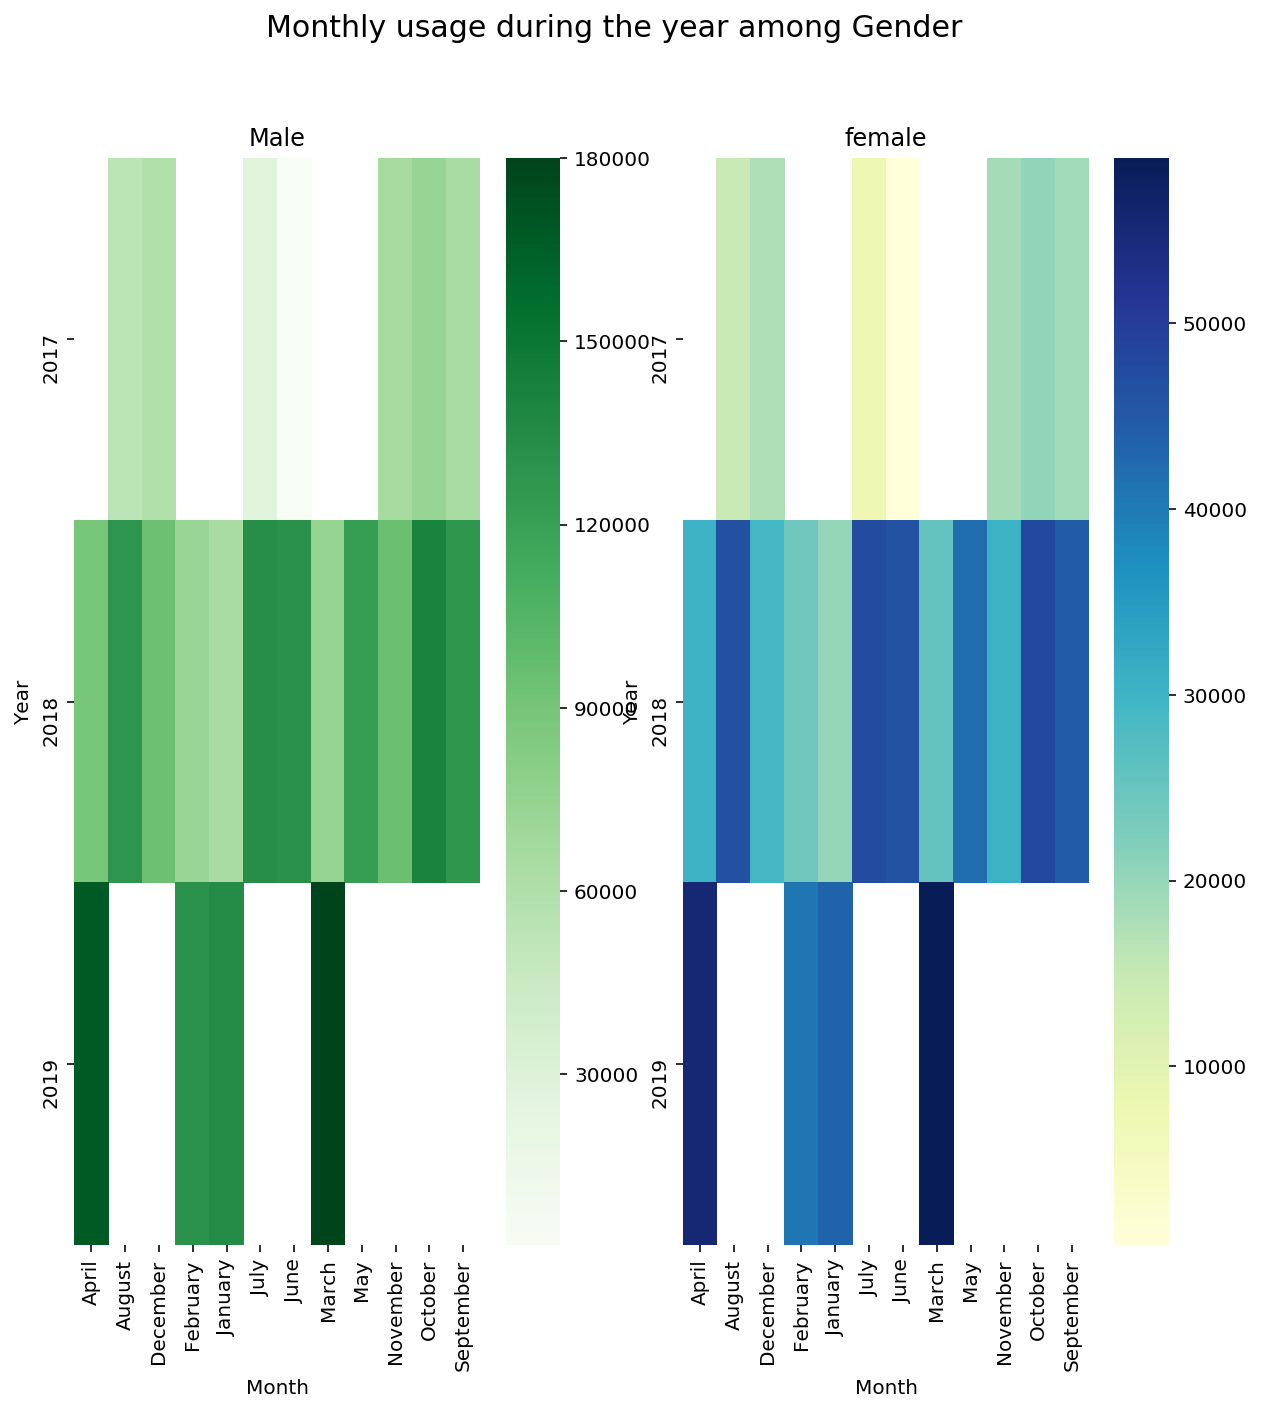

In [111]:
plt.figure(figsize=(10,10))
plt.suptitle('Monthly usage during the year among Gender', fontsize=15)

# male
plt.subplot(1, 2, 1)
df_male = df_ana.query('member_gender == "Male"').groupby(["start_time_year", "start_time_month"])["bike_id"].size().reset_index()
df_male = df_male.pivot("start_time_year", "start_time_month", "bike_id")
sns.heatmap(df_male, cmap="Greens")

plt.title("Male", y=1)
plt.xlabel('Month')
plt.ylabel('Year')

# female
plt.subplot(1, 2, 2)
df_female = df_ana.query('member_gender == "Female"').groupby(["start_time_year", "start_time_month"])["bike_id"].size().reset_index()
df_female = df_female.pivot("start_time_year", "start_time_month", "bike_id")
sns.heatmap(df_female, cmap="YlGnBu")

plt.title("female", y=1)
plt.xlabel('Month')
plt.ylabel('Year')

This time I was trying to figure out the monthof the year where it has the highest rate among gender. There are no big difference here.

Text(373.36363636363626, 0.5, 'Month')

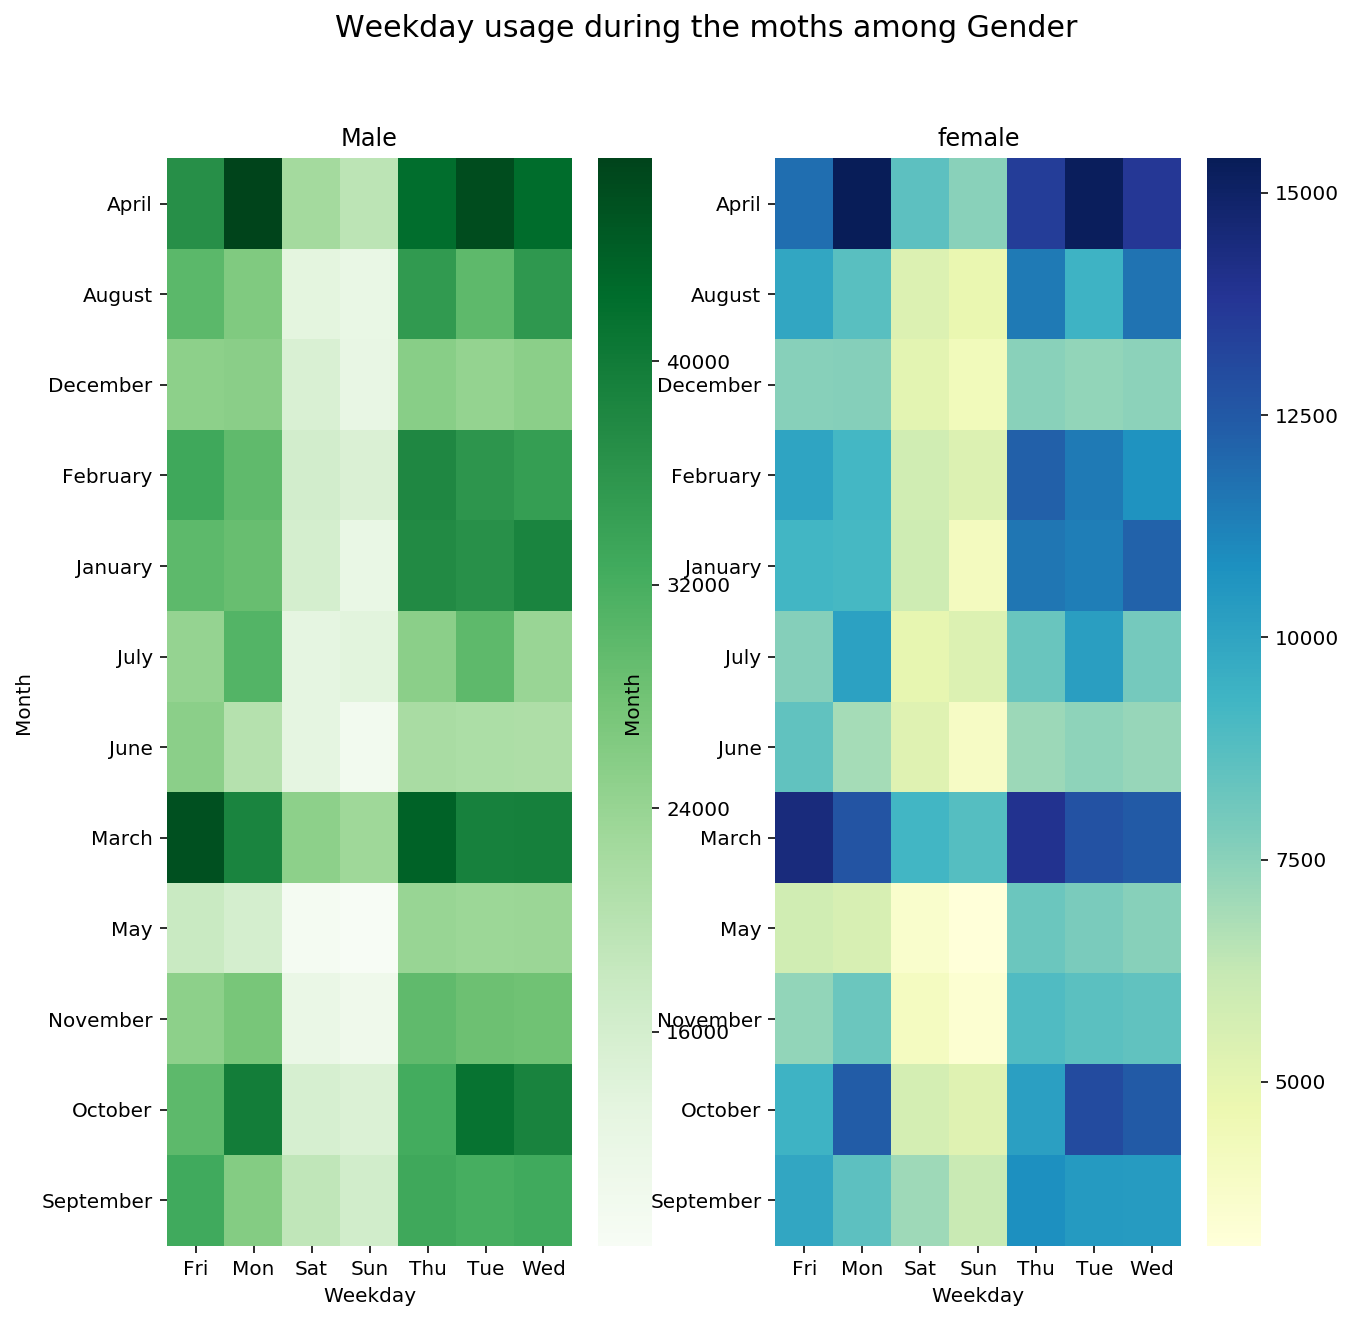

In [112]:
plt.figure(figsize=(10,10))
plt.suptitle('Weekday usage during the moths among Gender', fontsize=15)

# male
plt.subplot(1, 2, 1)
df_male = df_ana.query('member_gender == "Male"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_male = df_male.pivot("start_time_month", "start_time_weekday", "bike_id")
sns.heatmap(df_male, cmap="Greens")

plt.title("Male", y=1)
plt.xlabel('Weekday')
plt.ylabel('Month')

# female
plt.subplot(1, 2, 2)
df_female = df_ana.query('member_gender == "Female"').groupby(["start_time_month", "start_time_weekday"])["bike_id"].size().reset_index()
df_female = df_female.pivot("start_time_month", "start_time_weekday", "bike_id")
sns.heatmap(df_female, cmap="YlGnBu")

plt.title("female", y=1)
plt.xlabel('Weekday')
plt.ylabel('Month')

This time I was trying to figure out the weekday of the month where it has the highest rate among gender. There are no big difference.

Text(373.36363636363626, 0.5, 'Weekday')

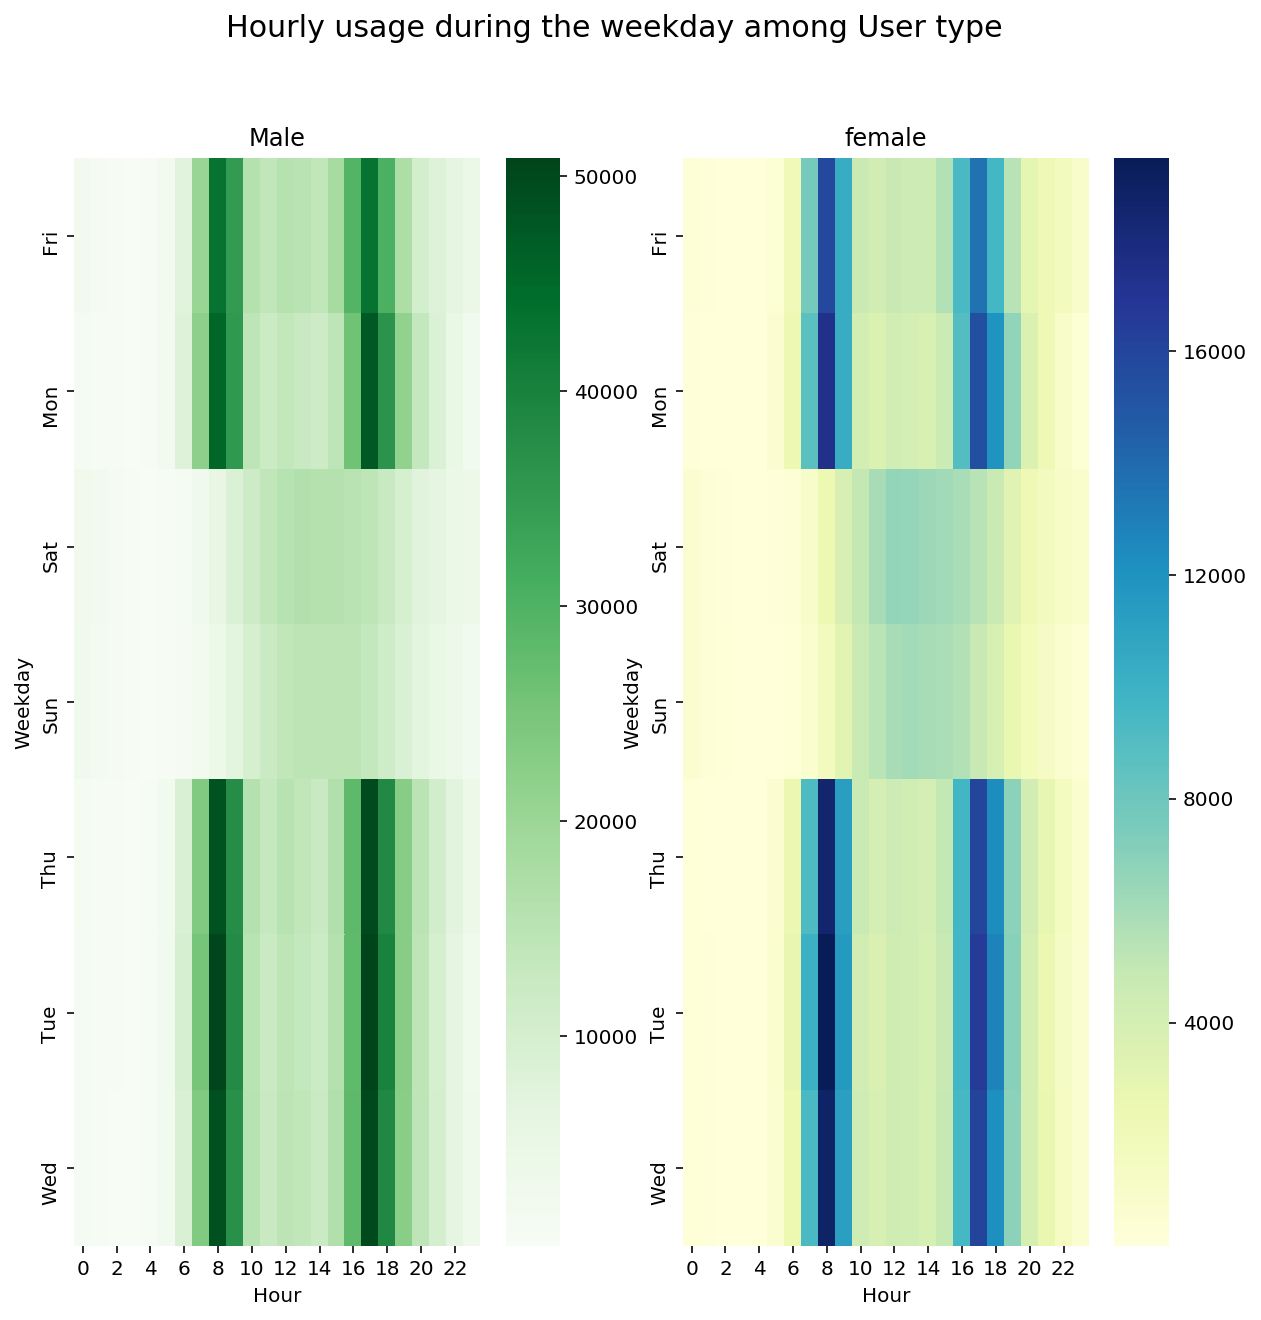

In [113]:
plt.figure(figsize=(10,10))
plt.suptitle('Hourly usage during the weekday among User type', fontsize=15)

# male
plt.subplot(1, 2, 1)
df_male = df_ana.query('member_gender == "Male"').groupby(["start_time_weekday", "start_time_hr"])["bike_id"].size().reset_index()
df_male = df_male.pivot("start_time_weekday", "start_time_hr", "bike_id")
sns.heatmap(df_male, cmap="Greens")

plt.title("Male", y=1)
plt.xlabel('Hour')
plt.ylabel('Weekday')

# female
plt.subplot(1, 2, 2)
df_female = df_ana.query('member_gender == "Female"').groupby(["start_time_weekday", "start_time_hr"])["bike_id"].size().reset_index()
df_female = df_female.pivot("start_time_weekday", "start_time_hr", "bike_id")
sns.heatmap(df_female, cmap="YlGnBu")

plt.title("female", y=1)
plt.xlabel('Hour')
plt.ylabel('Weekday')

This time I was trying to figure out the hour of the weekday where it has the highest rate among gender. There are no big difference.

### based on duration time

Text(373.36363636363626, 0.5, 'Hour')

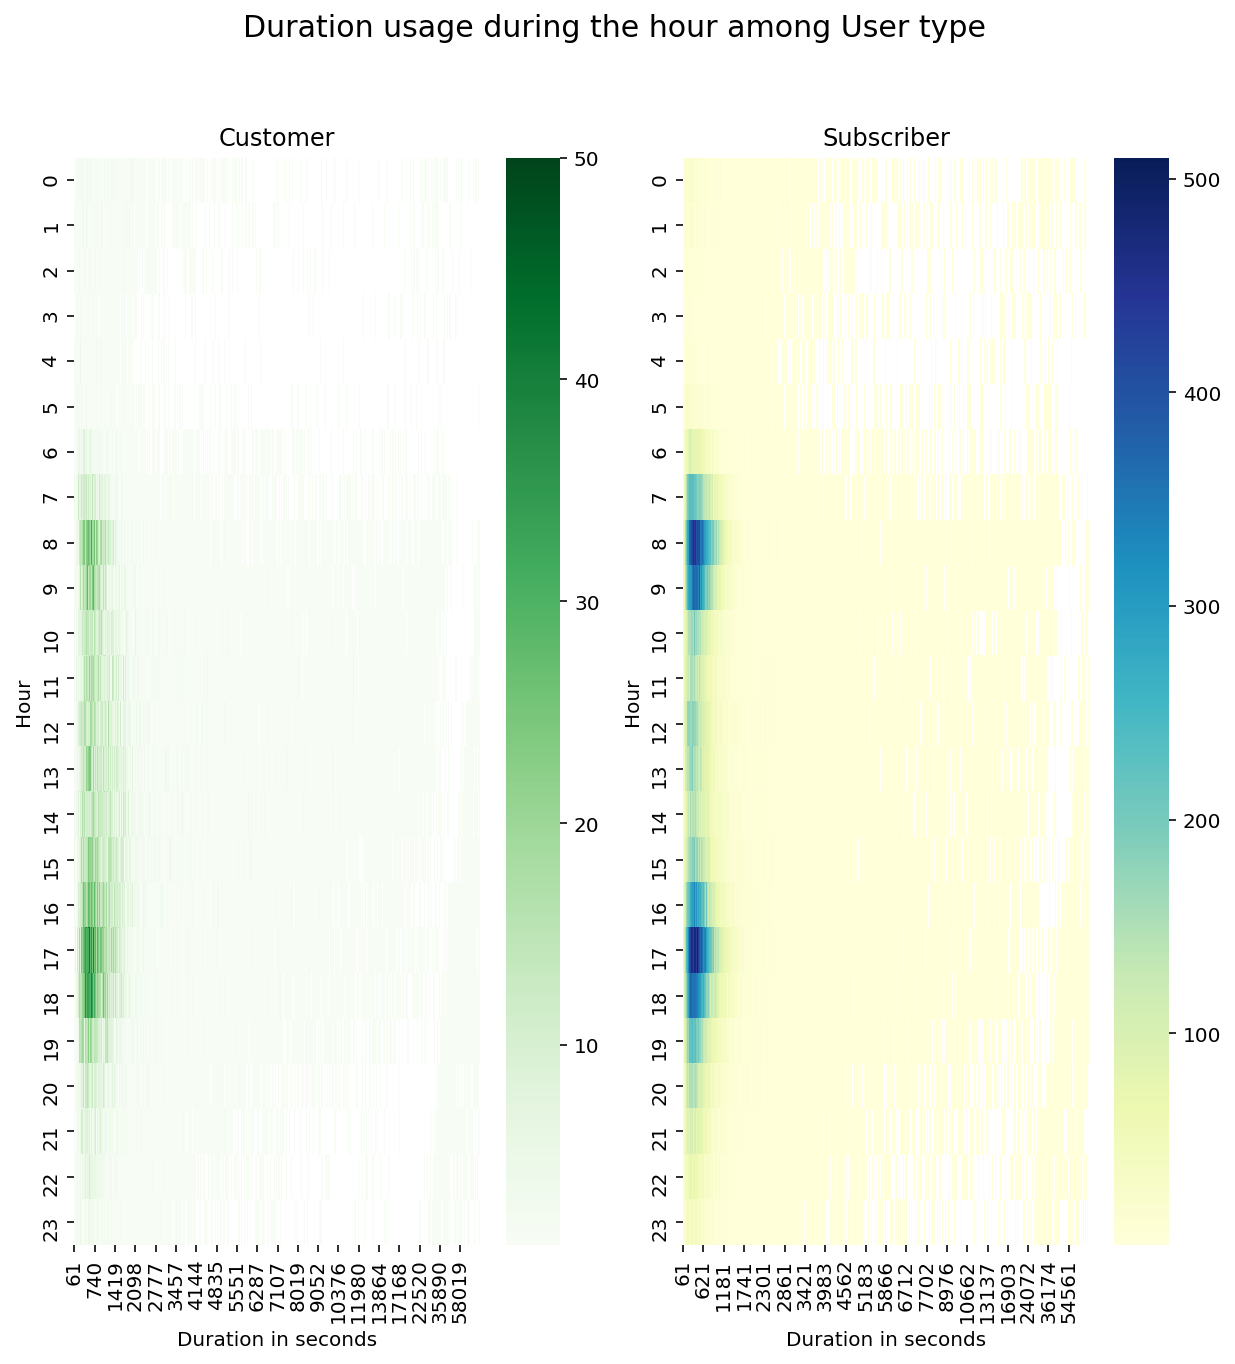

In [114]:
plt.figure(figsize=(10,10))
plt.suptitle('Duration usage during the hour among User type', fontsize=15)

# customers
plt.subplot(1, 2, 1)
df_customer = df_ana.query('user_type == "Customer"').groupby(["start_time_hr", "duration_sec"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hr", "duration_sec", "bike_id")
sns.heatmap(df_customer, cmap="Greens")

plt.title("Customer", y=1)
plt.xlabel('Duration in seconds')
plt.ylabel('Hour')

# subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_ana.query('user_type == "Subscriber"').groupby(["start_time_hr", "duration_sec"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hr", "duration_sec", "bike_id")
sns.heatmap(df_subscriber, cmap="YlGnBu")

plt.title("Subscriber", y=1)
plt.xlabel('Duration in seconds')
plt.ylabel('Hour')

Text(373.36363636363626, 0.5, 'Hour')

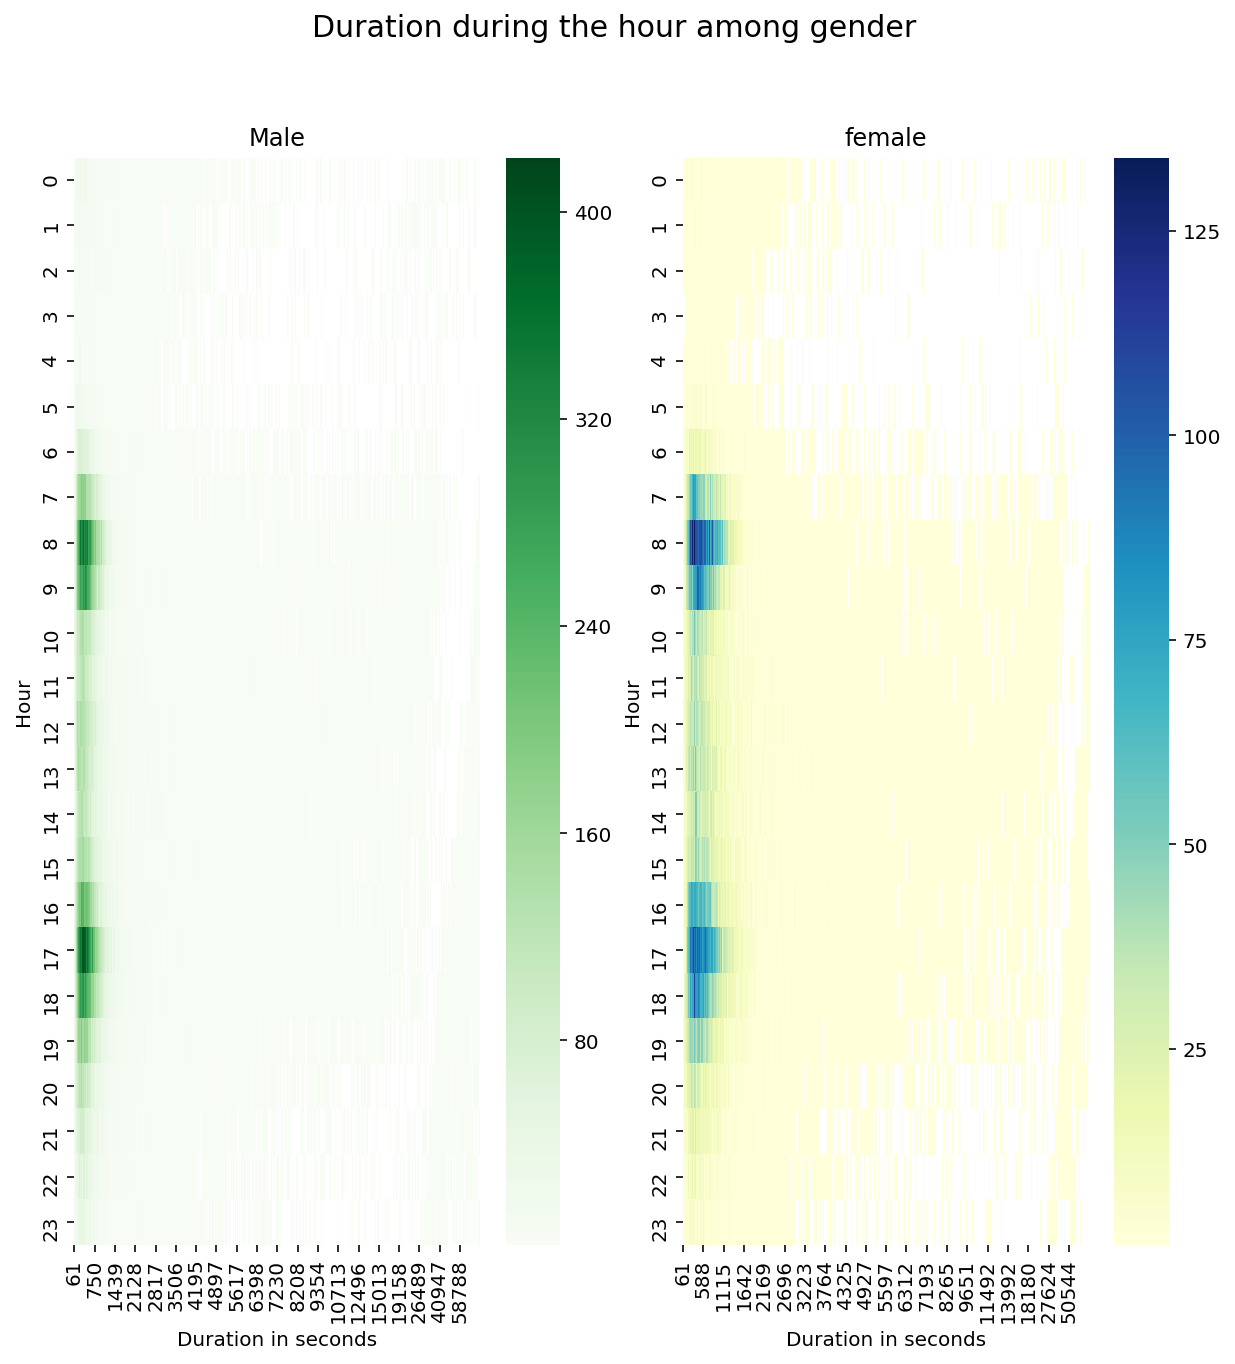

In [115]:
plt.figure(figsize=(10,10))
plt.suptitle('Duration during the hour among gender', fontsize=15)

# male
plt.subplot(1, 2, 1)
df_male = df_ana.query('member_gender == "Male"').groupby(["start_time_hr", "duration_sec"])["bike_id"].size().reset_index()
df_male = df_male.pivot("start_time_hr", "duration_sec", "bike_id")
sns.heatmap(df_male, cmap="Greens")

plt.title("Male", y=1)
plt.xlabel('Duration in seconds')
plt.ylabel('Hour')

# female
plt.subplot(1, 2, 2)
df_female = df_ana.query('member_gender == "Female"').groupby(["start_time_hr", "duration_sec"])["bike_id"].size().reset_index()
df_female = df_female.pivot("start_time_hr", "duration_sec", "bike_id")
sns.heatmap(df_female, cmap="YlGnBu")

plt.title("female", y=1)
plt.xlabel('Duration in seconds')
plt.ylabel('Hour')

There seems no big differences between user type and gender using the duration. Female tend to have more distributed upon duration time compared to male. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section I have tried to figure out specific time where user type or gender makes or shows unique patterns. I have divided the population with user type and gender, then I have integrated two types of timeframe in order to see specific time where the usage rate is high. I have done two stages of analysis. First step was done in bar graph then second step was done in heat graph. I will highlight some of the findings. First, subscribers use the service during weekday and customers use the service during the weekend and this pattern applies to both male and female. Second, there are two peaks throughout the day if we observe the hours during weekdays; the bell-curved shape for weekends. 

>Summarizing the customers, their usage rates are high on Saturday on March and April. And their usage rates are high between 10am to 16pm during weekend. This clearly shows they are using the service for leisure. Summarizing the subscribers, their usage rates are high on Friday, Thursday on March and Tuesday, Monday on April. And their usage rates are high on 7am~9am and 16pm~19pm during the weekday. This clearly shows they are using the service to commute to work or school. Comparing gender, user type on time frame, the ratio of female customer during March and April is higher than female subscriber. There are no big differences among age group affected by timeframe.

### Were there any interesting or surprising interactions between features?

> One thing interesting was captured during the interactions between gender, user type and weekday. It came out that for male customers, they have high usage rate during Friday and Saturday, while, female customers, they have high usage rate during Saturday and Sunday. It was surpring that female enjoy more active activities during weekends. It was also interesting that gender differences did not sho big differences. On the other hand, user types showed some difference where Ford GoBike company could differentiate their marketing strategy. 